In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
from sklearn.mixture import GaussianMixture

In [2]:
p001 = np.loadtxt('UFR3-30_C_10595_data_MB-001.dat') # x/h = 0.05
p002 = np.loadtxt('UFR3-30_C_10595_data_MB-002.dat') # x/h = 0.5
p003 = np.loadtxt('UFR3-30_C_10595_data_MB-003.dat') # x/h = 1
p004 = np.loadtxt('UFR3-30_C_10595_data_MB-004.dat') # x/h = 2
p005 = np.loadtxt('UFR3-30_C_10595_data_MB-005.dat') # x/h = 3
p006 = np.loadtxt('UFR3-30_C_10595_data_MB-006.dat') # x/h = 4
p007 = np.loadtxt('UFR3-30_C_10595_data_MB-007.dat') # x/h = 5
p008 = np.loadtxt('UFR3-30_C_10595_data_MB-008.dat') # x/h = 6
p009 = np.loadtxt('UFR3-30_C_10595_data_MB-009.dat') # x/h = 7
p010 = np.loadtxt('UFR3-30_C_10595_data_MB-010.dat') # x/h = 8
Ref = [p001,p002,p003,p004,p005,p006,p007,p008,p009,p010]
#
UFR30 = pd.read_csv('UFR_data.csv')
UFR30

FileNotFoundError: [Errno 2] No such file or directory: 'UFR_data.csv'

In [ ]:
x001 = np.ones(467)*0.05
x002 = np.ones(457)*0.5
x003 = np.ones(482)*1.0
x004 = np.ones(491)*2.0
x005 = np.ones(491)*3.0
x006 = np.ones(491)*4.0
x007 = np.ones(491)*5.0
x008 = np.ones(491)*6.0
x009 = np.ones(491)*7.0
x010 = np.ones(418)*8.0
x = np.concatenate([x001, x002, x003, x004, x005, x006, x007, x008, x009, x010])
x_df = pd.DataFrame(x, columns = ['x/h'])
print(x.shape)
print(x)

In [ ]:
UFR30['x/h'] = x_df
UFR30['z/h'] = 0.0

In [3]:
UFR30

NameError: name 'UFR30' is not defined

In [6]:
def tricontourf(feature_data):
    for column in feature_data:
        print(column)
        fig = plt.figure(figsize=(15,15))
        ax1 = fig.add_subplot(111)
        f = ax1.tricontourf(df['x/h'], df['y/h'], df[column], levels=50)
        ax1.set_xlabel('X')
        ax1.set_ylabel('Y')
        ax1.set_aspect(2.5)
        plt.title(column)
        plt.savefig(column+".png", dpi=150)
        plt.show()
        plt.close()

In [115]:
def compute_AIC_BIC(data, maxclusters): # plot AIC and BIC curves
    n_components = np.arange(1, maxclusters)
    models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(data) for n in n_components]

    plt.plot(n_components, [m.bic(data) for m in models], label='BIC')
    plt.plot(n_components, [m.aic(data) for m in models], label='AIC')
    plt.legend(loc='best')
    plt.xlabel('n_components');
    plt.show()
    plt.close()

In [116]:
def compute_clusters(algorithm, data, nclusters, scaling):
    
    if (algorithm=="GMM"):
        print("Clustering with: ", algorithm)
        print("Number of clusters: ", nclusters)
        print("Scaling: ", scaling)
        algo = GaussianMixture(n_components=nclusters, init_params='kmeans', covariance_type="full", random_state=23, verbose=2)
        labels = algo.fit(data).predict(data)

        # BIC for GMM
        #n_components = range(1, 30)
        #covariance_type = ['spherical', 'tied', 'diag', 'full']
        #score=[]
        #for cov in covariance_type:
        #    for n_comp in n_components:
        #        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov)
        #        gmm.fit(data)
        #        score.append((cov,n_comp,gmm.bic(data)))
        #print("Score:")
        #print(score)

    if (algorithm=="PCA_GMM"):
        print("Clustering with: ", algorithm)
        print("Number of clusters: ", nclusters)
        print("Scaling: ", scaling)
        
        ndimensions = 2
        pca = PCA(n_components=ndimensions, random_state=23)
        pca.fit(data)
        X_pca_array = pca.transform(data)
        X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2'])
        algo = GaussianMixture(n_components=nclusters, init_params='kmeans', covariance_type="full", random_state=23, verbose=2)
        labels = algo.fit(X_pca).predict(X_pca)
        
    if (algorithm=="kPCA_GMM"):
        print("Clustering with: ", algorithm)
        print("Number of clusters: ", nclusters)
        print("Scaling: ", scaling)        
        
        ndimensions = 2
        pca = KernelPCA(n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1, random_state=23)
        pca.fit(data)
        X_pca_array = pca.transform(data)
        X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2'])
        algo = GaussianMixture(n_components=nclusters, init_params='kmeans', covariance_type="full", random_state=23, verbose=2)
        labels = algo.fit(X_pca).predict(X_pca)

    if (algorithm=="SparsePCA_GMM"):
        print("Clustering with: ", algorithm)
        print("Number of clusters: ", nclusters)
        print("Scaling: ", scaling)
        
        ndimensions = 2
        pca = SparsePCA(n_components=ndimensions, random_state=23)
        pca.fit(data)
        X_pca_array = pca.transform(data)
        X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2'])
        algo = GaussianMixture(n_components=nclusters, init_params='kmeans', covariance_type="full", random_state=23, verbose=2)
        labels = algo.fit(X_pca).predict(X_pca)
        print(labels)
      
    if (algorithm=="ICA_GMM"):
        print("Clustering with: ", algorithm)
        print("Number of clusters: ", nclusters)
        print("Scaling: ", scaling)
        
        ndimensions = 2
        pca = FastICA(n_components=ndimensions,random_state=23)
        pca.fit(data)
        X_pca_array = pca.transform(data)
        X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2'])
        algo = GaussianMixture(n_components=nclusters, init_params='kmeans', covariance_type="full", random_state=23, verbose=2)
        labels = algo.fit(X_pca).predict(X_pca)
        
    if (algorithm=="tSNE_GMM"):
        print("Clustering with: ", algorithm)
        print("Number of clusters: ", nclusters)
        print("Scaling: ", scaling)
        
        ndimensions = 2
        X_tSNE = TSNE(n_components=ndimensions, learning_rate='auto', init='random', perplexity=30).fit_transform(data)
        algo = GaussianMixture(n_components=nclusters, init_params='kmeans', covariance_type="full", random_state=23, verbose=2)
        algo.fit(X_tSNE)
        labels = algo.fit(X_tSNE).predict(X_tSNE)

    if (algorithm=="kmeans"):
        print("Clustering with: ", algorithm)
        print("Number of clusters: ", nclusters)
        print("Scaling: ", scaling)
        algo = KMeans(n_clusters=nclusters, random_state=23, verbose=2).fit(data)
        labels = algo.predict(data)
        
        #inertias = []
        #se = [] 
        #sil_scores = []
        #calinski_score = []
        #davies_score = []
        #k_candidates = range(1, 10)
        #
        #for k in k_candidates:
        #   k_means = KMeans(random_state=23, n_clusters=k)
        #    k_means.fit(data)
        #    inertias.append(k_means.inertia_)
        #    #
        #    se.append(k_means.inertia_)
        #    sil_scores.append(silhouette_score(data, labels))
        #    calinski_score.append(calinski_harabasz_score(data, labels))
        #    davies_score.append(davies_bouldin_score(data, labels))
        #
        #print('Intertia at K =', i, ':', kmeans.inertia_)
        #print("Silhouette Coefficient: %0.3f" % silhouette_score(data, labels))
        #print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(data, labels))
        #print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(data, labels))
        #
        #plt.plot(k_candidates, se, marker='o')
        #plt.xlabel('Clusters')
        #plt.ylabel('With in Sum of squared error')
        #plt.show()
        #plt.close()
        
        from yellowbrick.cluster import SilhouetteVisualizer
        fig, ax = plt.subplots(3, 2, figsize=(15,8))
        for i in [2, 3, 4, 5, 6, 7]:
            q, mod = divmod(i, 2)
            km = KMeans(n_clusters=i, random_state=42)
            visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
            visualizer.fit(data)

        #fig, ax = plt.subplots(1, 2, figsize=(15, 6))
        #ax[0].plot(k_candidates, calinski_score, marker='o')
        #ax[0].set_xlabel('Clusters')
        #ax[0].set_ylabel('Calinski-Harabasz Index')
        #ax[1].plot(k_candidates, davies_score, marker='o')
        #ax[1].set_xlabel('Clusters')
        #ax[1].set_ylabel('Davies-Bouldin Index')
        #plt.show()
        #plt.close()
        #
        #fig, ax = plt.subplots(figsize=(20, 10))
        #sns.scatterplot(x=k_candidates, y=inertias, s=80, ax=ax)
        #sns.scatterplot(x=[k_candidates[2]], y=[inertias[2]], color=sns_c[3], s=150, ax=ax)
        #sns.lineplot(x=k_candidates, y=inertias, alpha=0.5, ax=ax)
        #ax.set(title='Inertia K-Means', ylabel='inertia', xlabel='k');
        
        cluster = ['k-means_c_' + str(c) for c in labels]
    
        fig, ax = plt.subplots()
        sns.scatterplot(df["x"], df["y"], data=data.assign(cluster=labels), hue='cluster', ax=ax)
        ax.set(title='K-Means Clustering');
        plt.show()
        plt.close()

    if (algorithm=="MiniBatchKMeans"):
        print("Clustering with: ", algorithm)
        print("Number of clusters: ", nclusters)
        print("Scaling: ", scaling)
        labels = MiniBatchKMeans(n_clusters=nclusters, init_size=1024, batch_size=2048, random_state=20).fit_predict(data)

    if (algorithm=="HDBSCAN"):
        print("Clustering with: ", algorithm)
        print("Number of clusters: ", nclusters)
        print("Scaling: ", scaling)
        algo = hdbscan.HDBSCAN(min_cluster_size=2)
        labels = algo.fit_predict(data)
     
    if (algorithm=="DBSCAN"):
        #https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
        print("Clustering with: ", algorithm)
        print("Number of clusters: ", nclusters)
        print("Scaling: ", scaling)
        algo = DBSCAN(eps=0.5, min_samples=5).fit(data)
        labels = algo.labels_
        print(labels.shape)
        print(len(np.unique(labels)))
    
    if (algorithm=="OPTICS"):
        #https://scikit-learn.org/stable/auto_examples/cluster/plot_optics.html#sphx-glr-auto-examples-cluster-plot-optics-py
        print("Clustering with: ", algorithm)
        print("Number of clusters: ", nclusters)
        print("Scaling: ", scaling)
        algo = OPTICS(min_samples=50, xi=0.05, min_cluster_size=0.05)
        algo.fit(data)

        labels_050 = cluster_optics_dbscan(reachability=algo.reachability_,
                                           core_distances=algo.core_distances_,
                                           ordering=algo.ordering_,
                                           eps=0.5,
                                           )
        labels_200 = cluster_optics_dbscan(reachability=algo.reachability_,
                                           core_distances=algo.core_distances_,
                                           ordering=algo.ordering_,
                                           eps=2,
                                           )

        space = np.arange(len(data))
        reachability = algo.reachability_[algo.ordering_]
        labels = algo.labels_[algo.ordering_]
      
    if (algorithm=="AgglomerativeClustering"):
        print("Clustering with: ", algorithm)
        print("Number of clusters: ", nclusters)
        print("Scaling: ", scaling)

        # setting distance_threshold=0 ensures we compute the full tree.
        algo = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
        algo = algo.fit(data)
        labels = algo.fit_predict(data)
        print(labels)
        
        # plot the top three levels of the dendrogram
        plt.title("Hierarchical Clustering Dendrogram")
        plot_dendrogram(algo, truncate_mode="level", p=3)
        plt.xlabel("Number of points in node (or index of point if no parenthesis).")
        plt.show()
        plt.close()

        # Create a graph capturing local connectivity. Larger number of neighbors
        # will give more homogeneous clusters to the cost of computation
        # time. A very large number of neighbors gives more evenly distributed
        # cluster sizes, but may not impose the local manifold structure of
        # the data
        #knn_graph = kneighbors_graph(data, 10, include_self=False)
        #
        #for connectivity in (None, knn_graph):
        #    for n_clusters in (2, 3, 4, 5):
        #        plt.figure(figsize=(10, 4))
        #        for index, linkage in enumerate(("average", "complete", "ward", "single")):
        #            plt.subplot(1, 4, index + 1)
        #            algo = AgglomerativeClustering(linkage=linkage, connectivity=connectivity, n_clusters=nclusters)
        #            labels = algo.fit_predict(data)
        #            #t0 = time.time()
        #            algo.fit(data)
        #            #elapsed_time = time.time() - t0
        #            plt.scatter(df['x'], df['y'], c=algo.labels_, cmap=plt.cm.nipy_spectral)
        #            plt.title(
        #                "linkage=%s" % (linkage),
        #                fontdict=dict(verticalalignment="top"),
        #                )
        #            plt.axis("equal")
        #            plt.axis("off")
        #
        #            plt.subplots_adjust(bottom=0, top=0.83, wspace=0, left=0, right=1)
        #            plt.suptitle(
        #                "n_cluster=%i, connectivity=%r"
        #                % (nclusters, connectivity is not None),
        #                size=17,
        #            )
        #   
        #plt.show()
    
    if (algorithm=="spectral"):
        #https://www.kdnuggets.com/2020/05/getting-started-spectral-clustering.html
        #https://www.youtube.com/watch?v=3heWpR6dC8k
        #https://towardsdatascience.com/spectral-graph-clustering-and-optimal-number-of-clusters-estimation-32704189afbe
        print("Clustering with: ", algorithm)
        print("Number of clusters: ", nclusters)
        print("Scaling: ", scaling)
        algo = SpectralClustering(n_clusters=nclusters, assign_labels='discretize',  affinity='nearest_neighbors', random_state=23)
        #algo = SpectralClustering(n_clusters=nclusters, affinity='precomputed', n_init=100, assign_labels='discretize')
        #algo.fit_predict(adjacency_matrix)
        labels = algo.fit_predict(data)
        #labels = algo.labels_    

    LABEL_COLOR_MAP = {0 : 'k',
                       1 : 'b',
                       2 : 'r',
                       3 : 'g',
                       4 : 'm',
                       5 : 'y',
                       6 : 'c',
                       7 : 'orange',
                       8 : 'grey'}
        
    label_color = [LABEL_COLOR_MAP[l] for l in labels]

    plt.figure(figsize=(20,10))
    #if isinstance(data, pd.DataFrame):
    #    if scaling:
    #        plt.scatter(df_scaled["x/h"], df_scaled["y/h"], c=label_color, s=10, cmap='viridis')
    #    else:
    plt.scatter(UFR30["x/h"], UFR30["y/h"], c=label_color, s=10, cmap='viridis')
    #else: 
    #    plt.scatter(data[:, 0], data[:, 1], c=labels, s=10, cmap='viridis')

    #plt.axis('scaled')
    plt.show()
    plt.close()

#    # Compute the Graph Laplacian
#    graph_laplacian = generate_graph_laplacian(df=data, nn=8)
#
#    # Plot the graph Laplacian as heat map.
#    fig, ax = plt.subplots(figsize=(10, 8))
#    sns.heatmap(graph_laplacian, ax=ax, cmap='viridis_r')
#    ax.set(title='Graph Laplacian')
#    plt.show()
#    plt.close()

    return labels

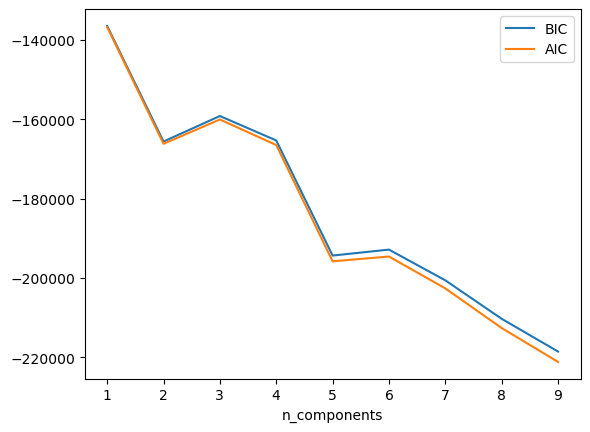

Clustering with:  GMM
Number of clusters:  5
Scaling:  False
Initialization 0
  Iteration 10	 time lapse 0.25741s	 ll change 0.12550
  Iteration 20	 time lapse 0.08544s	 ll change 0.15815
  Iteration 30	 time lapse 0.09312s	 ll change 0.00572
Initialization converged: True	 time lapse 0.53768s	 ll 20.63406


/tmp/ipykernel_10031/198839375.py:281: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(UFR30["x/h"], UFR30["y/h"], c=label_color, s=10, cmap='viridis')


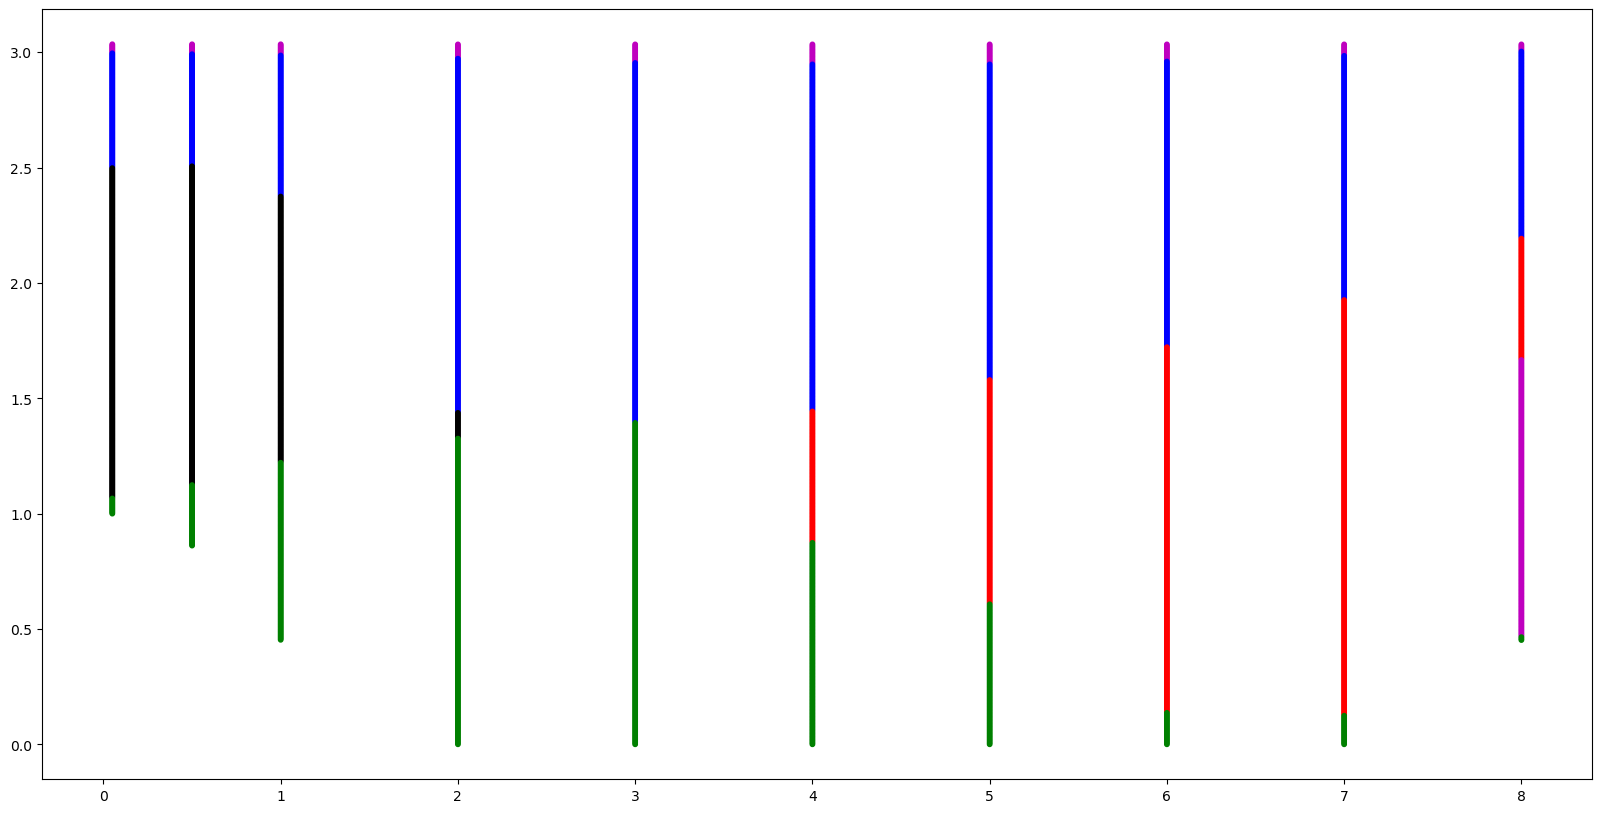

In [117]:
F = UFR30
compute_AIC_BIC(F, 10)
labels = compute_clusters("GMM", F, 5, scaling=False)

In [120]:
UFR30['labels'] = labels

In [209]:
UFR30.head(467)

,y/h,U/Ubulk,V/Ubulk,uu/Ubulk^2,vv/Ubulk^2,uv/Ubulk^2,k/Ubulk^2,x/h,labels
0,3.034032,0.041413,-0.000001,0.000163,4.157719e-09,2.283520e-08,0.000111,0.05,4
1,3.029668,0.218448,-0.000035,0.004560,4.267335e-06,6.006427e-05,0.002846,0.05,4
2,3.025304,0.376105,-0.000088,0.012480,2.855423e-05,2.984513e-04,0.007576,0.05,4
3,3.020940,0.506624,-0.000130,0.019329,8.277674e-05,6.644108e-04,0.011755,0.05,4
4,3.016576,0.607676,-0.000138,0.022834,1.669506e-04,1.023229e-03,0.014172,0.05,4
...,...,...,...,...,...,...,...,...,...
462,1.017830,0.355734,-0.003374,0.082933,2.336004e-03,-4.480049e-03,0.057542,0.05,3
463,1.013466,0.241427,-0.003074,0.064838,1.486475e-03,-3.077231e-03,0.045931,0.05,3
464,1.009102,0.128889,-0.001902,0.041008,6.720950e-04,-1.476111e-03,0.030551,0.05,3
465,1.004738,0.037749,-0.000588,0.016674,1.255652e-04,-3.121372e-04,0.013341,0.05,3


In [122]:
c0 = UFR30.loc[UFR30['labels'] == 0]
c1 = UFR30.loc[UFR30['labels'] == 1]
c2 = UFR30.loc[UFR30['labels'] == 2]
c3 = UFR30.loc[UFR30['labels'] == 3]
c4 = UFR30.loc[UFR30['labels'] == 4]

In [123]:
#c0, c1, c2, c3, c4
c0.shape, c1.shape, c2.shape, c3.shape, c4.shape

((851, 9), (1796, 9), (881, 9), (945, 9), (297, 9))

In [52]:
np.savetxt('cluster0.txt', c0[['x/h','y/h']])
np.savetxt('cluster1.txt', c1[['x/h','y/h']])
np.savetxt('cluster2.txt', c2[['x/h','y/h']])
np.savetxt('cluster3.txt', c3[['x/h','y/h']])
np.savetxt('cluster4.txt', c4[['x/h','y/h']])

In [124]:
#F = UFR30[['U/Ubulk','V/Ubulk']]
#compute_AIC_BIC(F, 10)
#compute_clusters("GMM", F, 4, scaling=False)

In [125]:
#F = UFR30[['uu/Ubulk^2','vv/Ubulk^2','uv/Ubulk^2']]
#compute_AIC_BIC(F, 10)
#compute_clusters("GMM", F, 5, scaling=False)

In [126]:
#F = UFR30[['k/Ubulk^2']]
#compute_AIC_BIC(F, 10)
#compute_clusters("GMM", F, 3, scaling=False)

In [127]:
OFp001 = pd.read_csv('OFpoints/X0H_U.csv')
OFp002 = pd.read_csv('OFpoints/X05H_U.csv')
OFp003 = pd.read_csv('OFpoints/X1H_U.csv')
OFp004 = pd.read_csv('OFpoints/X2H_U.csv')
OFp005 = pd.read_csv('OFpoints/X3H_U.csv')
OFp006 = pd.read_csv('OFpoints/X4H_U.csv')
OFp007 = pd.read_csv('OFpoints/X5H_U.csv')
OFp008 = pd.read_csv('OFpoints/X6H_U.csv')
OFp009 = pd.read_csv('OFpoints/X7H_U.csv')
OFp010 = pd.read_csv('OFpoints/X8H_U.csv')
OF     = [OFp001,OFp002,OFp003,OFp004,OFp005,OFp006,OFp007,OFp008,OFp009,OFp010]

In [278]:
#l1  = UFR30.loc[0:466]
#l2  = UFR30.loc[467:467+457]
#l3  = UFR30.loc[467+457:467+457+482]
#l4  = UFR30.loc[467+457+482:467+457+482+491]
#l5  = UFR30.loc[467+457+482+491:467+457+482+491+491]
#l6  = UFR30.loc[467+457+482+491+491:467+457+482+491+491+491]
#l7  = UFR30.loc[467+457+482+491+491+491:467+457+482+491+491+491+491+491]
#l8  = UFR30.loc[467+457+482+491+491+491+491:467+457+482+491+491+491+491+491]
#l9  = UFR30.loc[467+457+482+491+491+491+491+491:467+457+482+491+491+491+491+491+491]
#l10 = UFR30.loc[467+457+482+491+491+491+491+491+491:467+457+482+491+491+491+491+491+491+418]
#l1.shape,l2.shape,l3.shape,l4.shape,l5.shape,l6.shape,l7.shape,l8.shape,l9.shape,l10.shape

In [290]:
l1  = UFR30.loc[0:len(p001)-1] 
l2  = UFR30.loc[len(p001):len(p001)+len(p002)-1]
l3  = UFR30.loc[len(p001)+len(p002):len(p001)+len(p002)+len(p003)-1]
l4  = UFR30.loc[len(p001)+len(p002)+len(p003):len(p001)+len(p002)+len(p003)+len(p004)-1]
l5  = UFR30.loc[len(p001)+len(p002)+len(p003)+len(p004):len(p001)+len(p002)+len(p003)+len(p004)+len(p005)-1]
l6  = UFR30.loc[len(p001)+len(p002)+len(p003)+len(p004)+len(p005):len(p001)+len(p002)+len(p003)+len(p004)+len(p005)+len(p006)-1]
l7  = UFR30.loc[len(p001)+len(p002)+len(p003)+len(p004)+len(p005)+len(p006):len(p001)+len(p002)+len(p003)+len(p004)+len(p005)+len(p006)+len(p007)-1]
l8  = UFR30.loc[len(p001)+len(p002)+len(p003)+len(p004)+len(p005)+len(p006)+len(p007):len(p001)+len(p002)+len(p003)+len(p004)+len(p005)+len(p006)+len(p007)+len(p008)-1]
l9  = UFR30.loc[len(p001)+len(p002)+len(p003)+len(p004)+len(p005)+len(p006)+len(p007)+len(p008):len(p001)+len(p002)+len(p003)+len(p004)+len(p005)+len(p006)+len(p007)+len(p008)+len(p009)-1]
l10 = UFR30.loc[len(p001)+len(p002)+len(p003)+len(p004)+len(p005)+len(p006)+len(p007)+len(p008)+len(p009):len(p001)+len(p002)+len(p003)+len(p004)+len(p005)+len(p006)+len(p007)+len(p008)+len(p009)+len(p010)-1]
l1.shape,l2.shape,l3.shape,l4.shape,l5.shape,l6.shape,l7.shape,l8.shape,l9.shape,l10.shape

((467, 10),
 (457, 10),
 (482, 10),
 (491, 10),
 (491, 10),
 (491, 10),
 (491, 10),
 (491, 10),
 (491, 10),
 (418, 10))

In [291]:
lref= [l1,l2,l3,l4,l5,l6,l7,l8,l9,l10]

In [292]:
l1

,y/h,U/Ubulk,V/Ubulk,uu/Ubulk^2,vv/Ubulk^2,uv/Ubulk^2,k/Ubulk^2,x/h,labels,z/h
0,3.034032,0.041413,-0.000001,0.000163,4.157719e-09,2.283520e-08,0.000111,0.05,4,0.0
1,3.029668,0.218448,-0.000035,0.004560,4.267335e-06,6.006427e-05,0.002846,0.05,4,0.0
2,3.025304,0.376105,-0.000088,0.012480,2.855423e-05,2.984513e-04,0.007576,0.05,4,0.0
3,3.020940,0.506624,-0.000130,0.019329,8.277674e-05,6.644108e-04,0.011755,0.05,4,0.0
4,3.016576,0.607676,-0.000138,0.022834,1.669506e-04,1.023229e-03,0.014172,0.05,4,0.0
...,...,...,...,...,...,...,...,...,...,...
462,1.017830,0.355734,-0.003374,0.082933,2.336004e-03,-4.480049e-03,0.057542,0.05,3,0.0
463,1.013466,0.241427,-0.003074,0.064838,1.486475e-03,-3.077231e-03,0.045931,0.05,3,0.0
464,1.009102,0.128889,-0.001902,0.041008,6.720950e-04,-1.476111e-03,0.030551,0.05,3,0.0
465,1.004738,0.037749,-0.000588,0.016674,1.255652e-04,-3.121372e-04,0.013341,0.05,3,0.0


In [297]:
locs = [0.05, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
for i in range(10):
    loc = locs[i]
    line= lref[i]
    for c in range(5):
        line[line['labels']==c][['x/h','y/h','z/h']].to_csv('cluster'+str(c)+'_x'+str(loc)+'.csv',index=False)

0
(477, 9)
(477,)
(161,)
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


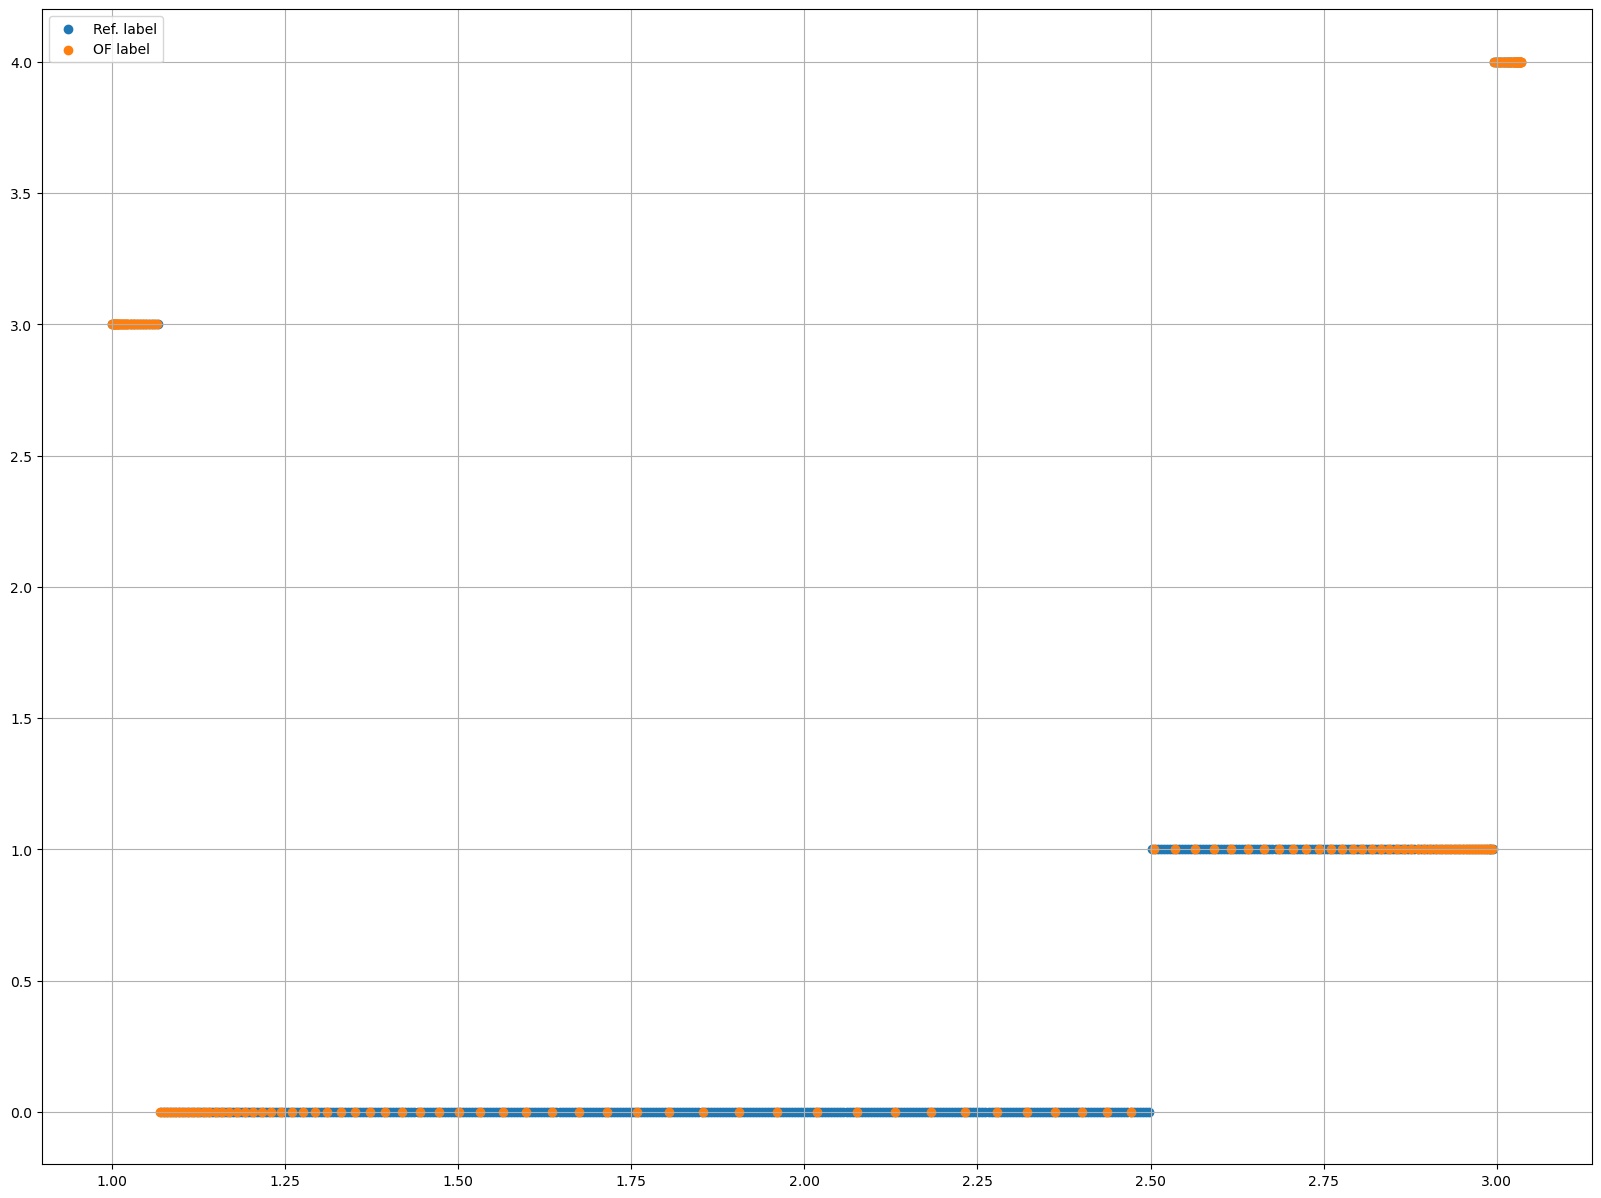

55 41 0 36 29
55 41 0 36 29
55 41 0 36 29
55 41 0 36 29
1
(458, 9)
(458,)
(161,)
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 4. 1. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


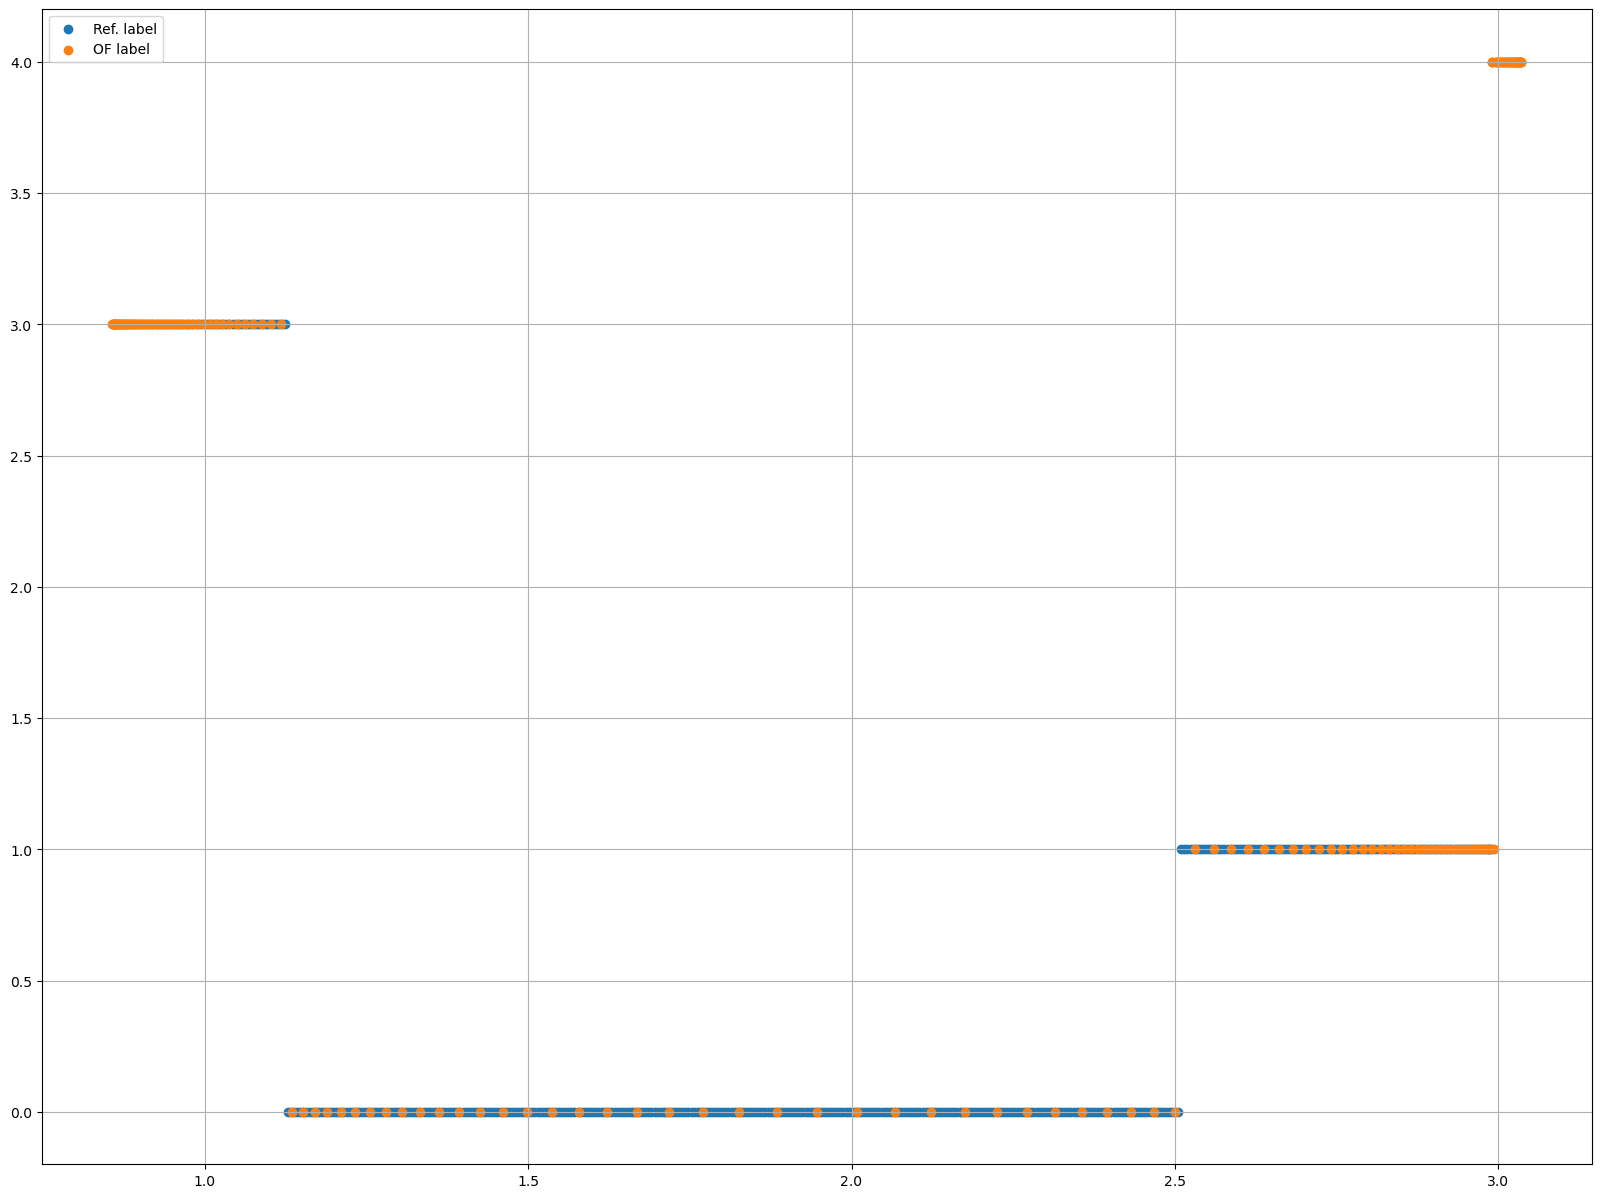

91 80 0 93 58
91 80 0 93 58
91 80 0 93 58
91 80 0 93 58
2
(483, 9)
(483,)
(163,)
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 4. 4. 1. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


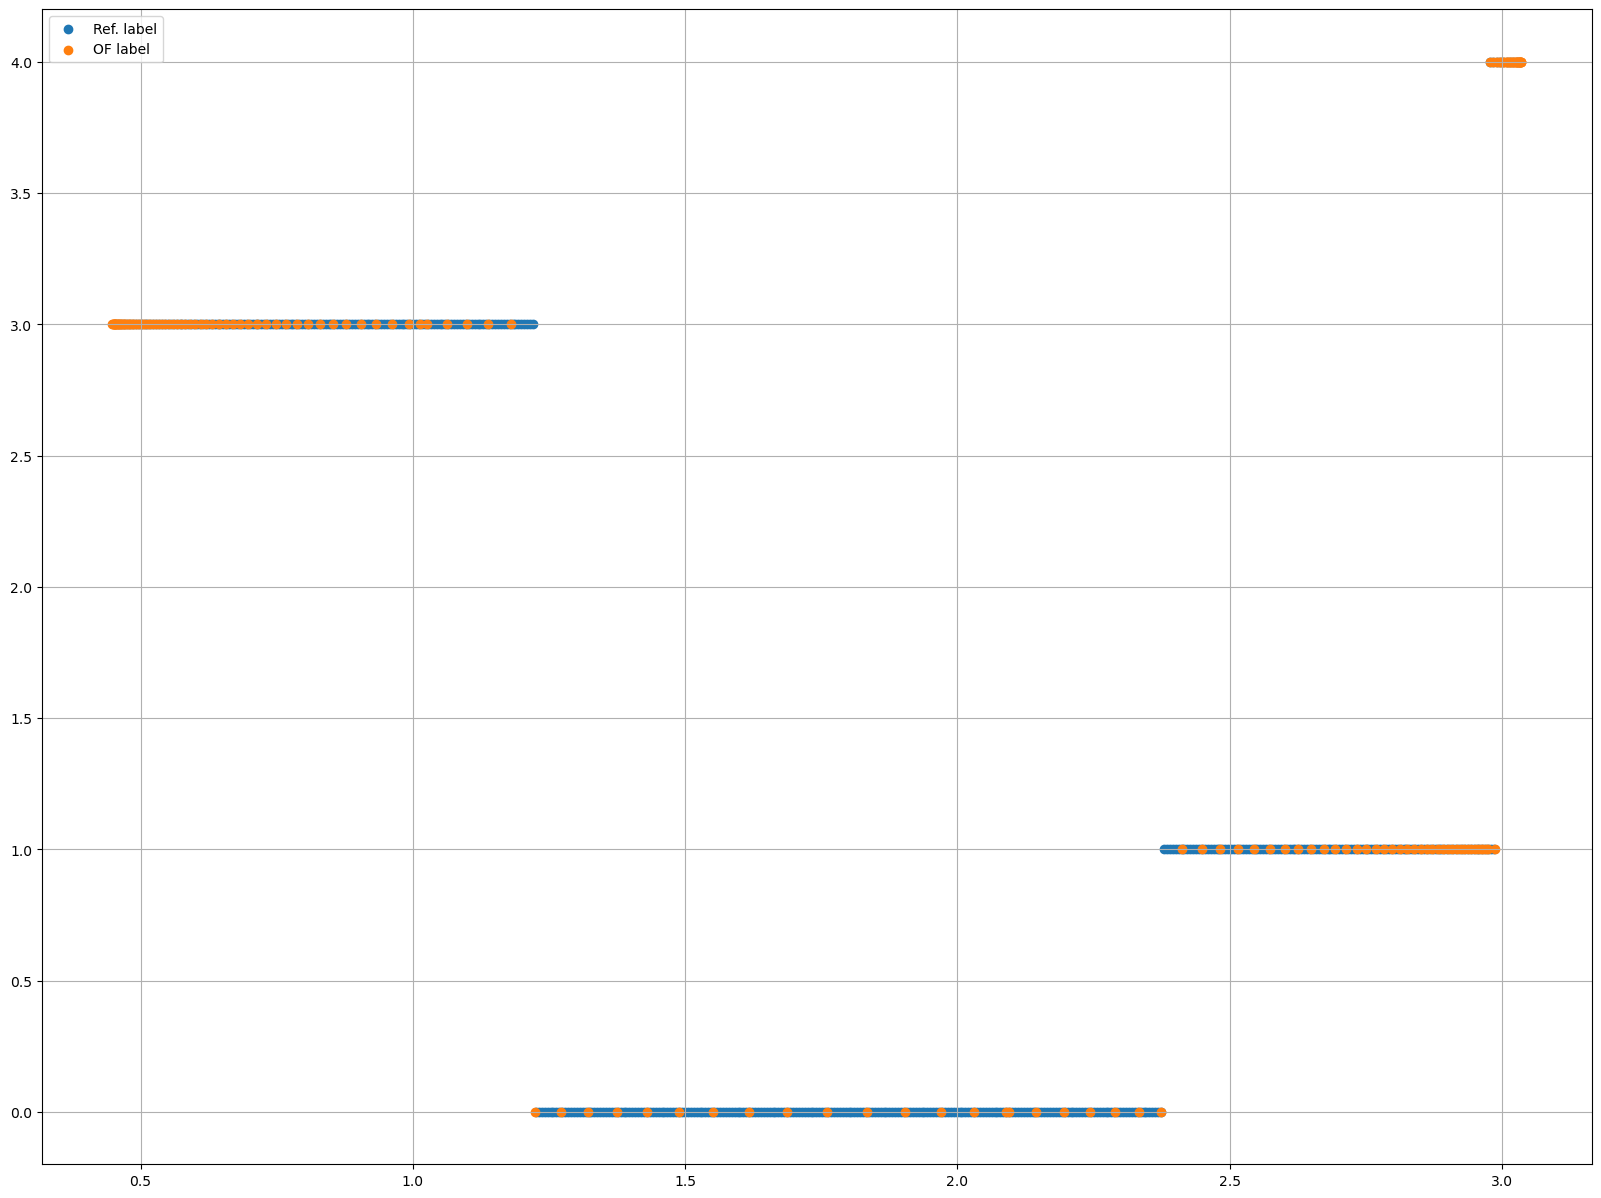

113 119 0 165 88
113 119 0 165 88
113 119 0 165 88
113 119 0 165 88
3
(492, 9)
(492,)
(164,)
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


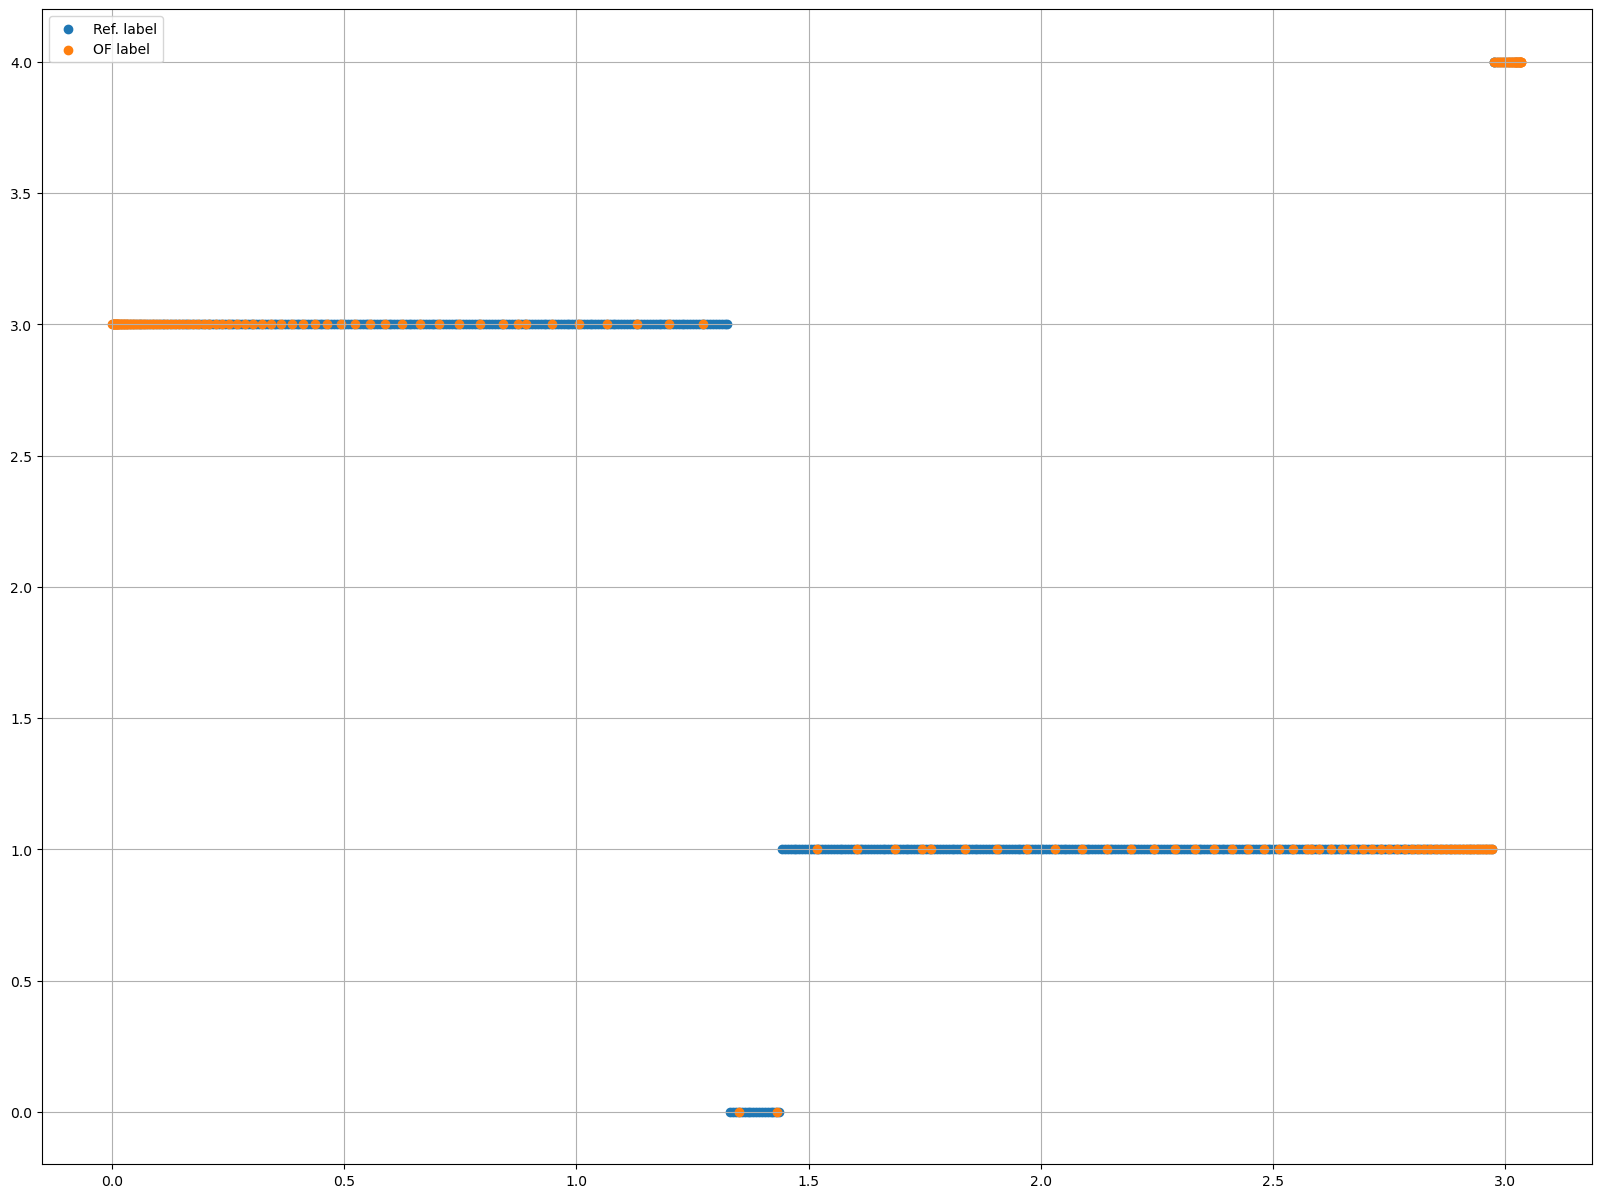

115 173 0 244 117
115 173 0 244 117
115 173 0 244 117
115 173 0 244 117
4
(492, 9)
(492,)
(163,)
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


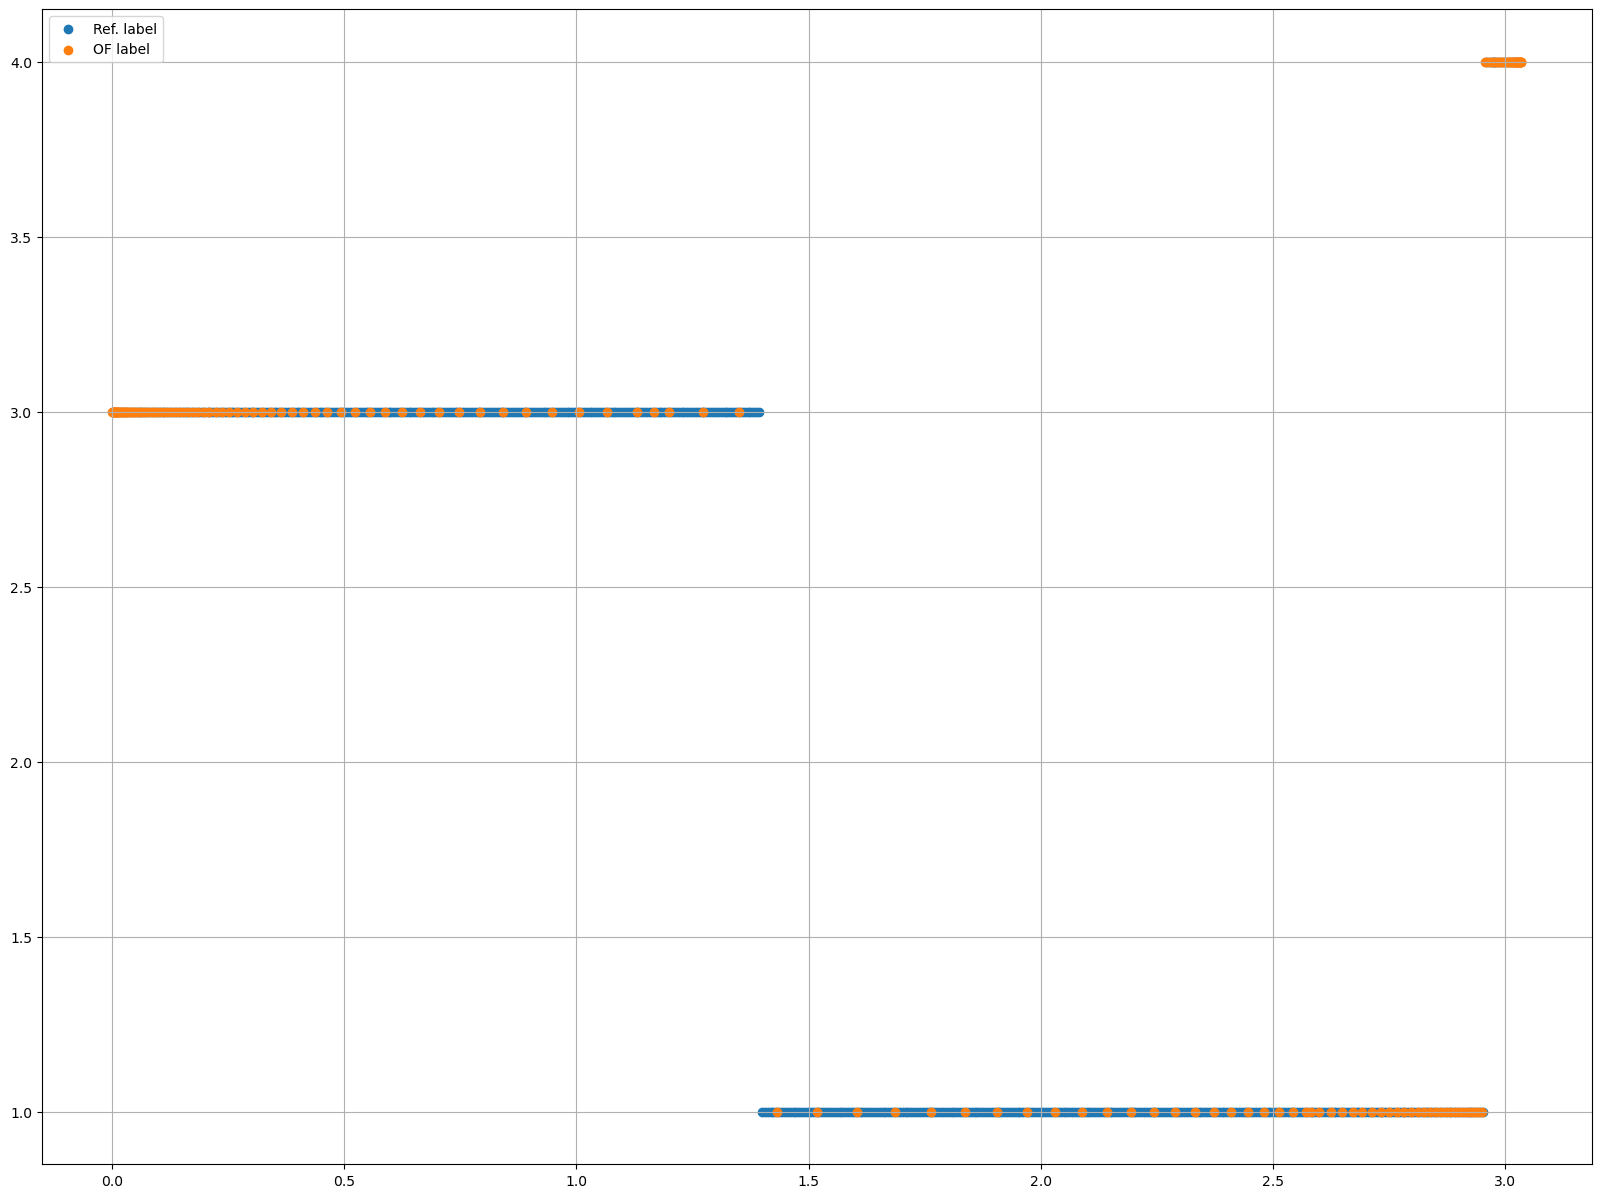

115 223 0 324 150
115 223 0 324 150
115 223 0 324 150
115 223 0 324 150
5
(492, 9)
(492,)
(162,)
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


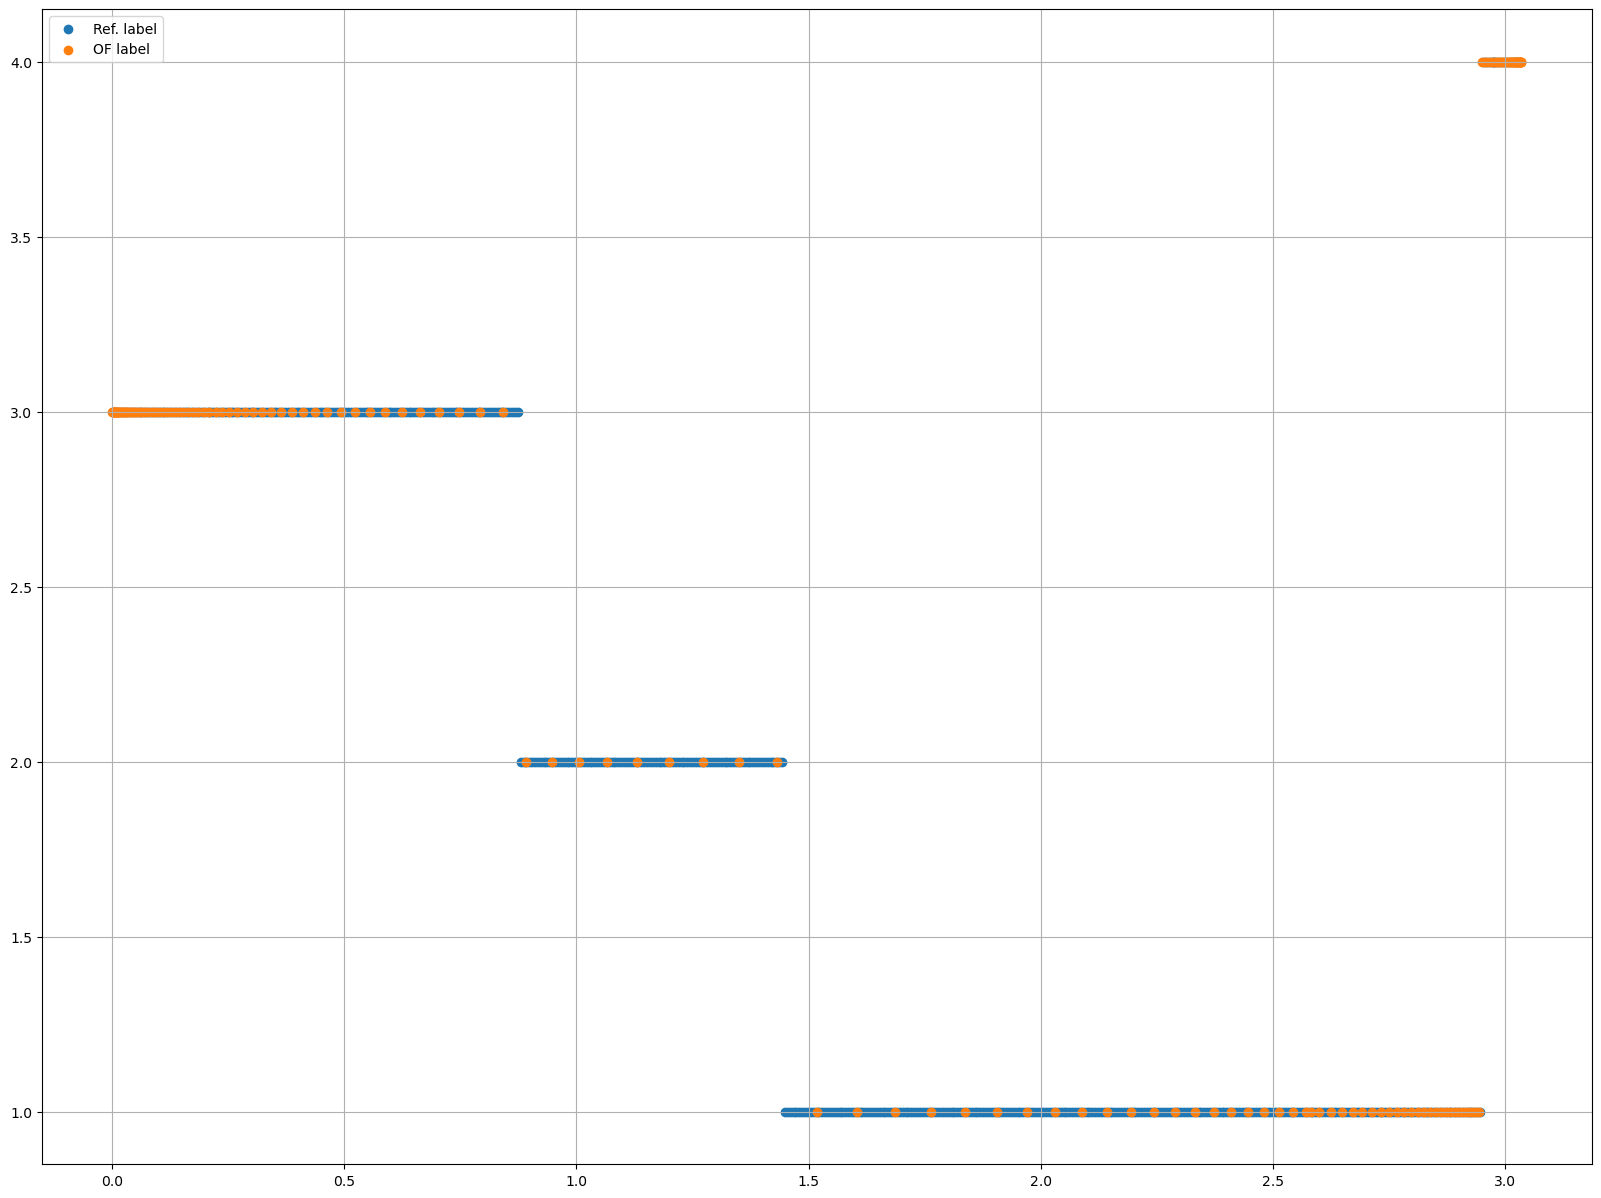

115 271 9 395 184
115 271 9 395 184
115 271 9 395 184
115 271 9 395 184
6
(983, 9)
(983,)
(162,)
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 2. 3. 2. 3. 3. 3. 3.
 3. 2. 3. 2. 3. 3. 3. 2. 3. 2. 2. 2. 3. 2. 2. 2. 3. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 4. 4. 1. 4. 4. 4. 1. 1. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


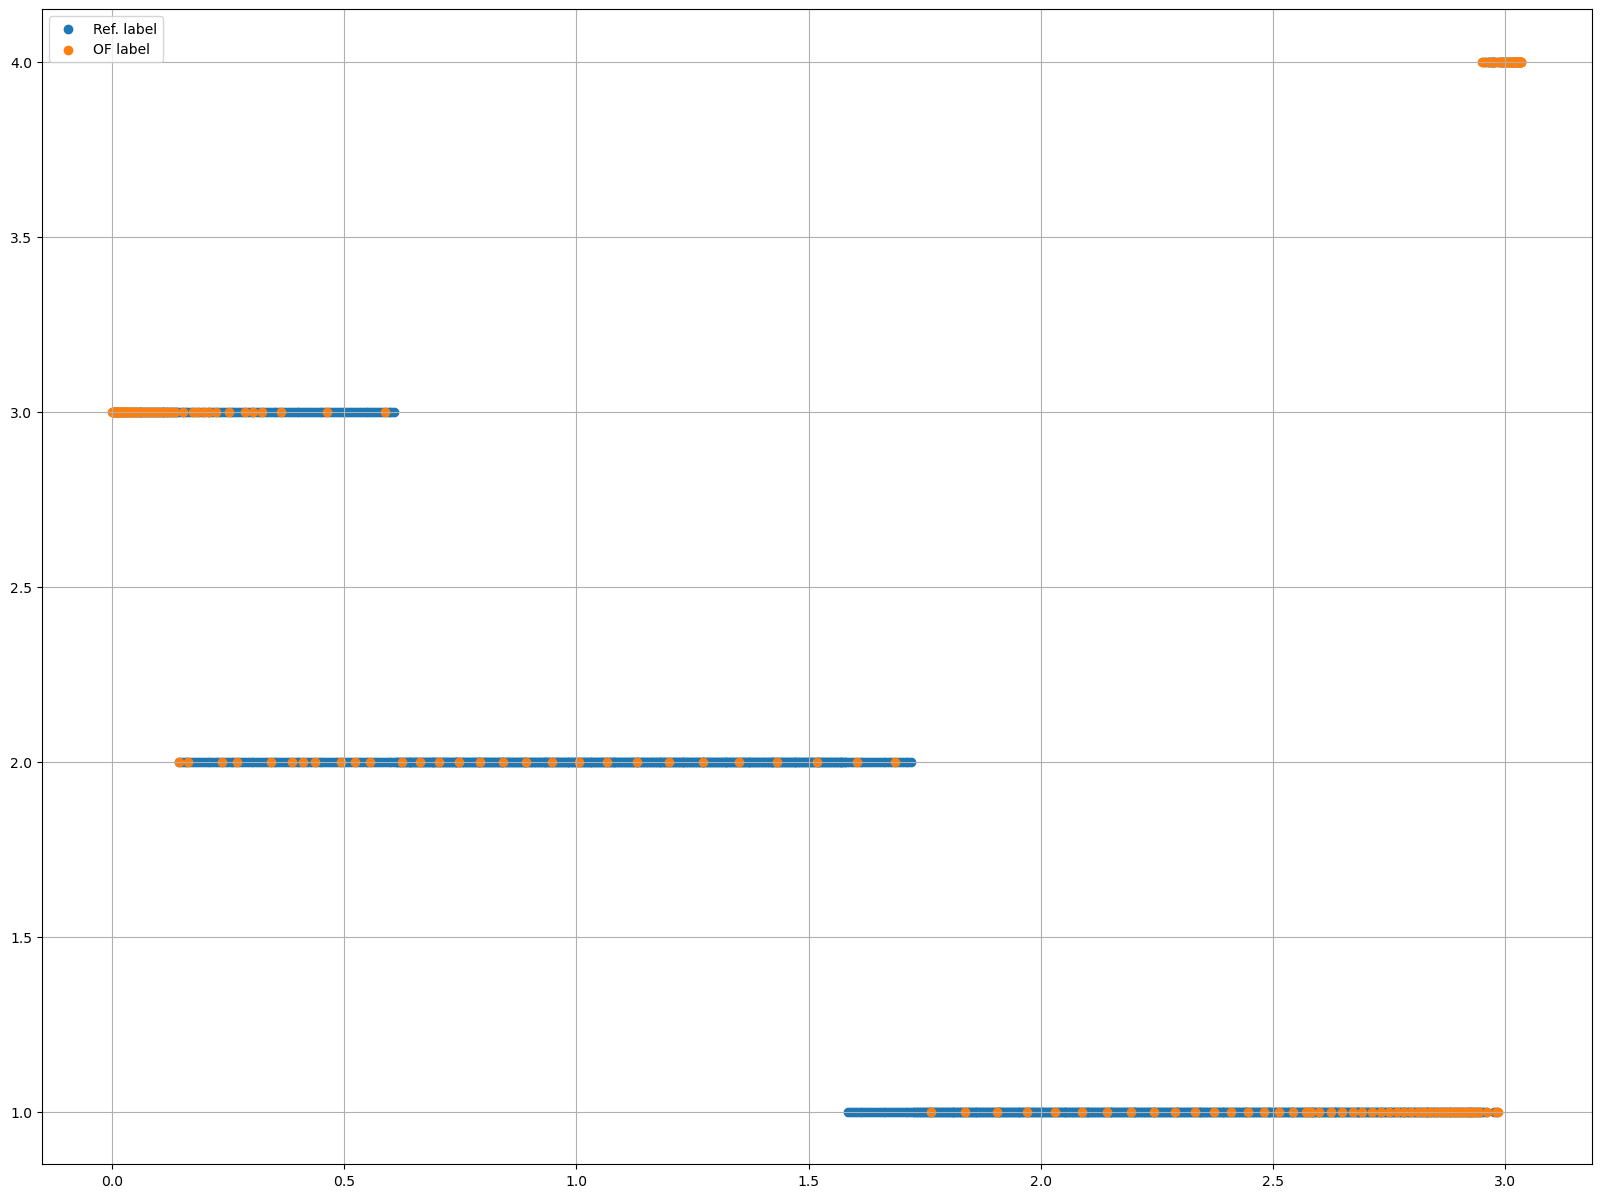

115 319 38 449 215
115 319 38 449 215
115 319 38 449 215
115 319 38 449 215
7
(492, 9)
(492,)
(163,)
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 4. 4. 4. 1. 1. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


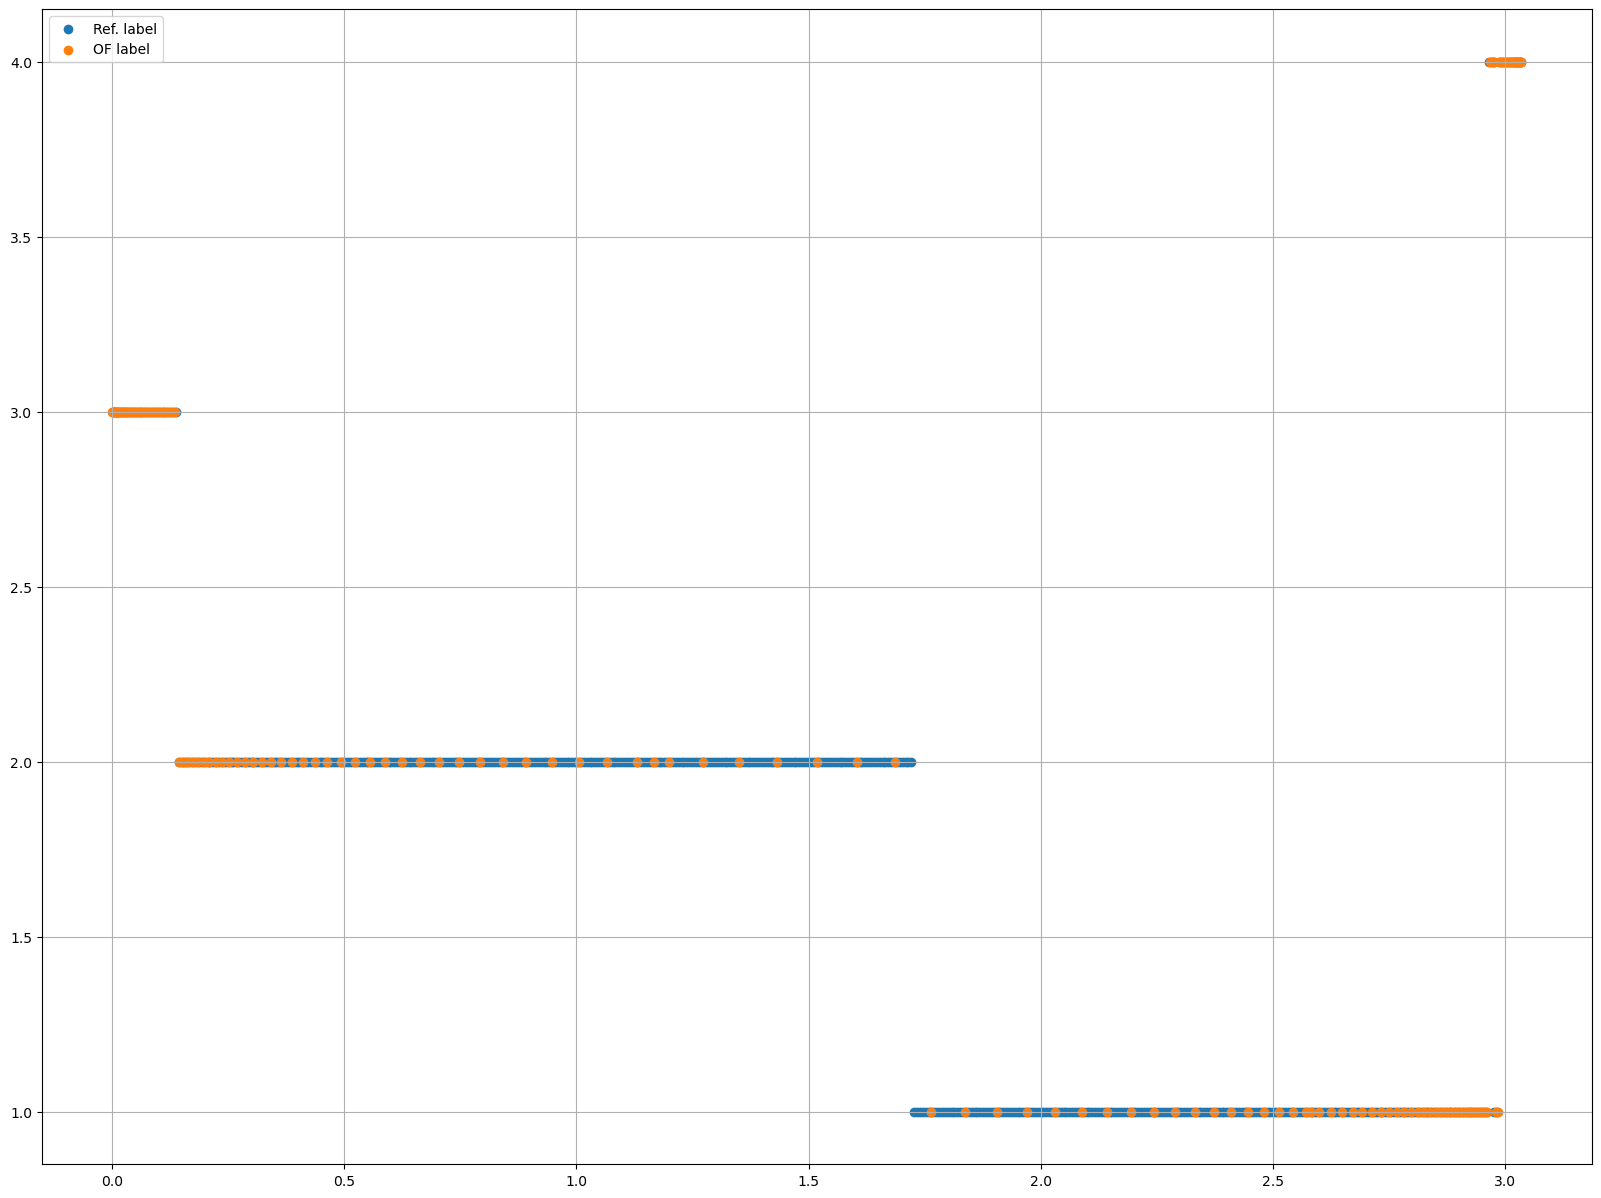

115 369 81 490 244
115 369 81 490 244
115 369 81 490 244
115 369 81 490 244
8
(492, 9)
(492,)
(164,)
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


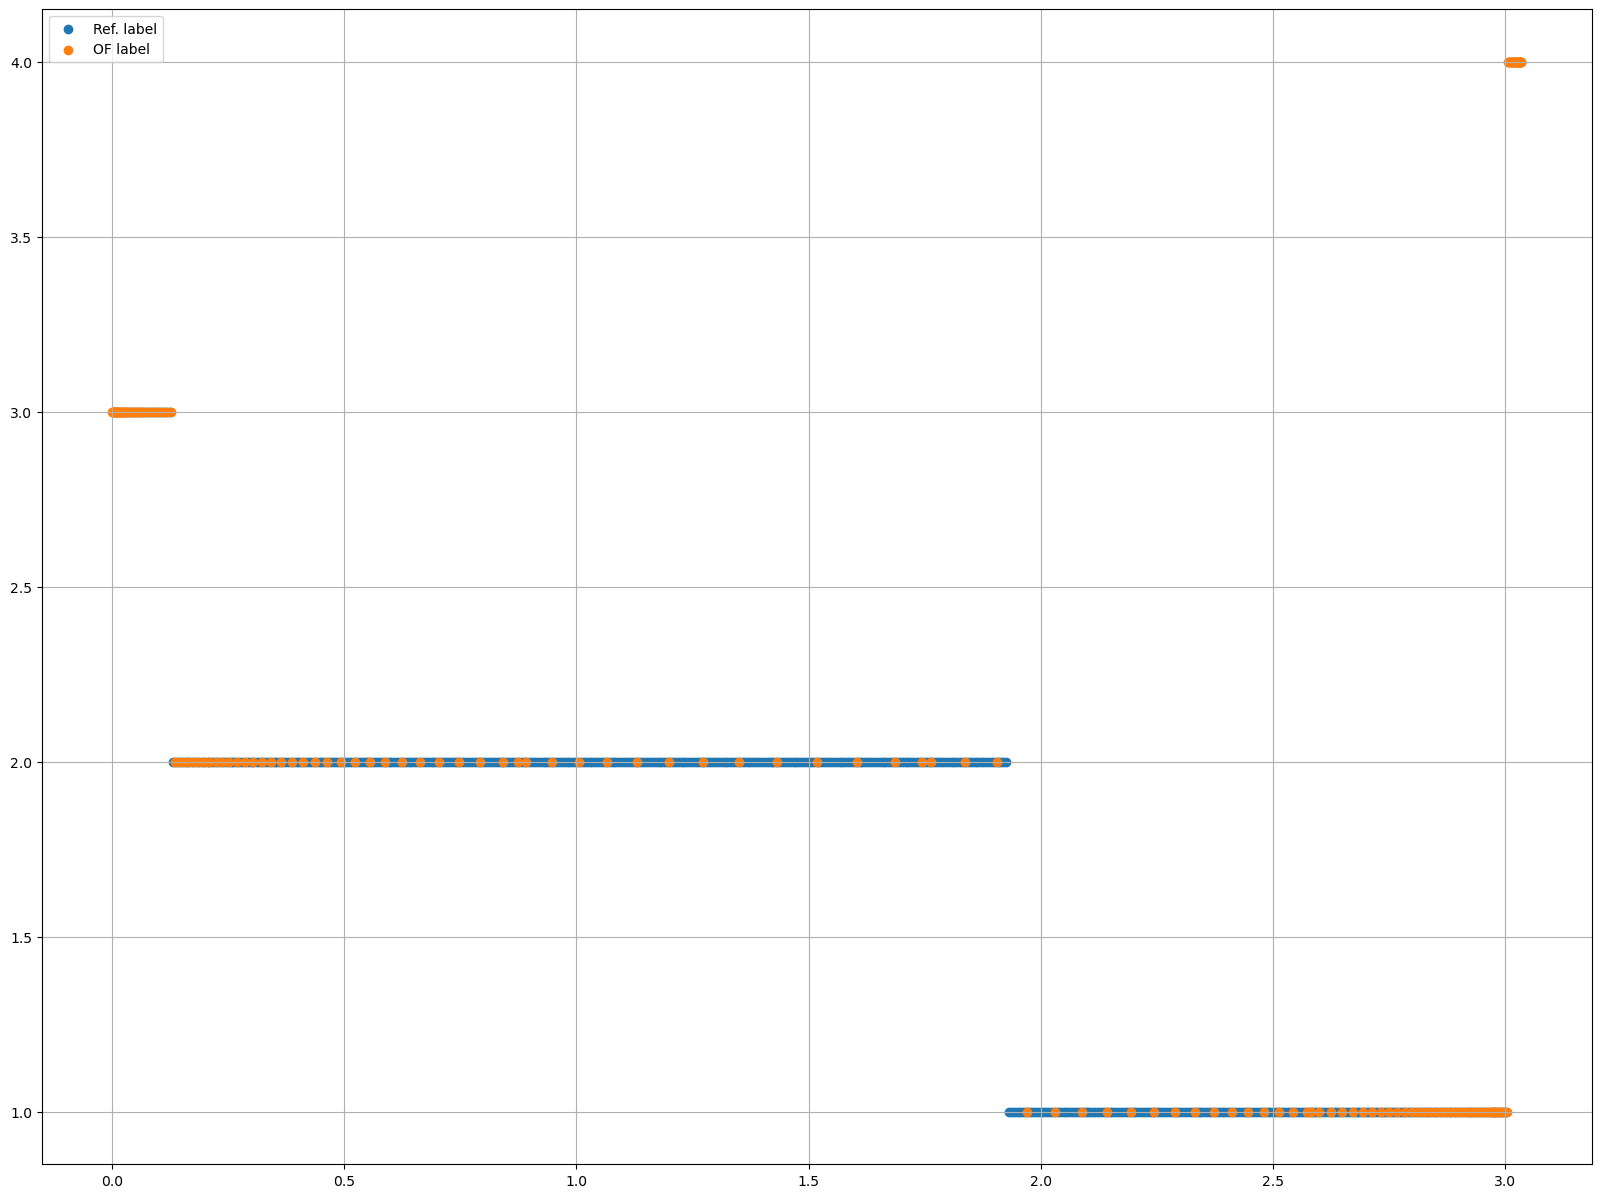

115 425 129 530 264
115 425 129 530 264
115 425 129 530 264
115 425 129 530 264
9
(409, 9)
(409,)
(163,)
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


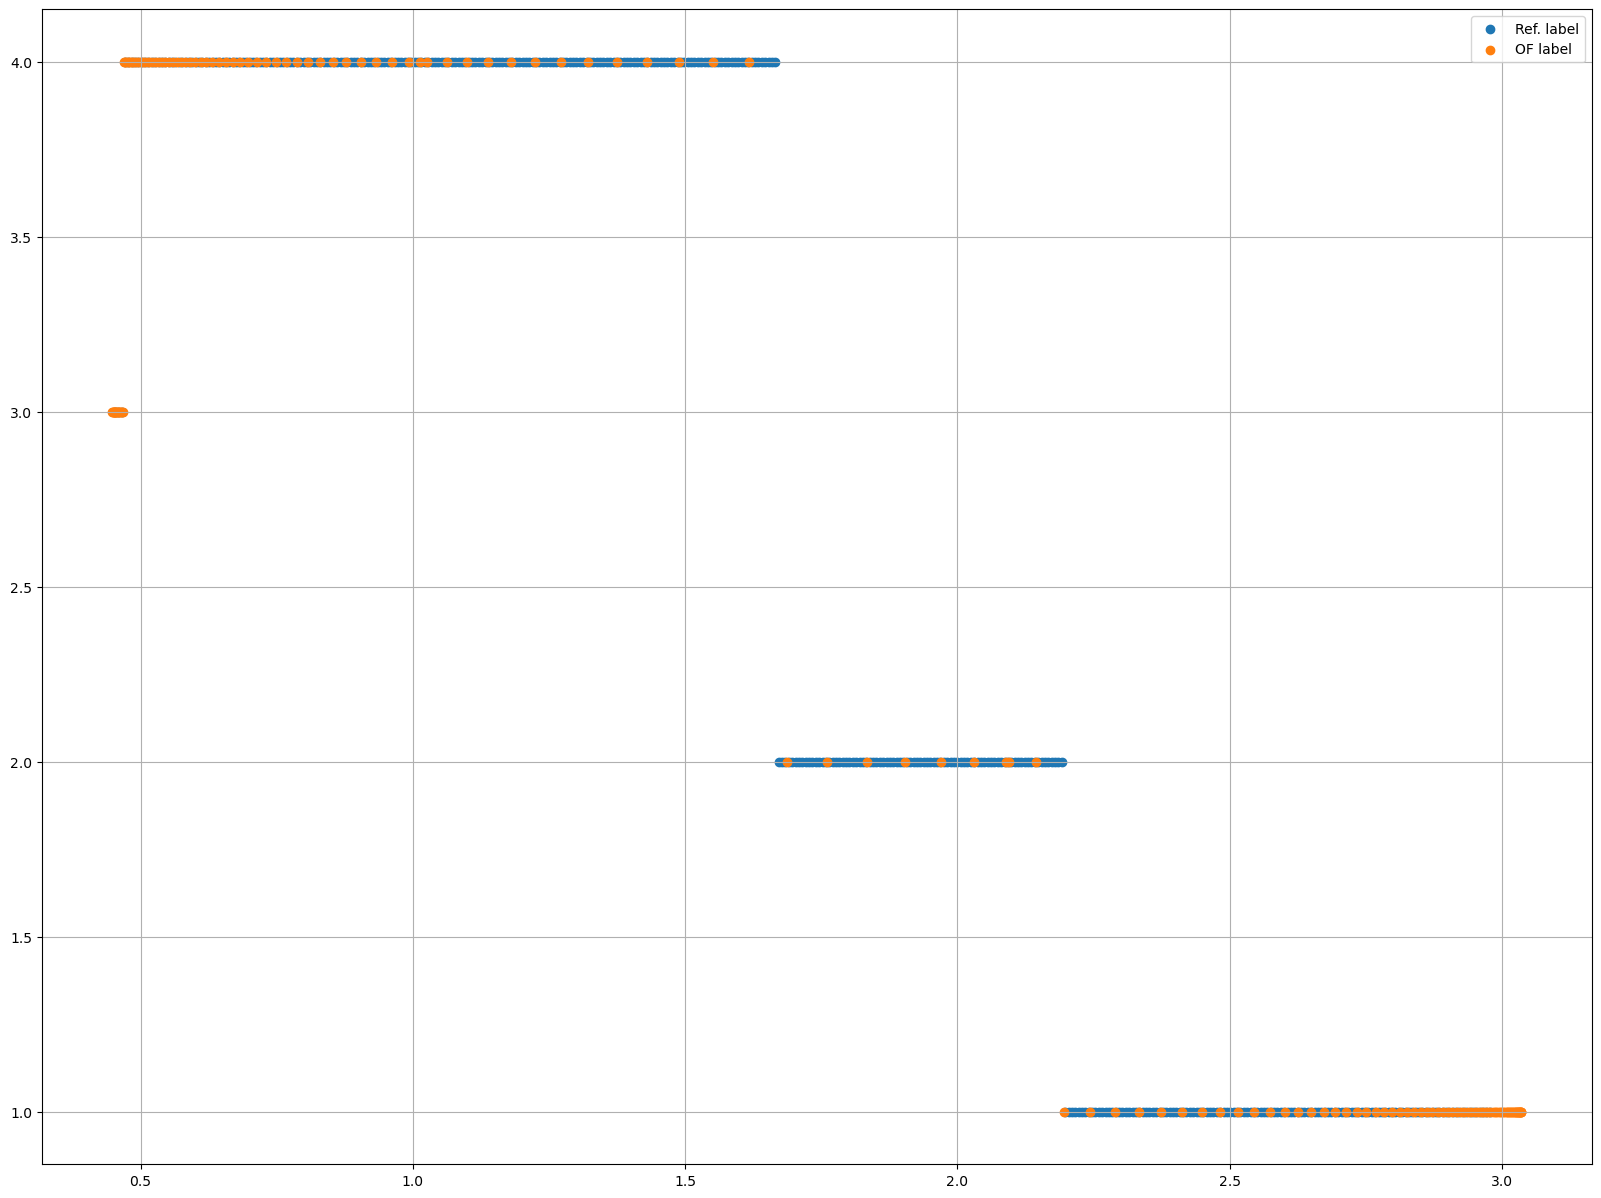

115 499 138 547 327
115 499 138 547 327
115 499 138 547 327
115 499 138 547 327


In [199]:
c0U = []
c1U = []
c2U = []
c3U = []
c4U = []

c0V = []
c1V = []
c2V = []
c3V = []
c4V = []

c0k = []
c1k = []
c2k = []
c3k = []
c4k = []

c0Rxy = []
c1Rxy = []
c2Rxy = []
c3Rxy = []
c4Rxy = []

c0y = []
c1y = []
c2y = []
c3y = []
c4y = []

for i in range(10):
    print(i)
    
    # retrieve reference data
    pRef    = lref[i]
    pRefx   = pRef['x/h']
    pRefy   = pRef['y/h']
    pRefU   = pRef['U/Ubulk']
    pRefV   = pRef['V/Ubulk']
    pRefRxy = pRef['uv/Ubulk^2']
    pRefk   = pRef['k/Ubulk^2']
    pReflab = pRef['labels']
    
    # retrieve openfoam solutions
    pOF     = OF[i]
    pOFy    = pOF['y']
    
    print(pRef.shape)
    print(pRefy.shape)
    print(pOFy.shape)
    
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html
    fU   = interpolate.interp1d(pRefy, pRefU,   kind='linear', fill_value="extrapolate", bounds_error=False)
    fV   = interpolate.interp1d(pRefy, pRefV,   kind='linear', fill_value="extrapolate", bounds_error=False)
    fk   = interpolate.interp1d(pRefy, pRefk,   kind='linear', fill_value="extrapolate", bounds_error=False)
    fRxy = interpolate.interp1d(pRefy, pRefRxy, kind='linear', fill_value="extrapolate", bounds_error=False)
    flab = interpolate.interp1d(pRefy, pReflab, kind='nearest',fill_value="extrapolate", bounds_error=False)
    
    pOFU   = fU(pOFy)
    pOFV   = fV(pOFy)
    pOFk   = fk(pOFy)
    pOFRxy = fRxy(pOFy)
    pOFlab = flab(pOFy)
    
    print(pOFlab)
    
    plt.figure(figsize=(20,15))
    plt.scatter(pRefy, pReflab, label='Ref. label')
    plt.scatter(pOFy,  pOFlab,  label='OF label')
    plt.grid()
    plt.legend()
    plt.show()
    plt.close()

    for j in range(len(pOFlab)):
        if(pOFlab[j]==0):
            c0y.append(pOFy[j])
        elif(pOFlab[j]==1):
            c1y.append(pOFy[j])
        elif(pOFlab[j]==2):
            c2y.append(pOFy[j])
        elif(pOFlab[j]==3):
            c3y.append(pOFy[j])
        elif(pOFlab[j]==4):
            c4y.append(pOFy[j])
            
    for j in range(len(pOFlab)):
        if(pOFlab[j]==0):
            c0U.append(pOFU[j])
        elif(pOFlab[j]==1):
            c1U.append(pOFU[j])
        elif(pOFlab[j]==2):
            c2U.append(pOFU[j])
        elif(pOFlab[j]==3):
            c3U.append(pOFU[j])
        elif(pOFlab[j]==4):
            c4U.append(pOFU[j])
    
    print(len(c0U),len(c1U),len(c2U),len(c3U),len(c4U))
    
    for j in range(len(pOFlab)):
        if(pOFlab[j]==0):
            c0V.append(pOFV[j])
        elif(pOFlab[j]==1):
            c1V.append(pOFV[j])
        elif(pOFlab[j]==2):
            c2V.append(pOFV[j])
        elif(pOFlab[j]==3):
            c3V.append(pOFV[j])
        elif(pOFlab[j]==4):
            c4V.append(pOFV[j])
            
    print(len(c0V),len(c1V),len(c2V),len(c3V),len(c4V))
    
    for j in range(len(pOFlab)):
        if(pOFlab[j]==0):
            c0Rxy.append(pOFRxy[j])
        elif(pOFlab[j]==1):
            c1Rxy.append(pOFRxy[j])
        elif(pOFlab[j]==2):
            c2Rxy.append(pOFRxy[j])
        elif(pOFlab[j]==3):
            c3Rxy.append(pOFRxy[j])
        elif(pOFlab[j]==4):
            c4Rxy.append(pOFRxy[j])
            
    print(len(c0Rxy),len(c1Rxy),len(c2Rxy),len(c3Rxy),len(c4Rxy))
    
    for j in range(len(pOFlab)):
        if(pOFlab[j]==0):
            c0k.append(pOFk[j])
        elif(pOFlab[j]==1):
            c1k.append(pOFk[j])
        elif(pOFlab[j]==2):
            c2k.append(pOFk[j])
        elif(pOFlab[j]==3):
            c3k.append(pOFk[j])
        elif(pOFlab[j]==4):
            c4k.append(pOFk[j])
            
    print(len(c0k),len(c1k),len(c2k),len(c3k),len(c4k))
    
    data_out = np.asarray(c0y)
    file_out = "C0y00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c1y)
    file_out = "C1y00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c2y)
    file_out = "C2y00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c3y)
    file_out = "C3y00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c4y)
    file_out = "C4y00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c0U)
    file_out = "C0U00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c1U)
    file_out = "C1U00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c2U)
    file_out = "C2U00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c3U)
    file_out = "C3U00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c4U)
    file_out = "C4U00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c0V)
    file_out = "C0V00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c1V)
    file_out = "C1V00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c2V)
    file_out = "C2V00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c3V)
    file_out = "C3V00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c4V)
    file_out = "C4V00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c0Rxy)
    file_out = "C0Rxy00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c1Rxy)
    file_out = "C1Rxy00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c2Rxy)
    file_out = "C2Rxy00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c3Rxy)
    file_out = "C3Rxy00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c4Rxy)
    file_out = "C4Rxy00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c0k)
    file_out = "C0k00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c1k)
    file_out = "C1k00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c2k)
    file_out = "C2k00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c3k)
    file_out = "C3k00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c4k)
    file_out = "C4k00.edf"
    np.savetxt(file_out, data_out)

cluster0/cluster0_x0.05_U.xy
(328, 6)


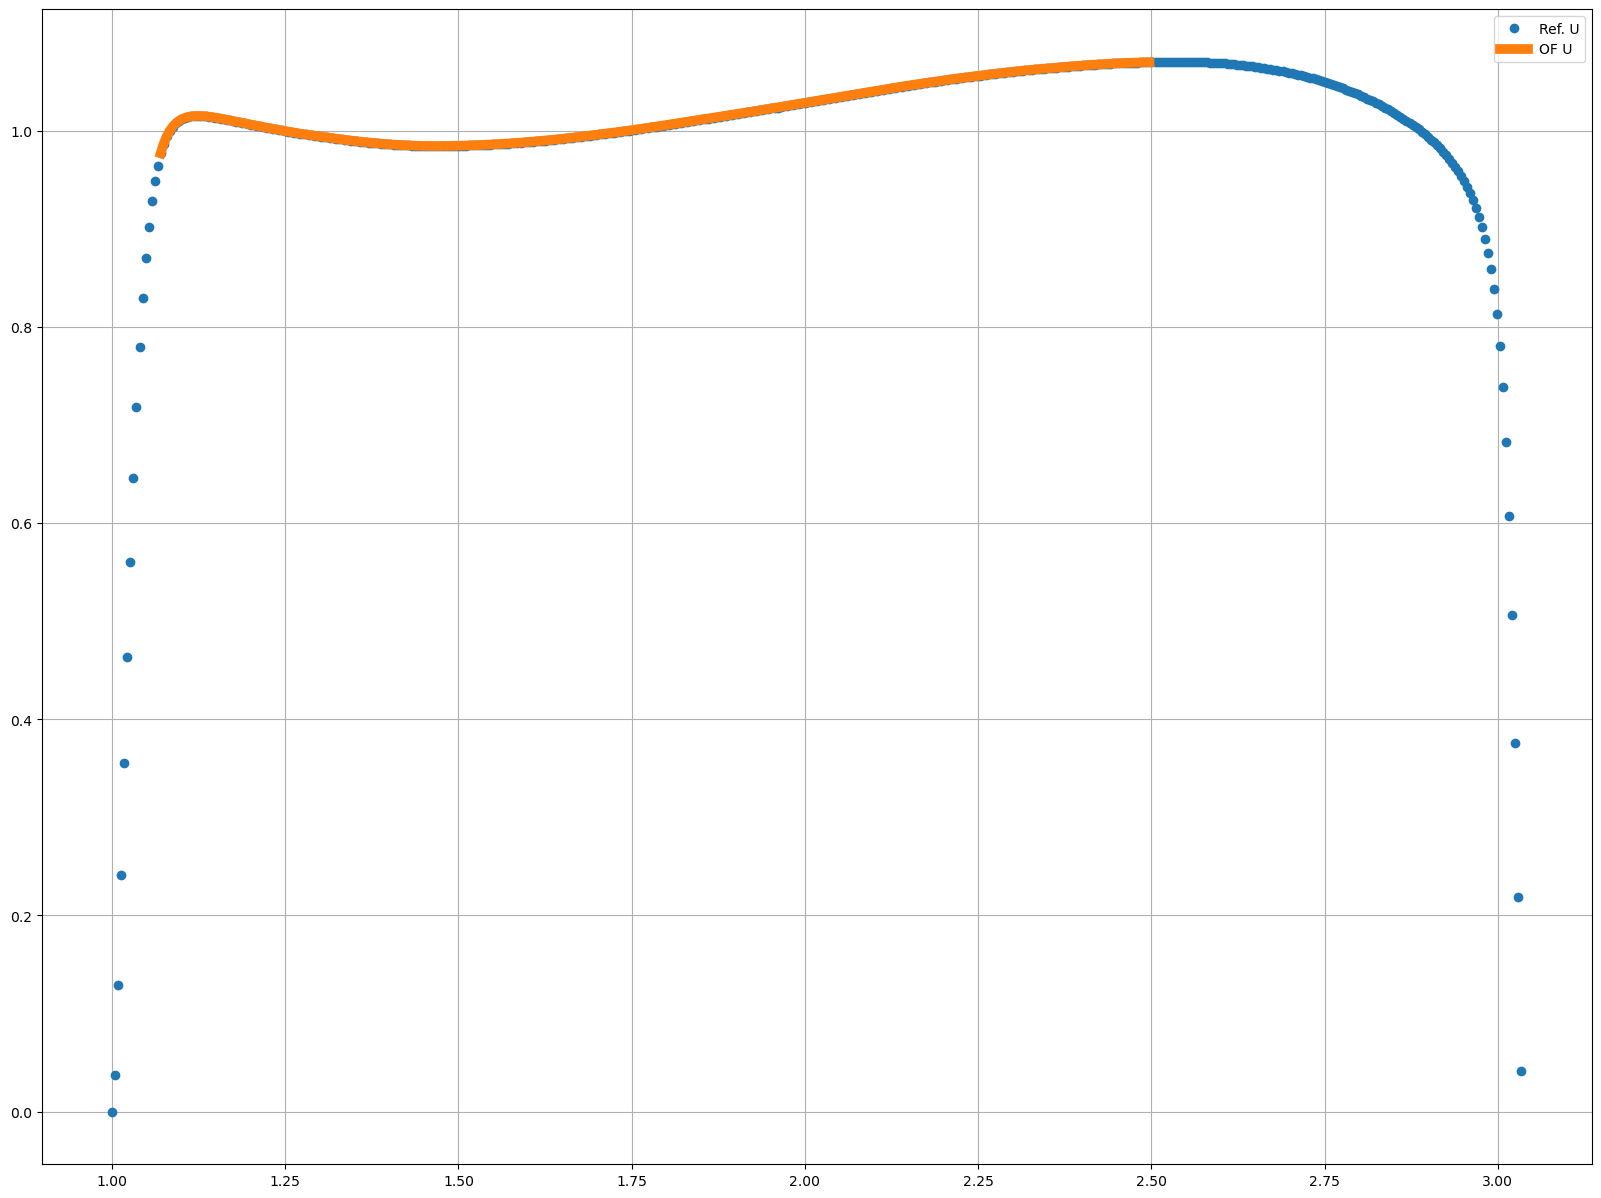

cluster1/cluster1_x0.05_U.xy
(114, 6)


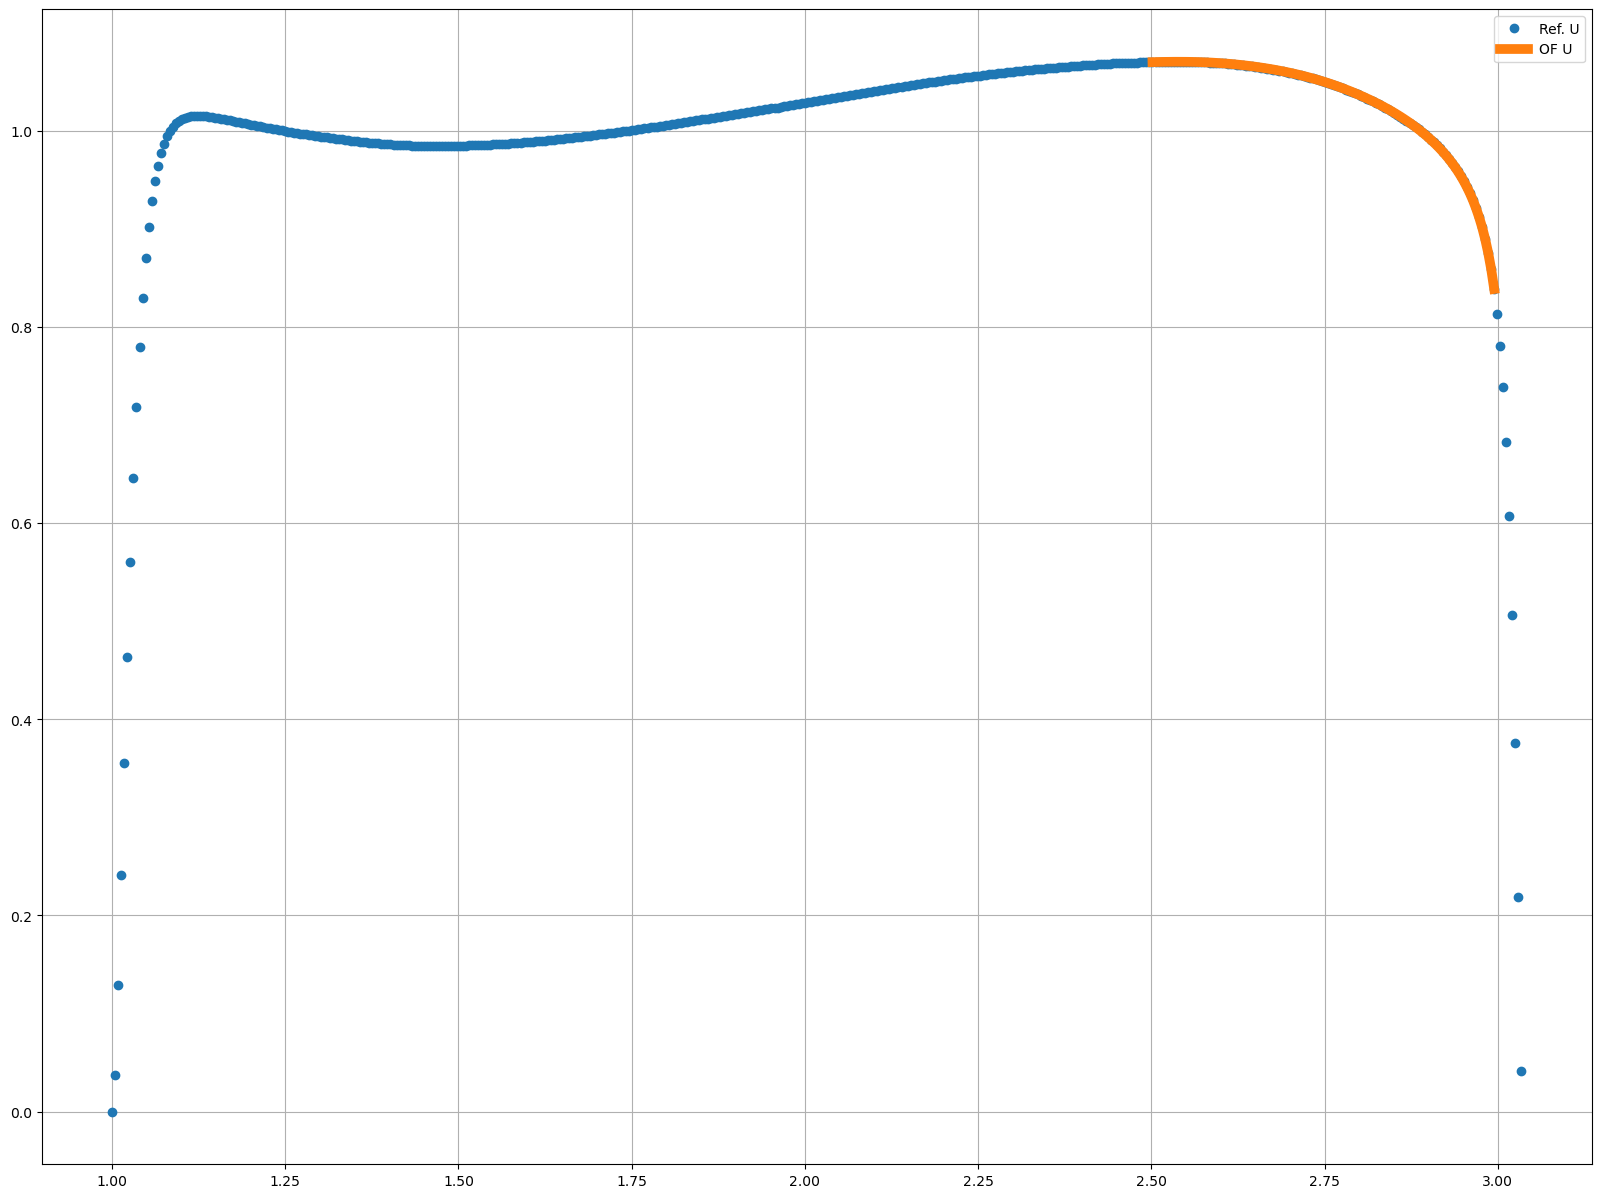

cluster2/cluster2_x0.05_U.xy
(0,)
empty profile
cluster3/cluster3_x0.05_U.xy
(16, 6)


/tmp/ipykernel_10031/2050972624.py:26: UserWarning: loadtxt: input contained no data: "cluster2/cluster2_x0.05_U.xy"
  OF = np.loadtxt(solOF)


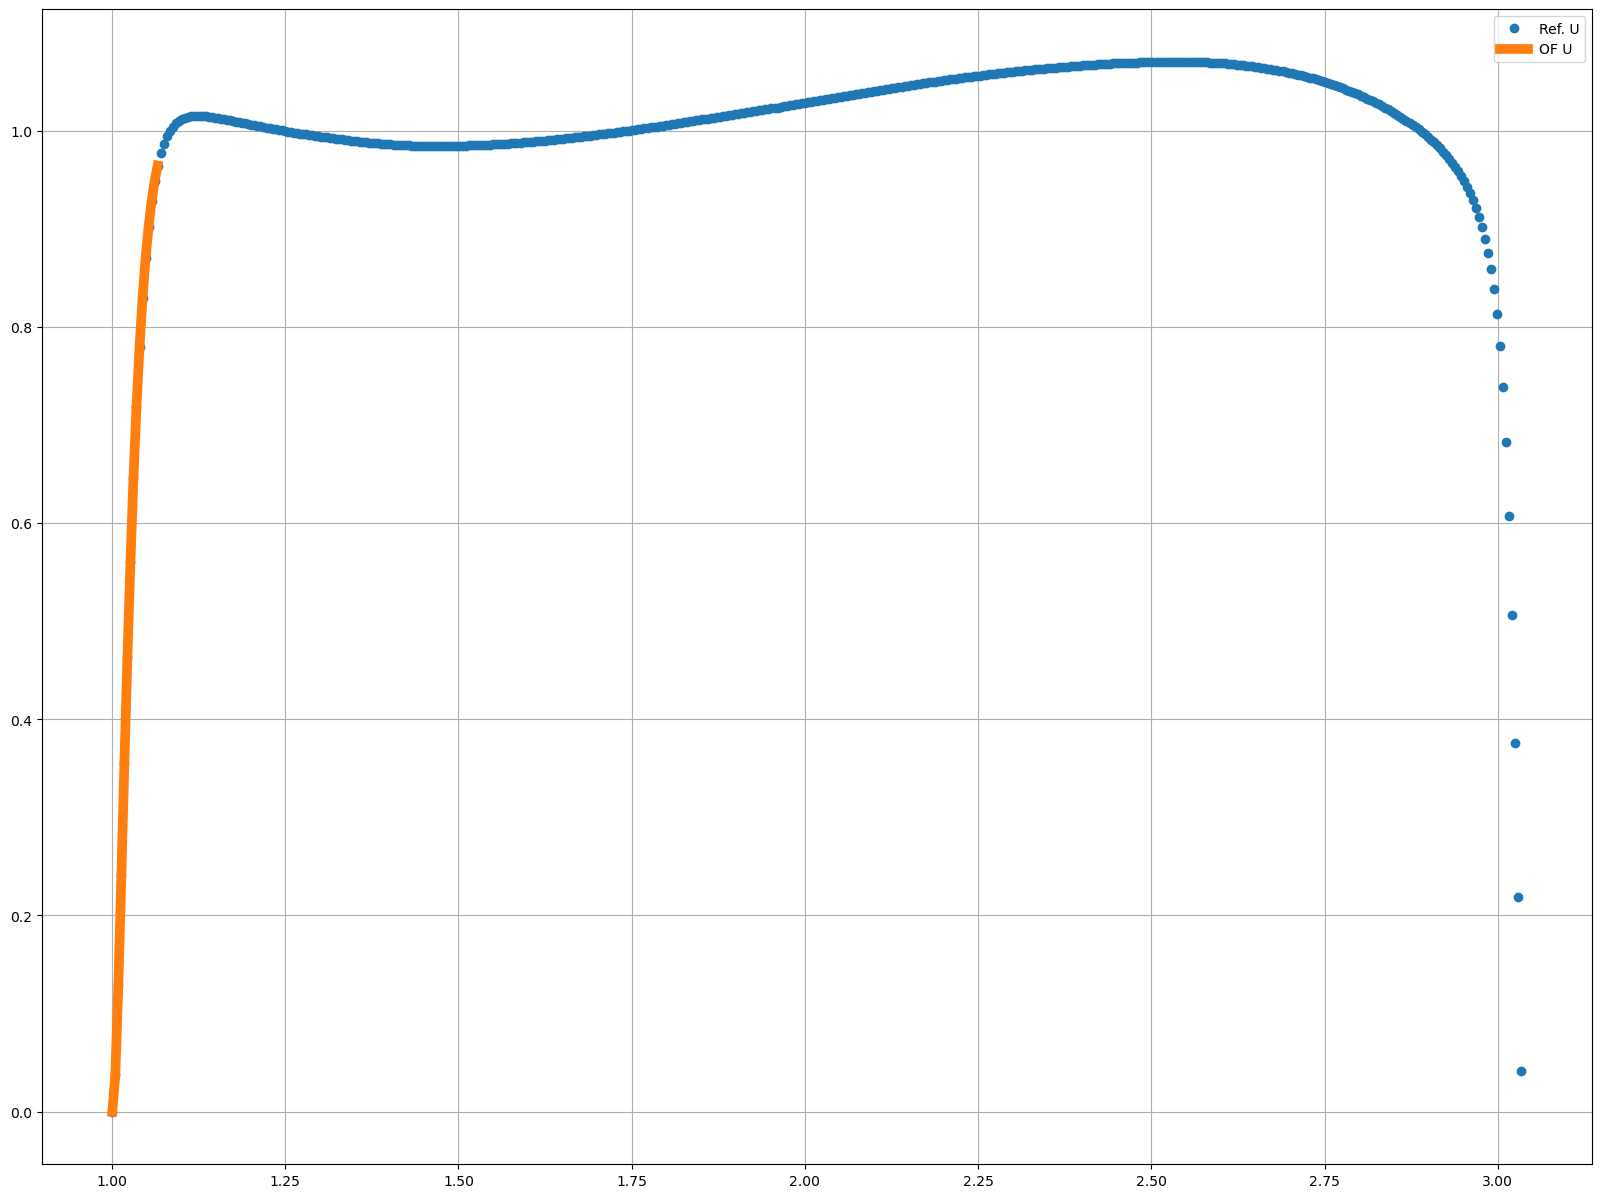

cluster4/cluster4_x0.05_U.xy
(9, 6)


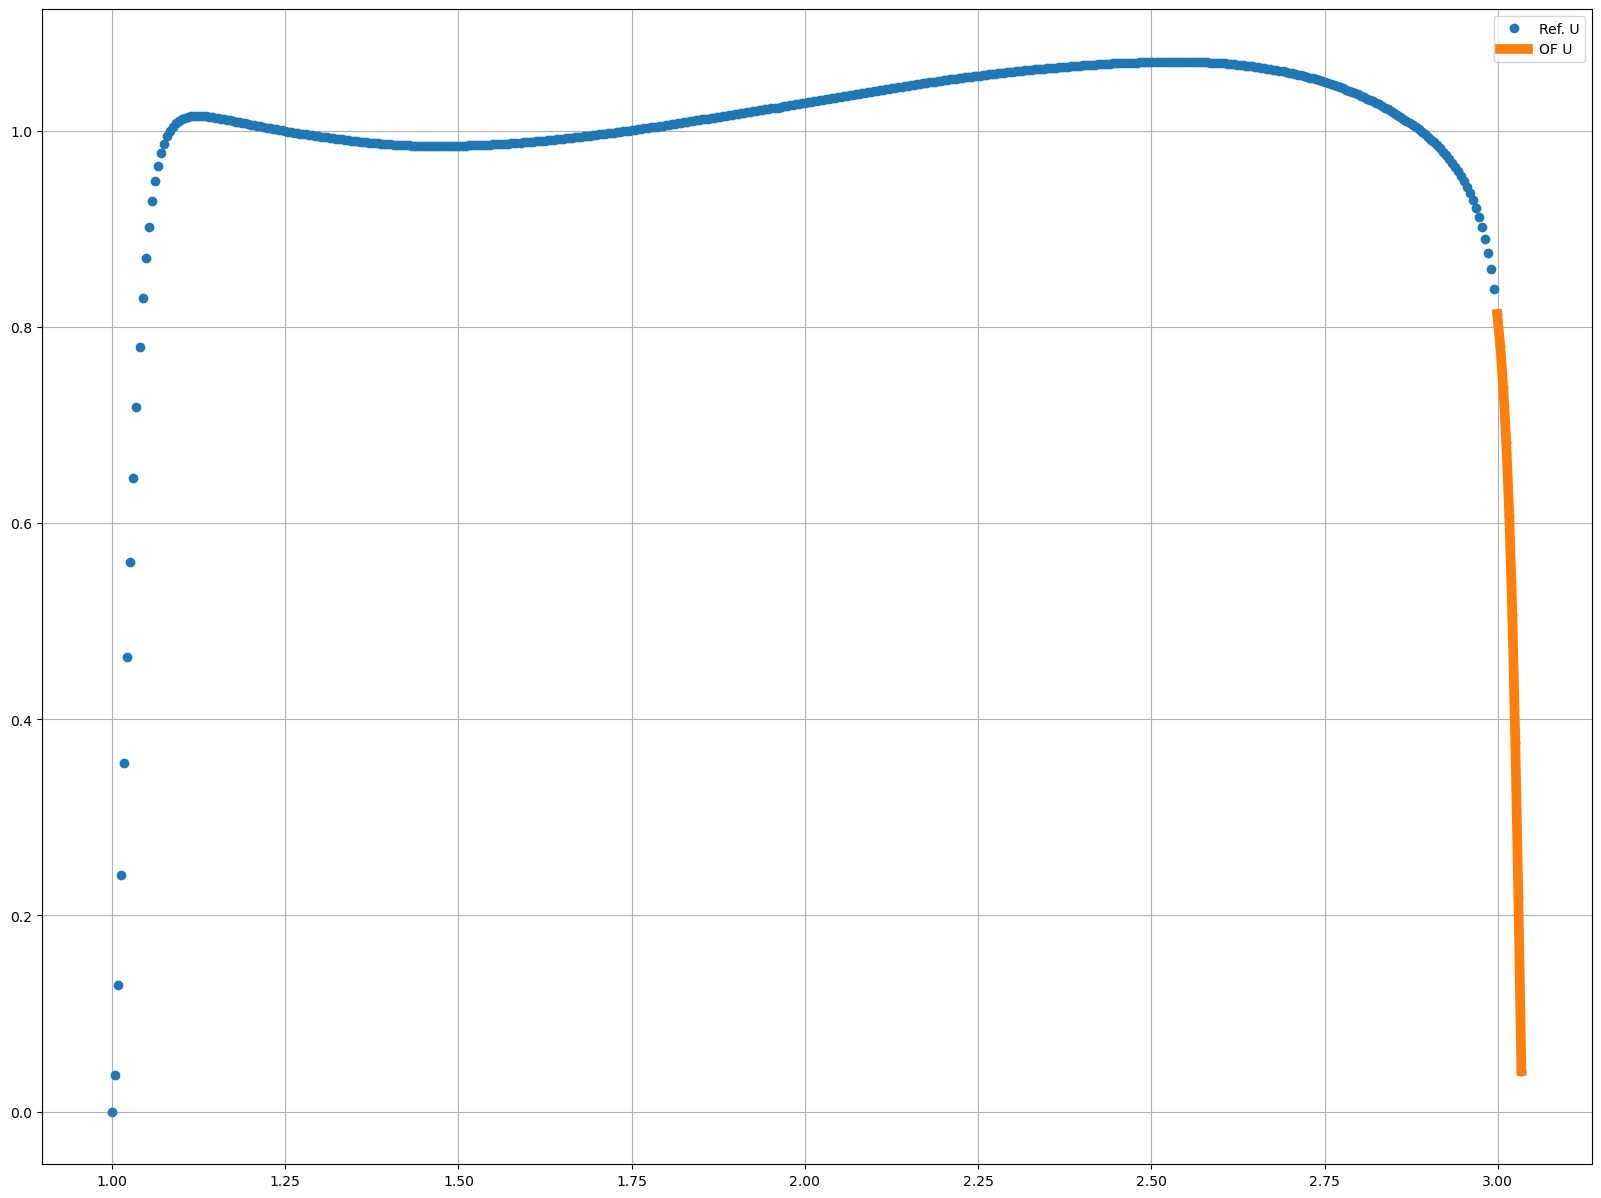

cluster0/cluster0_x0.5_U.xy
(290, 6)


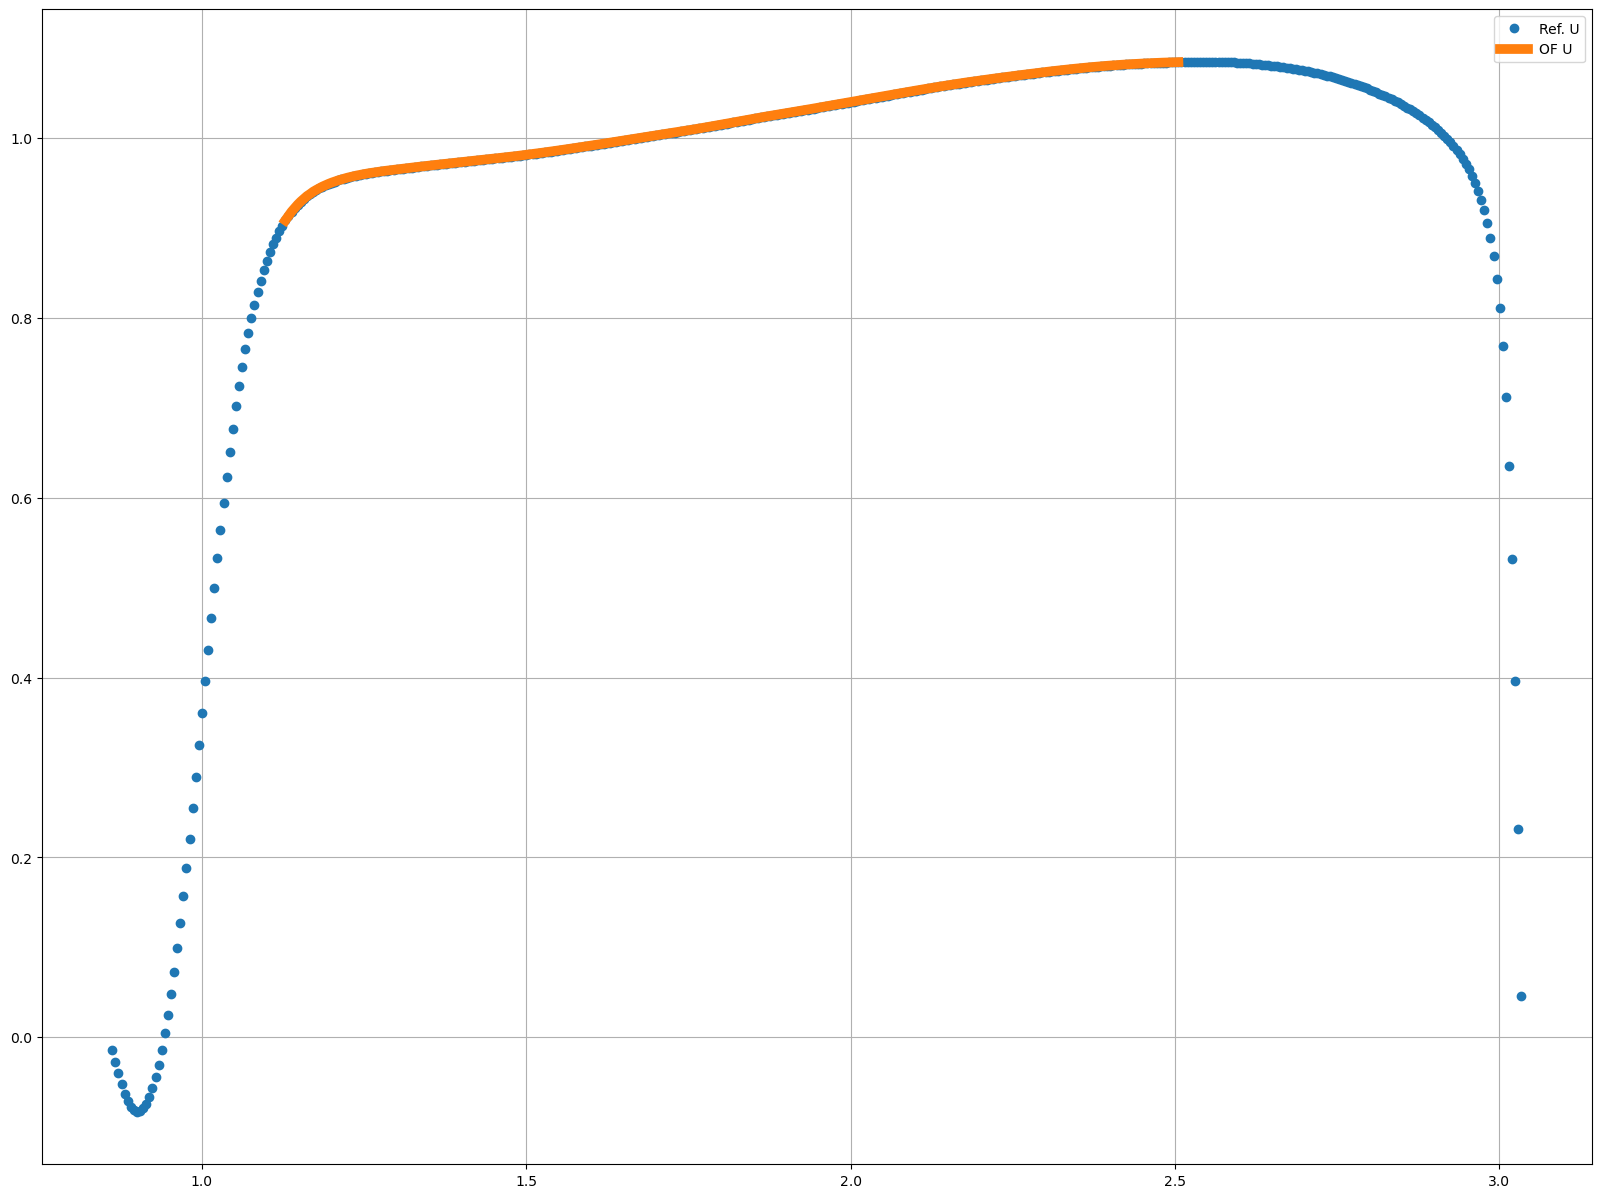

cluster1/cluster1_x0.5_U.xy
(102, 6)


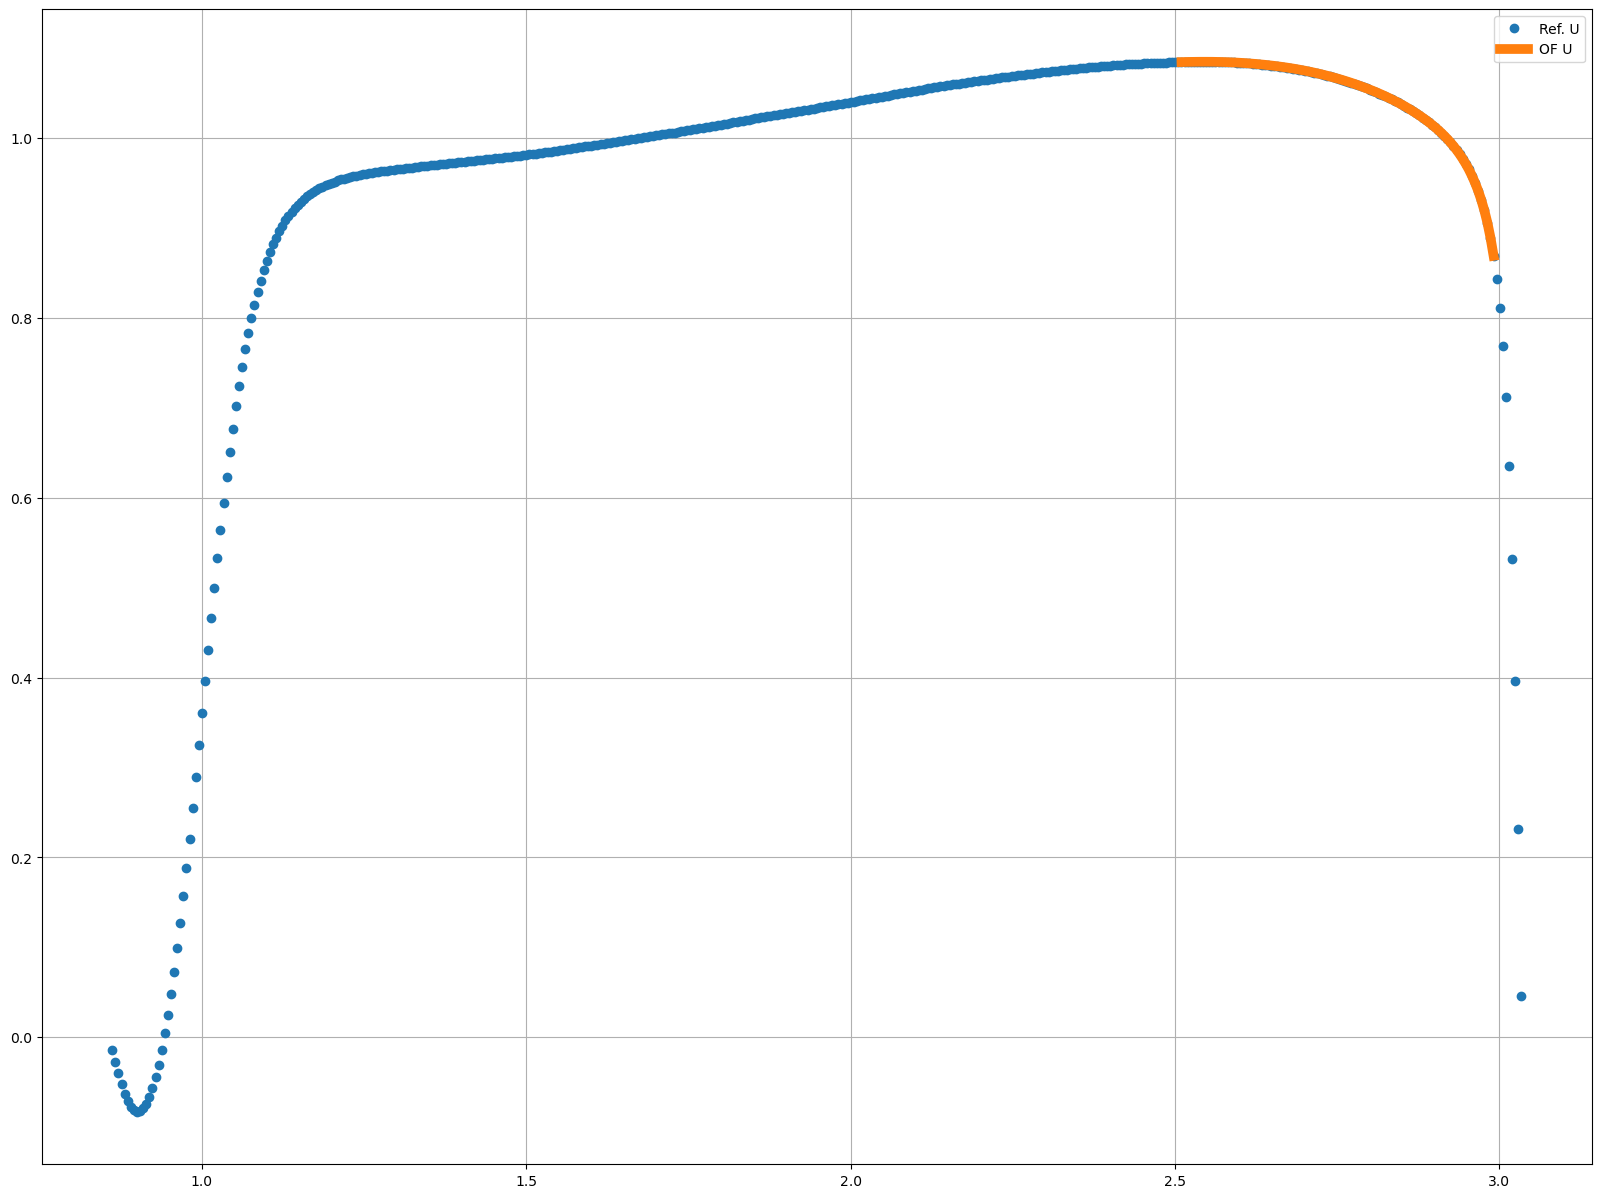

cluster2/cluster2_x0.5_U.xy
(0,)
empty profile
cluster3/cluster3_x0.5_U.xy
(56, 6)


/tmp/ipykernel_10031/2050972624.py:26: UserWarning: loadtxt: input contained no data: "cluster2/cluster2_x0.5_U.xy"
  OF = np.loadtxt(solOF)


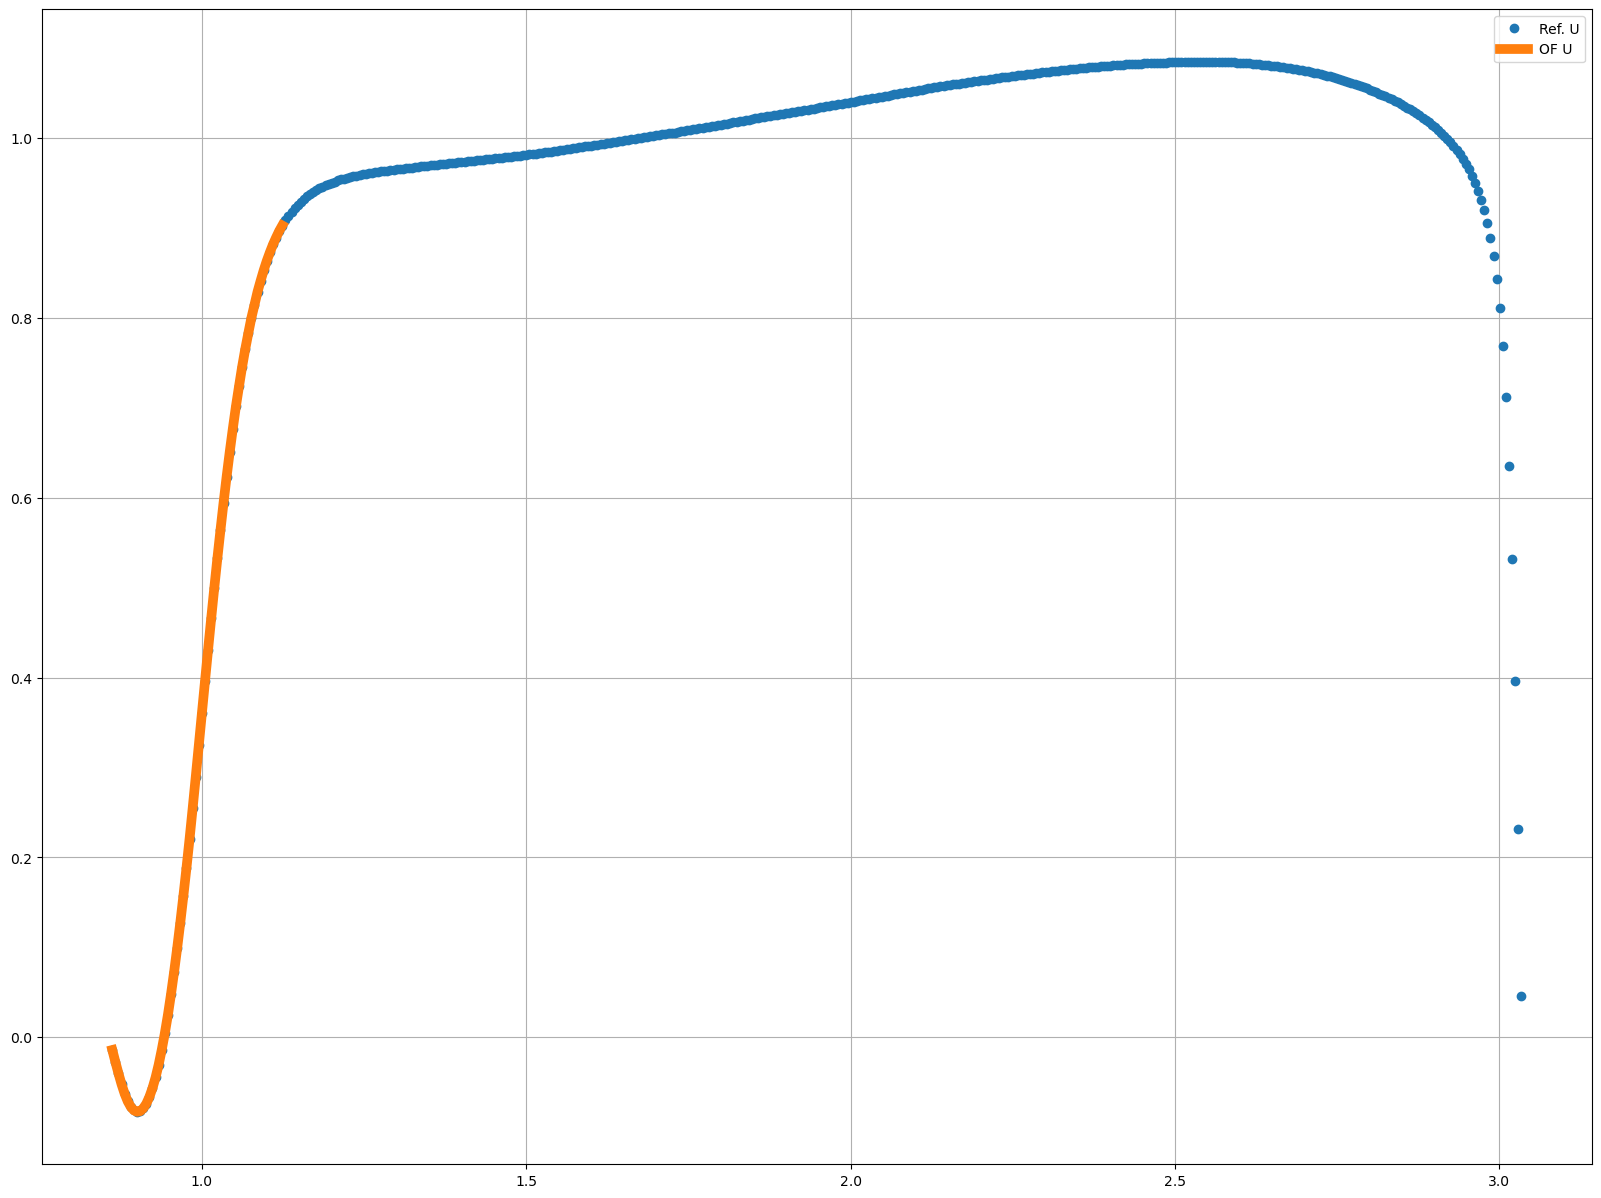

cluster4/cluster4_x0.5_U.xy
(9, 6)


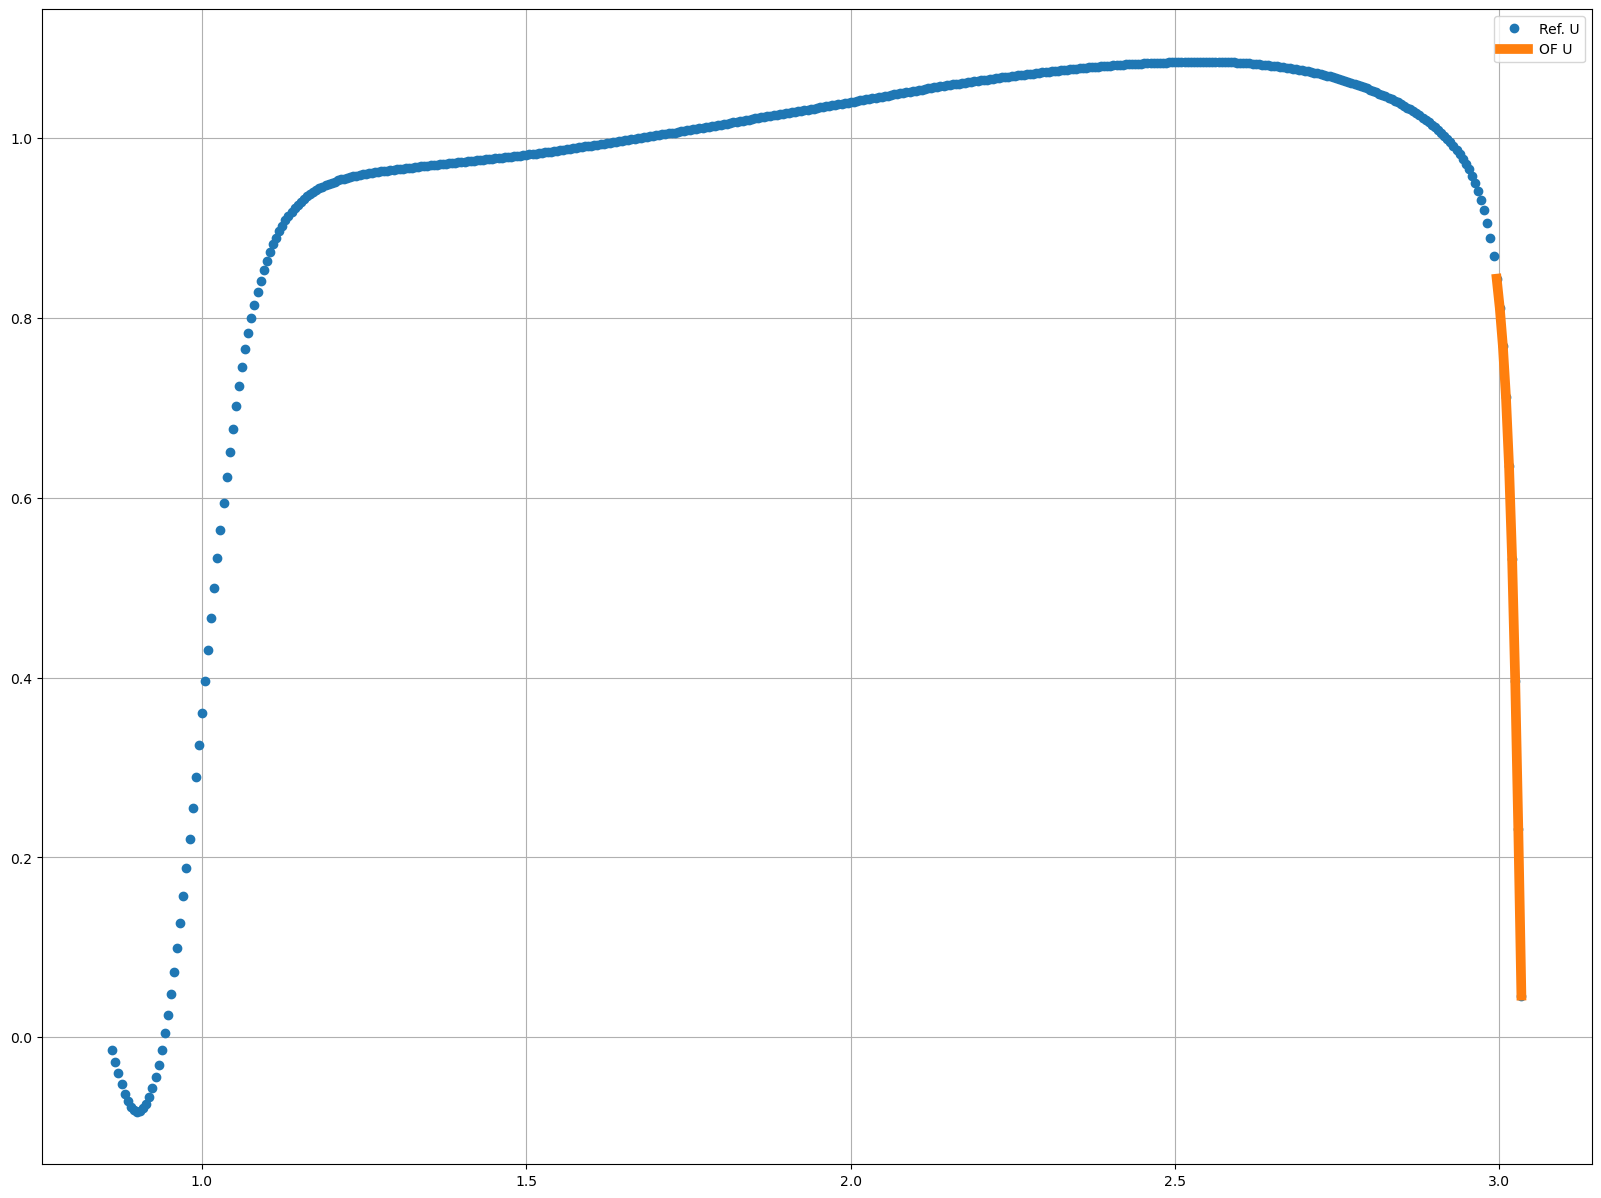

cluster0/cluster0_x1.0_U.xy
(215, 6)


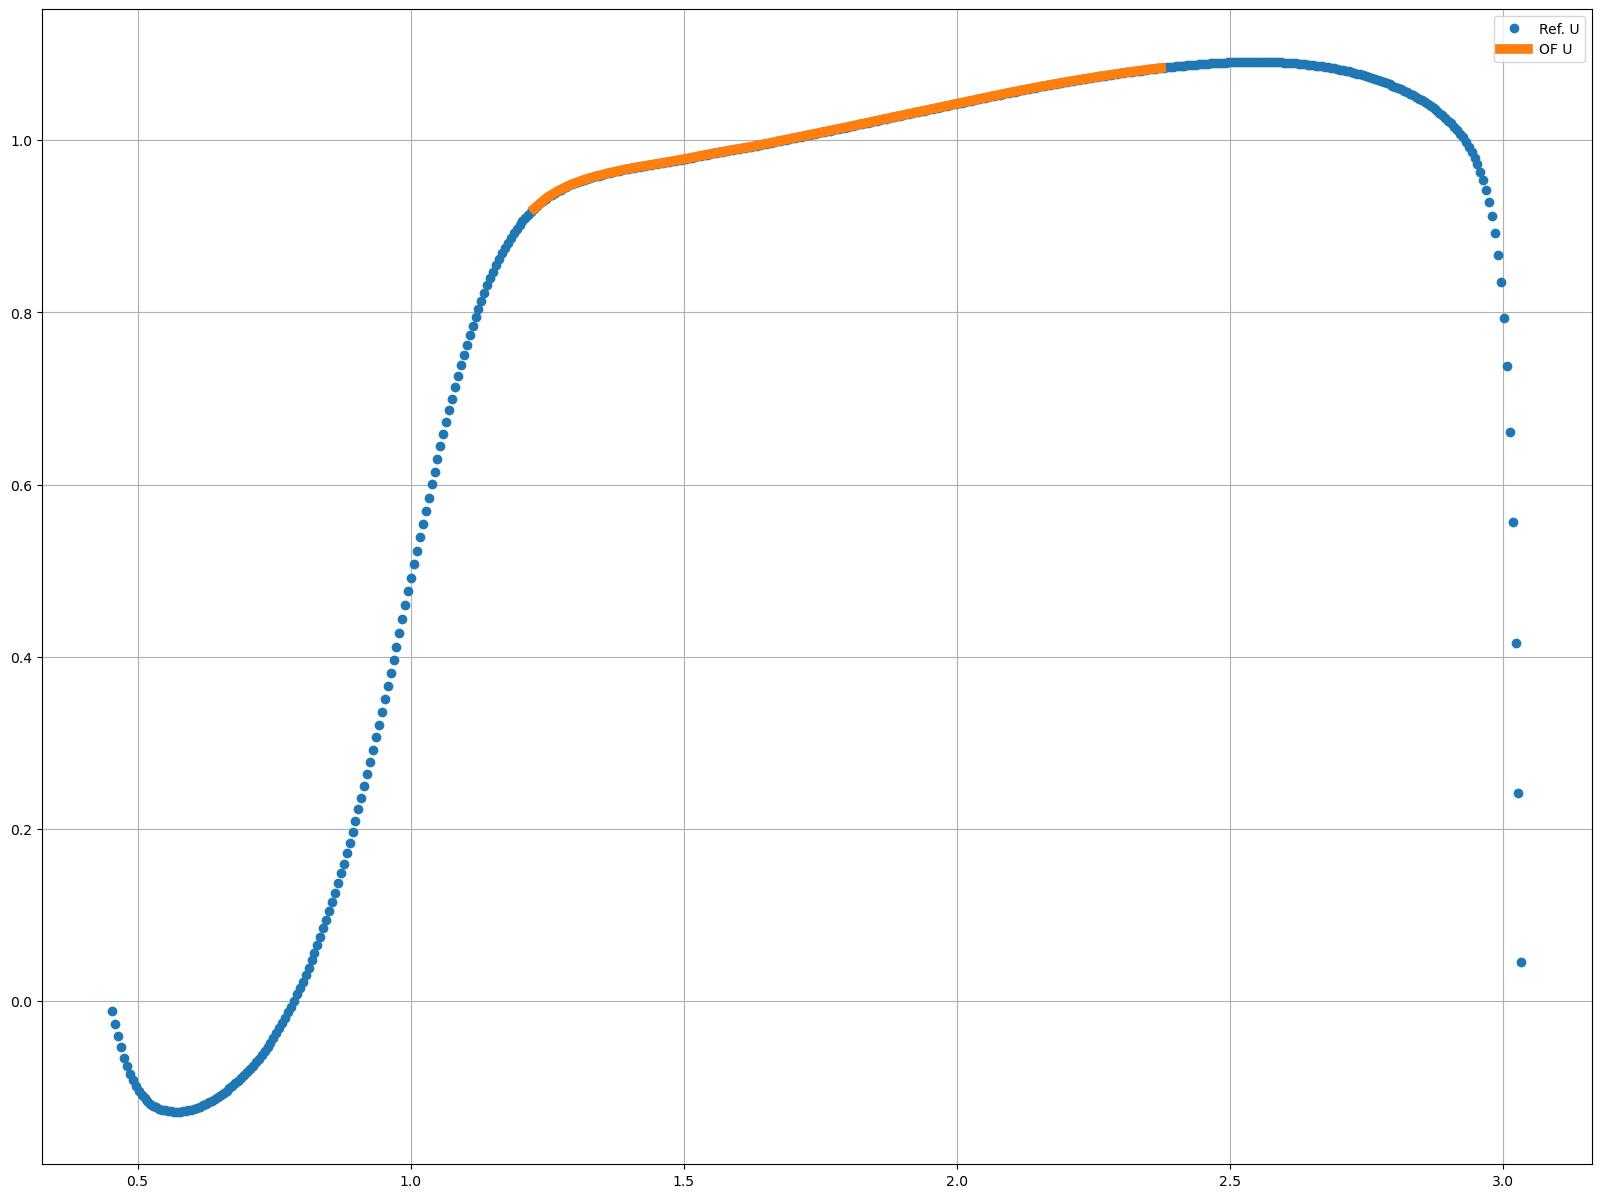

cluster1/cluster1_x1.0_U.xy
(114, 6)


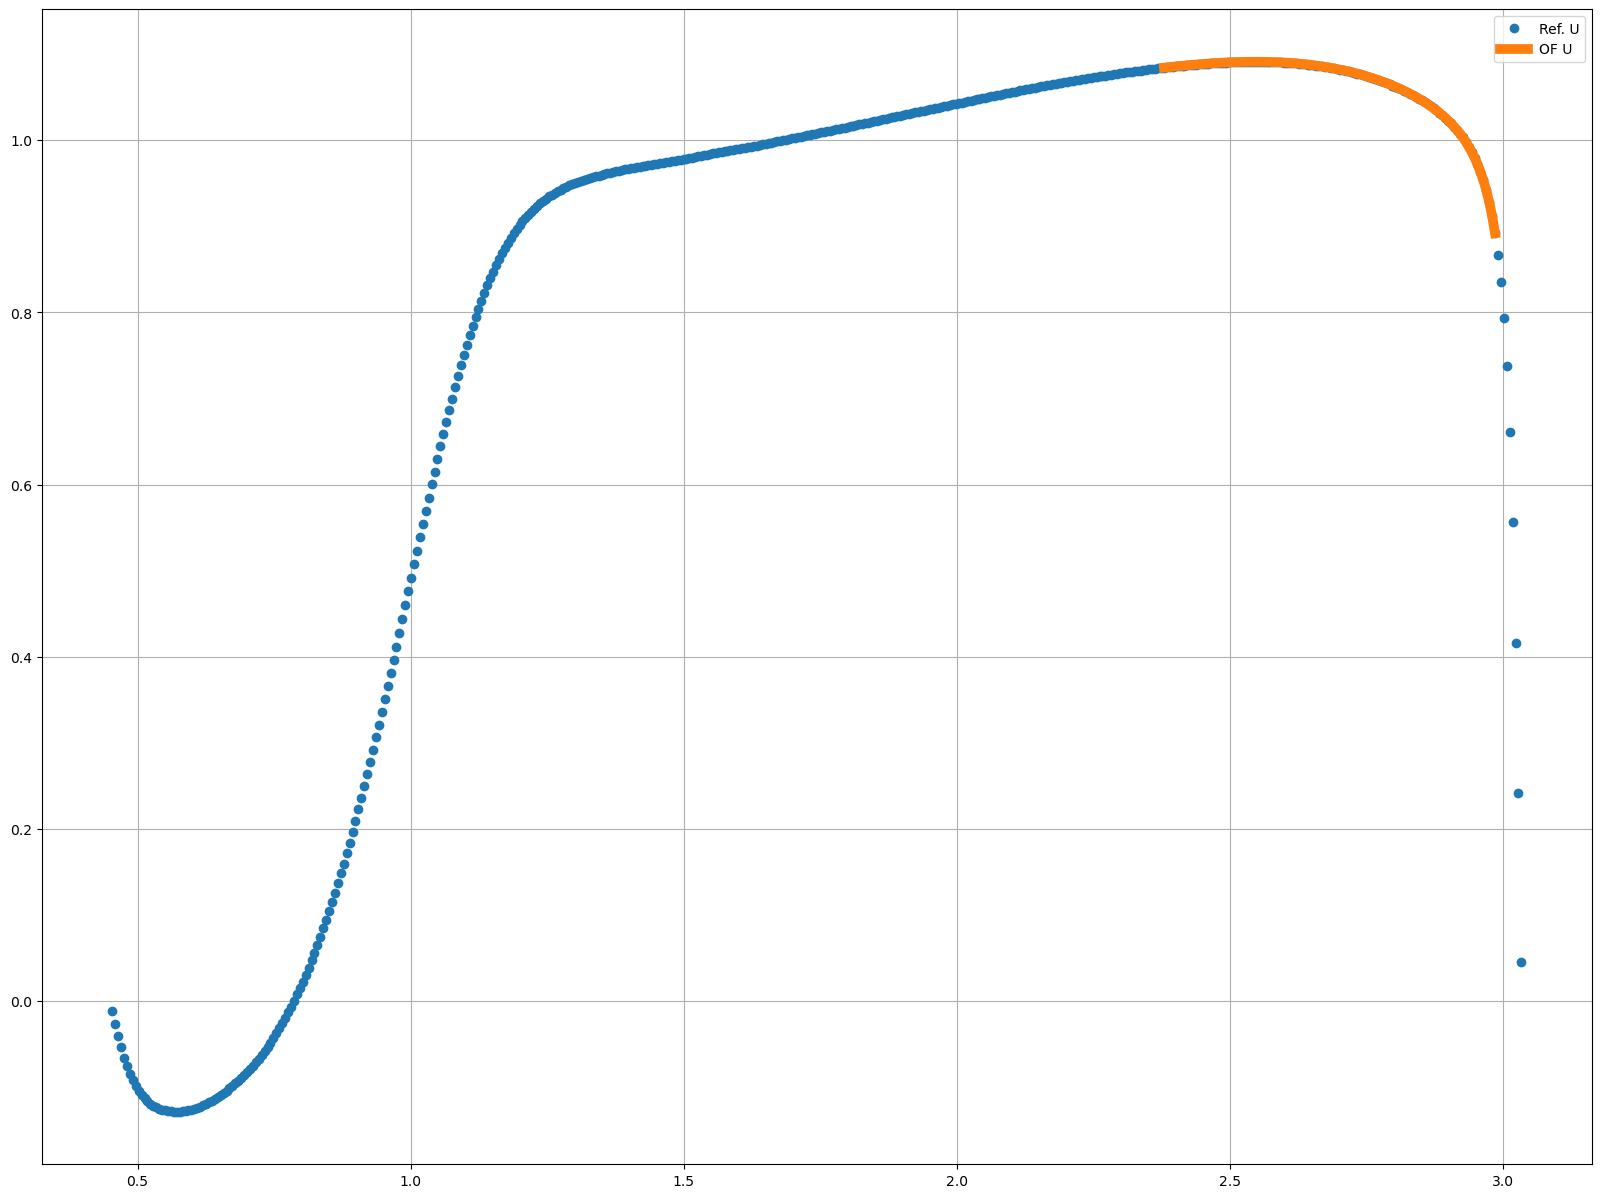

cluster2/cluster2_x1.0_U.xy
(0,)
empty profile
cluster3/cluster3_x1.0_U.xy
(144, 6)


/tmp/ipykernel_10031/2050972624.py:26: UserWarning: loadtxt: input contained no data: "cluster2/cluster2_x1.0_U.xy"
  OF = np.loadtxt(solOF)


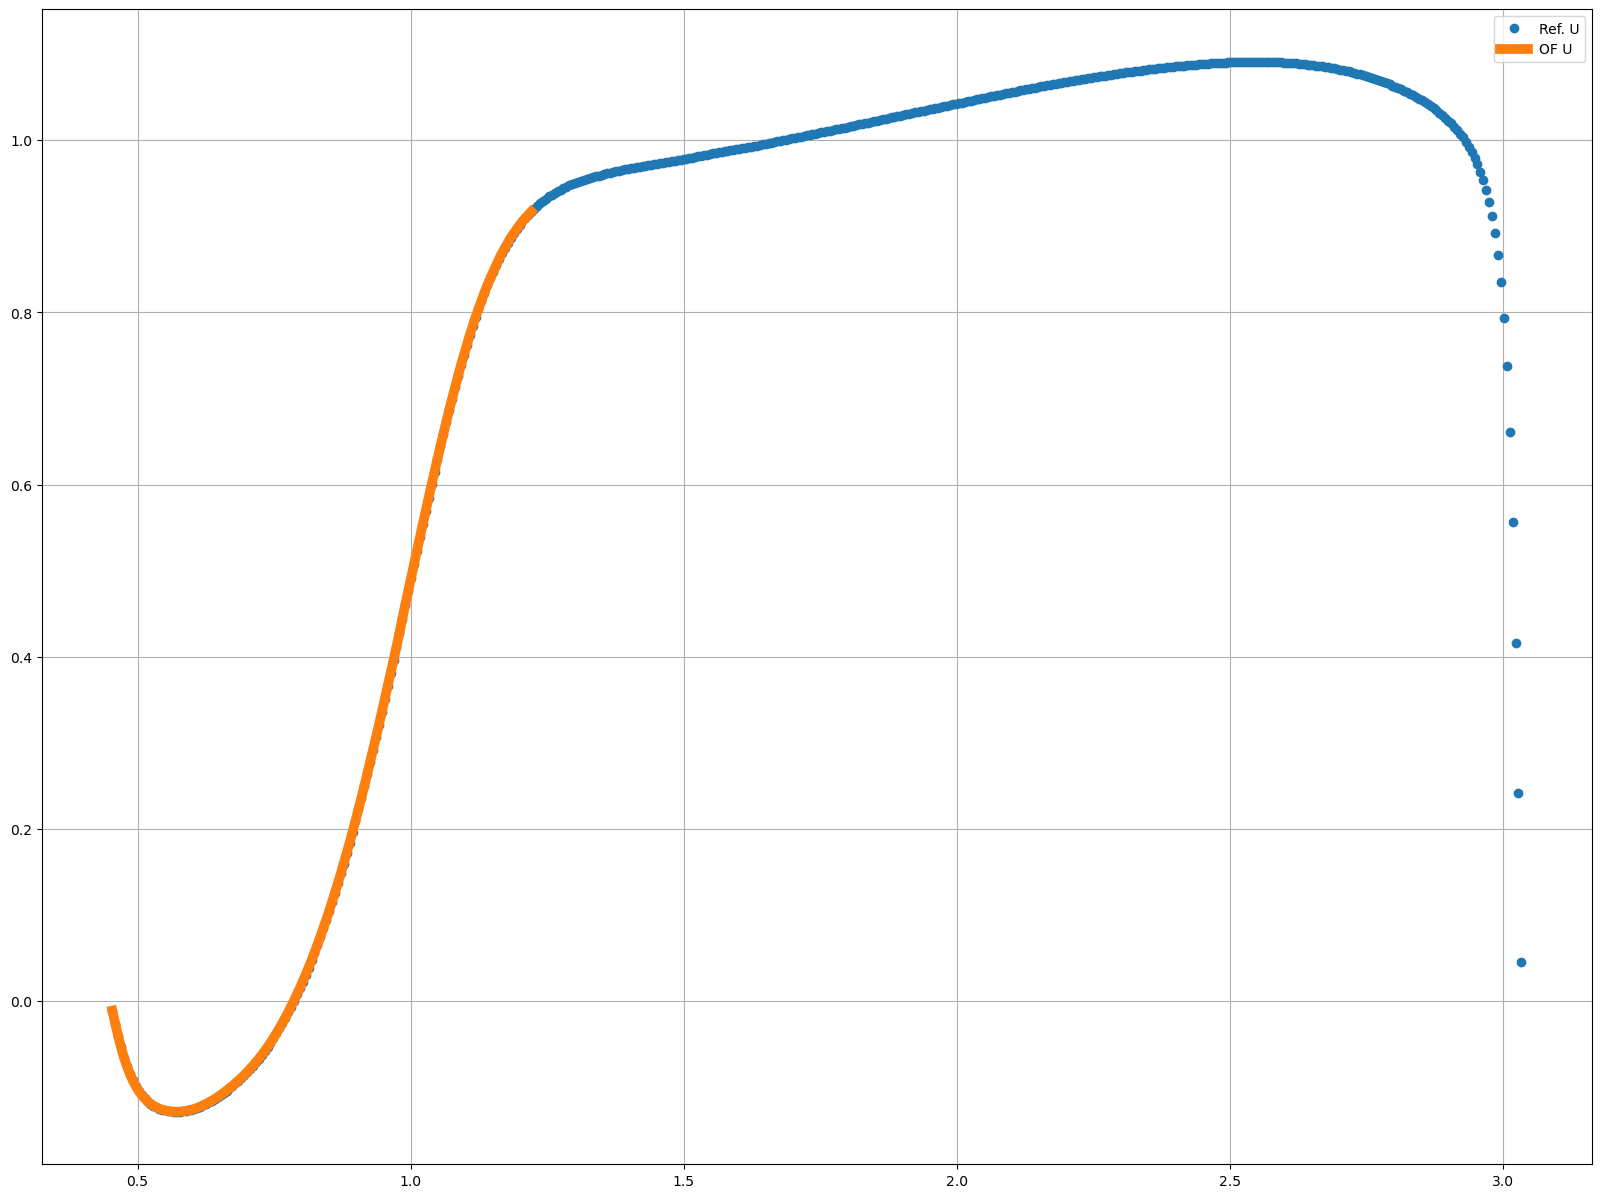

cluster4/cluster4_x1.0_U.xy
(9, 6)


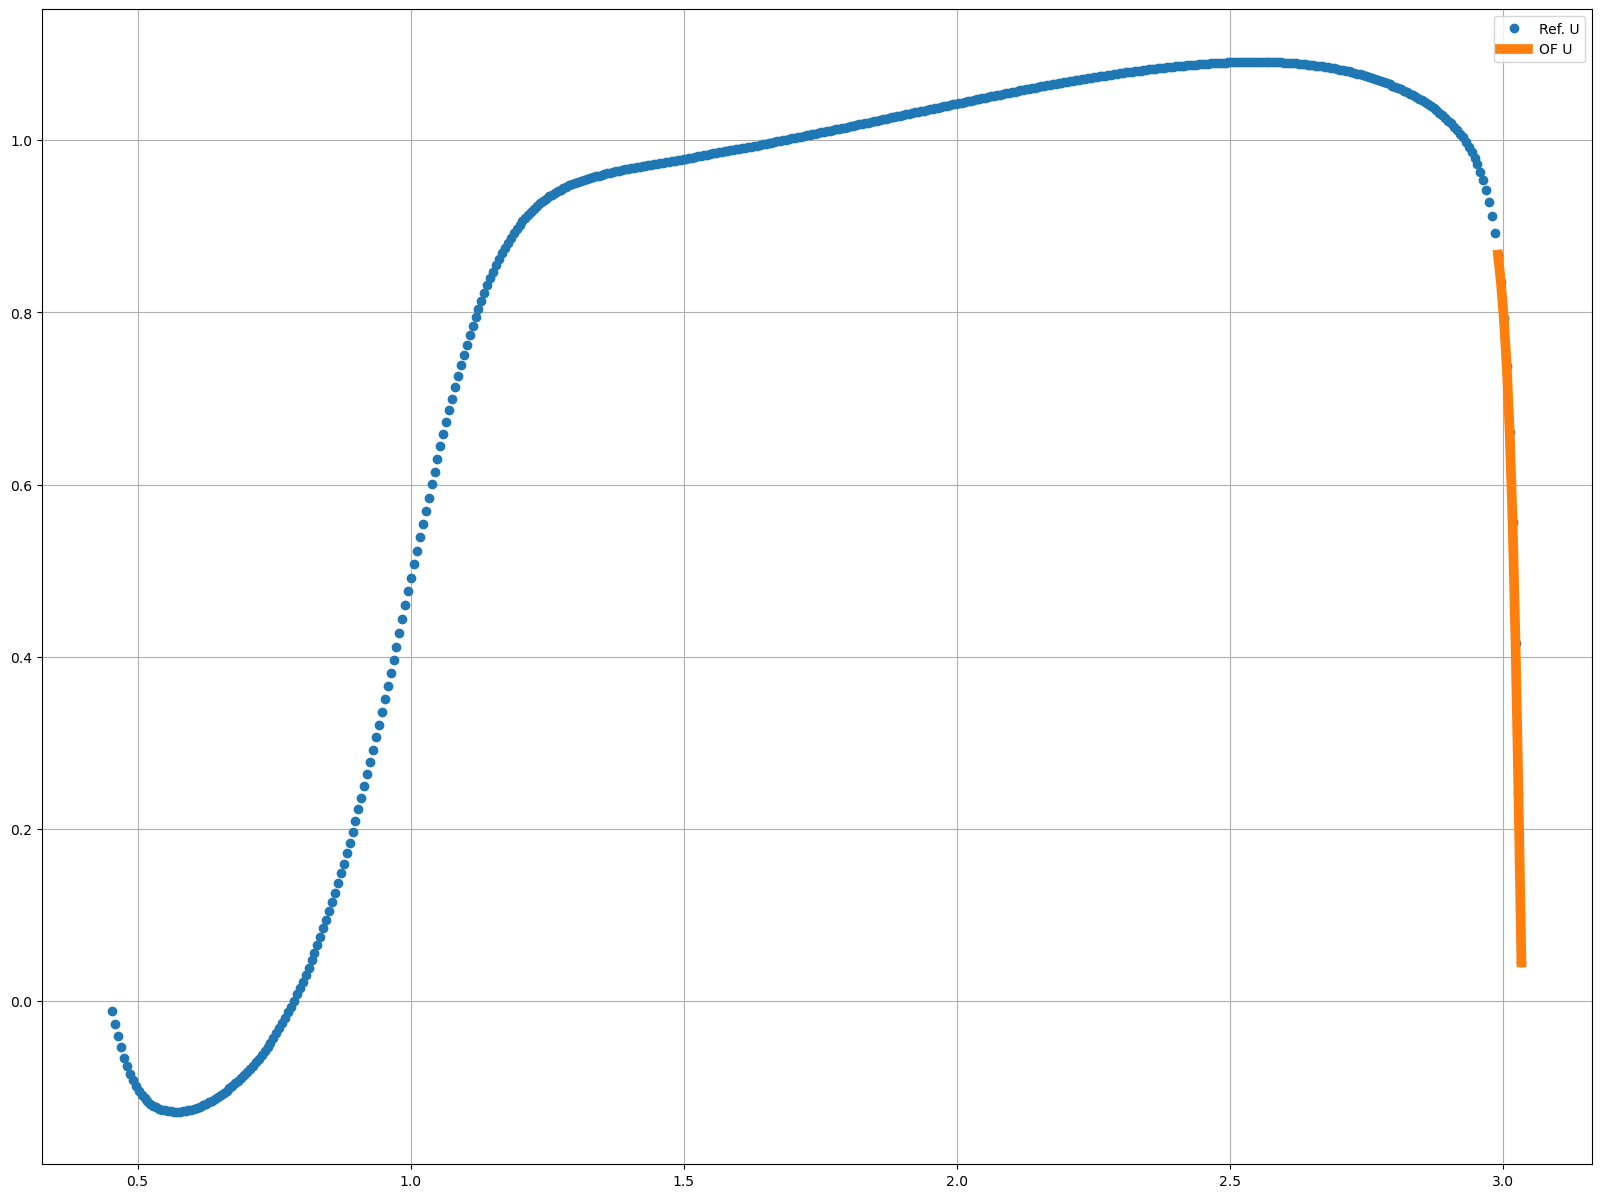

cluster0/cluster0_x2.0_U.xy
(18, 6)


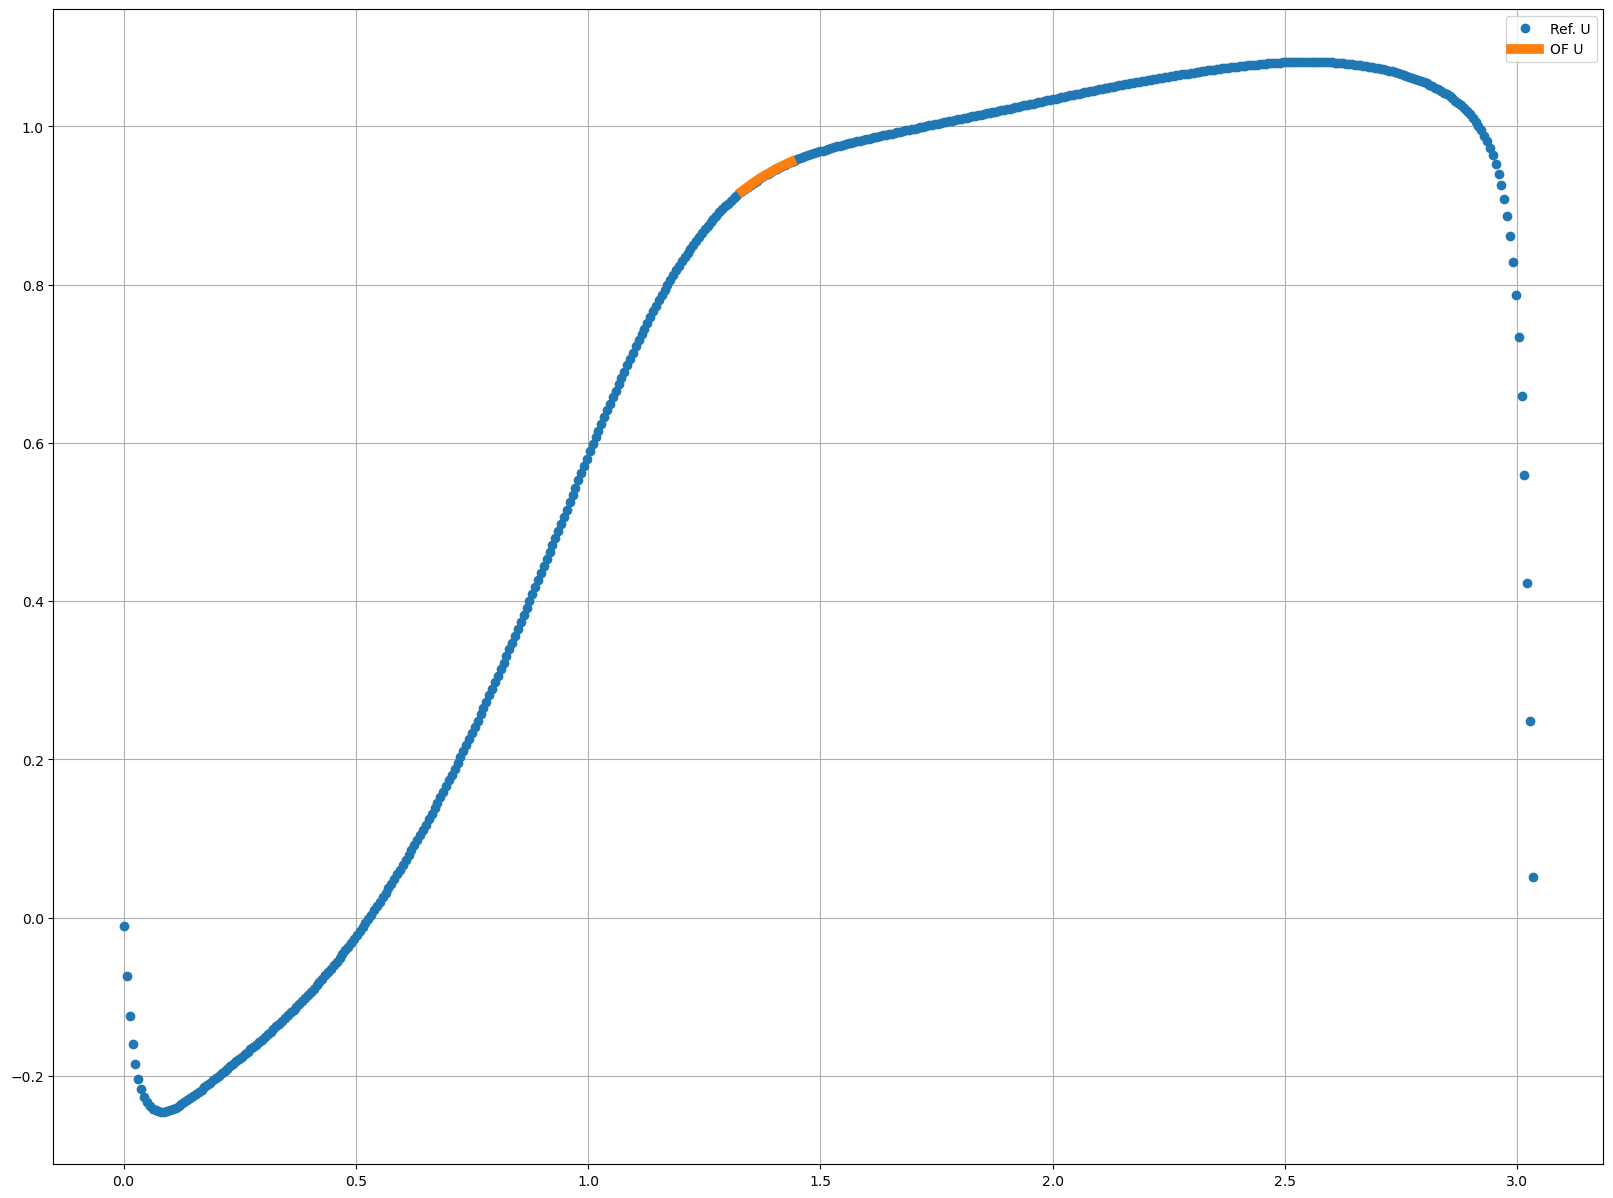

cluster1/cluster1_x2.0_U.xy
(248, 6)


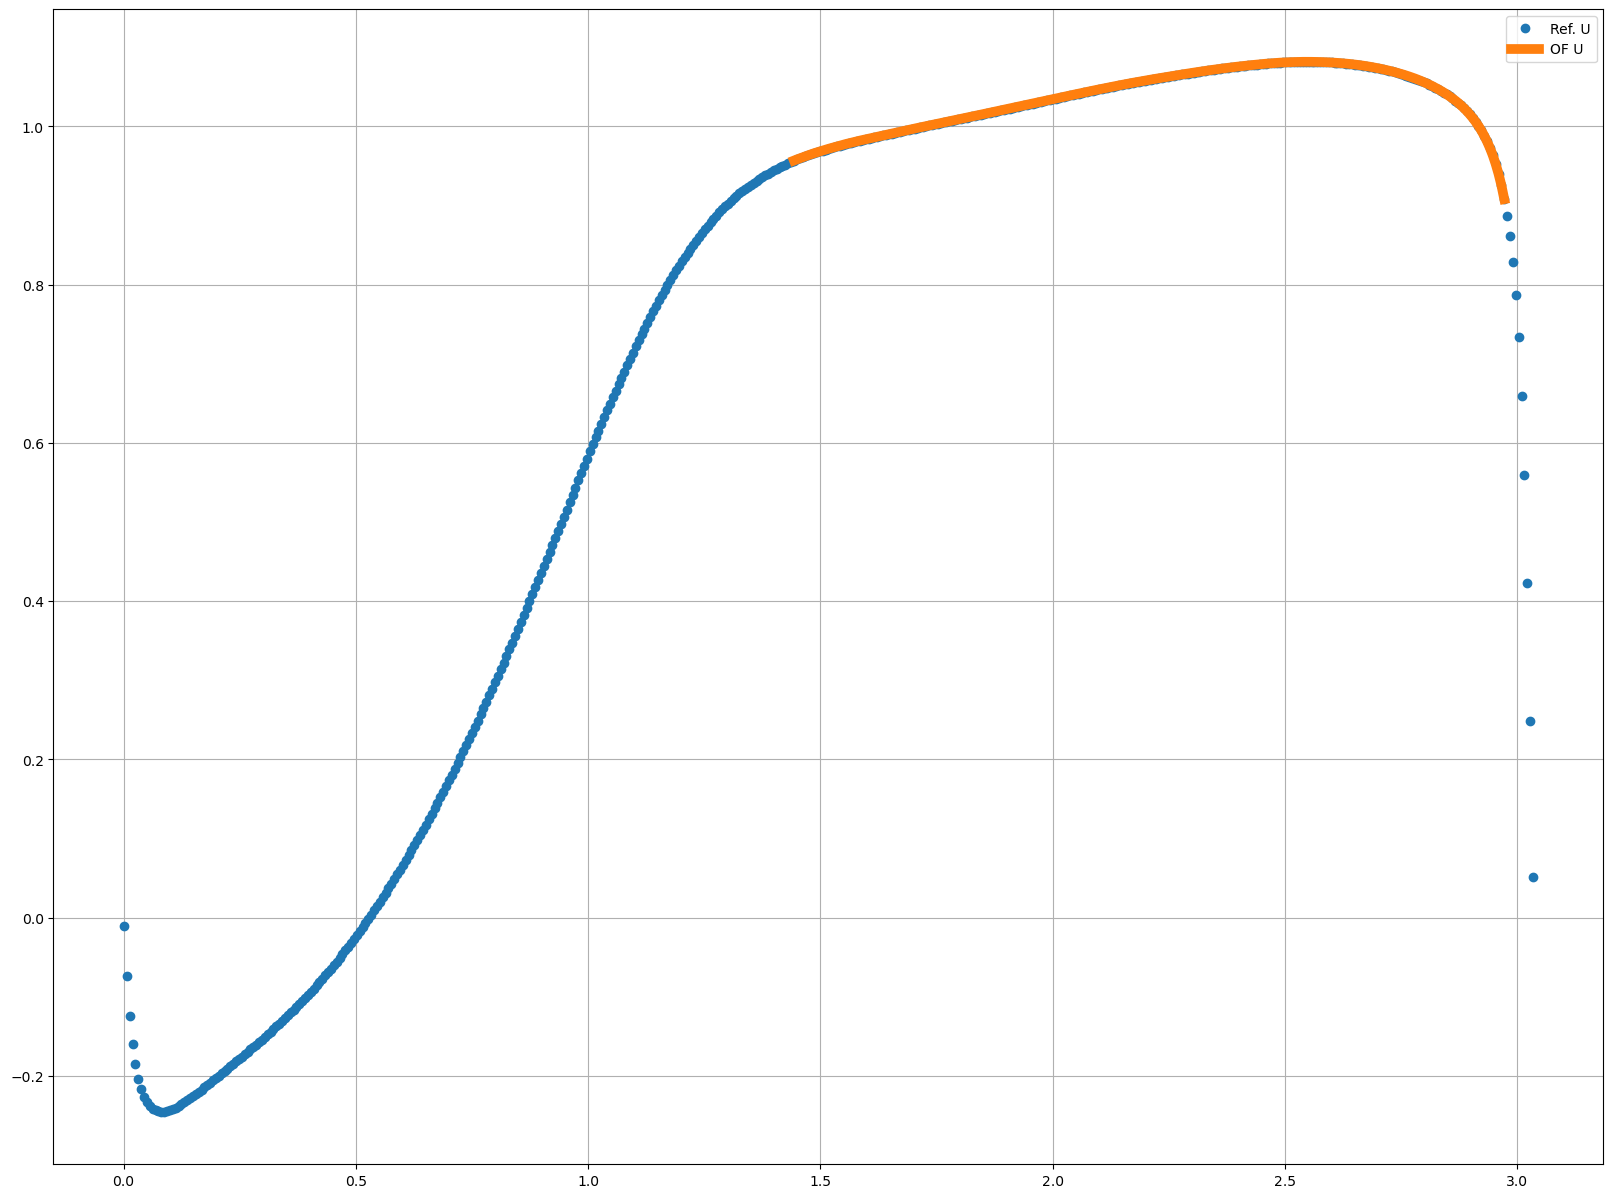

cluster2/cluster2_x2.0_U.xy
(0,)
empty profile
cluster3/cluster3_x2.0_U.xy
(215, 6)


/tmp/ipykernel_10031/2050972624.py:26: UserWarning: loadtxt: input contained no data: "cluster2/cluster2_x2.0_U.xy"
  OF = np.loadtxt(solOF)


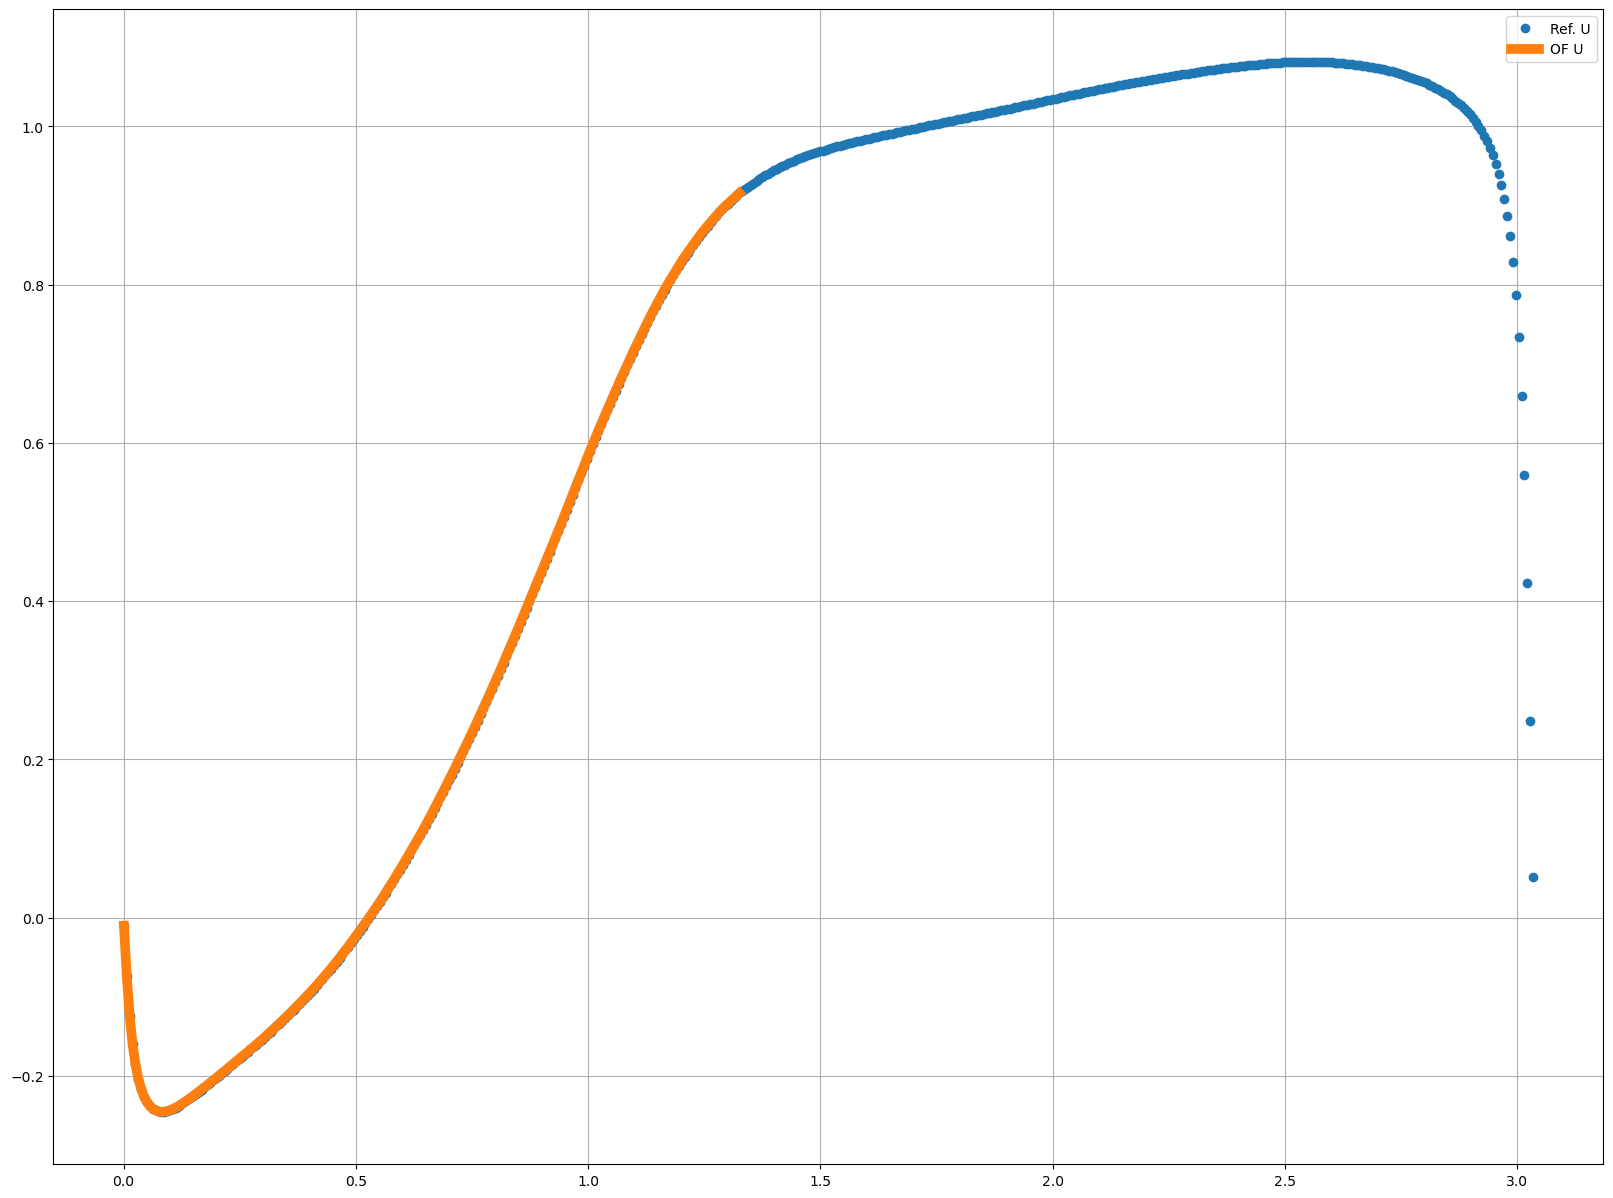

cluster4/cluster4_x2.0_U.xy
(10, 6)


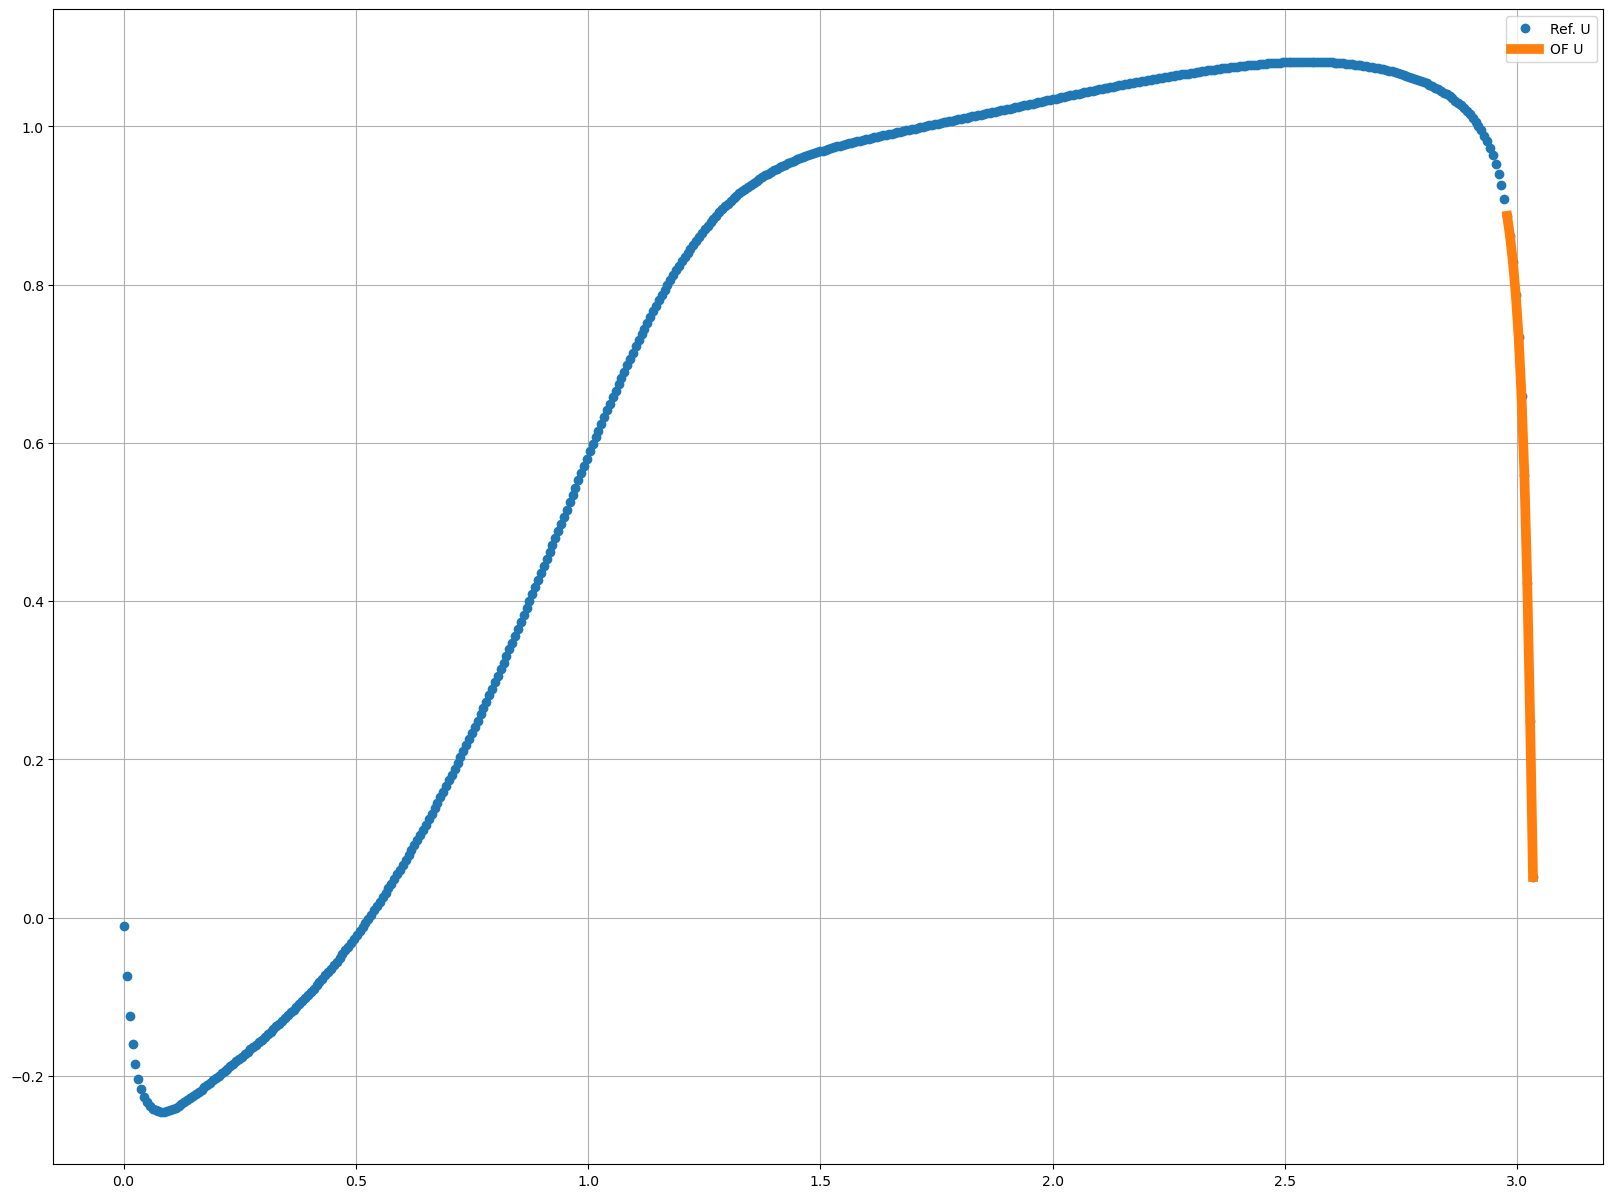

cluster0/cluster0_x3.0_U.xy
(0,)
empty profile
cluster1/cluster1_x3.0_U.xy
(252, 6)


/tmp/ipykernel_10031/2050972624.py:26: UserWarning: loadtxt: input contained no data: "cluster0/cluster0_x3.0_U.xy"
  OF = np.loadtxt(solOF)


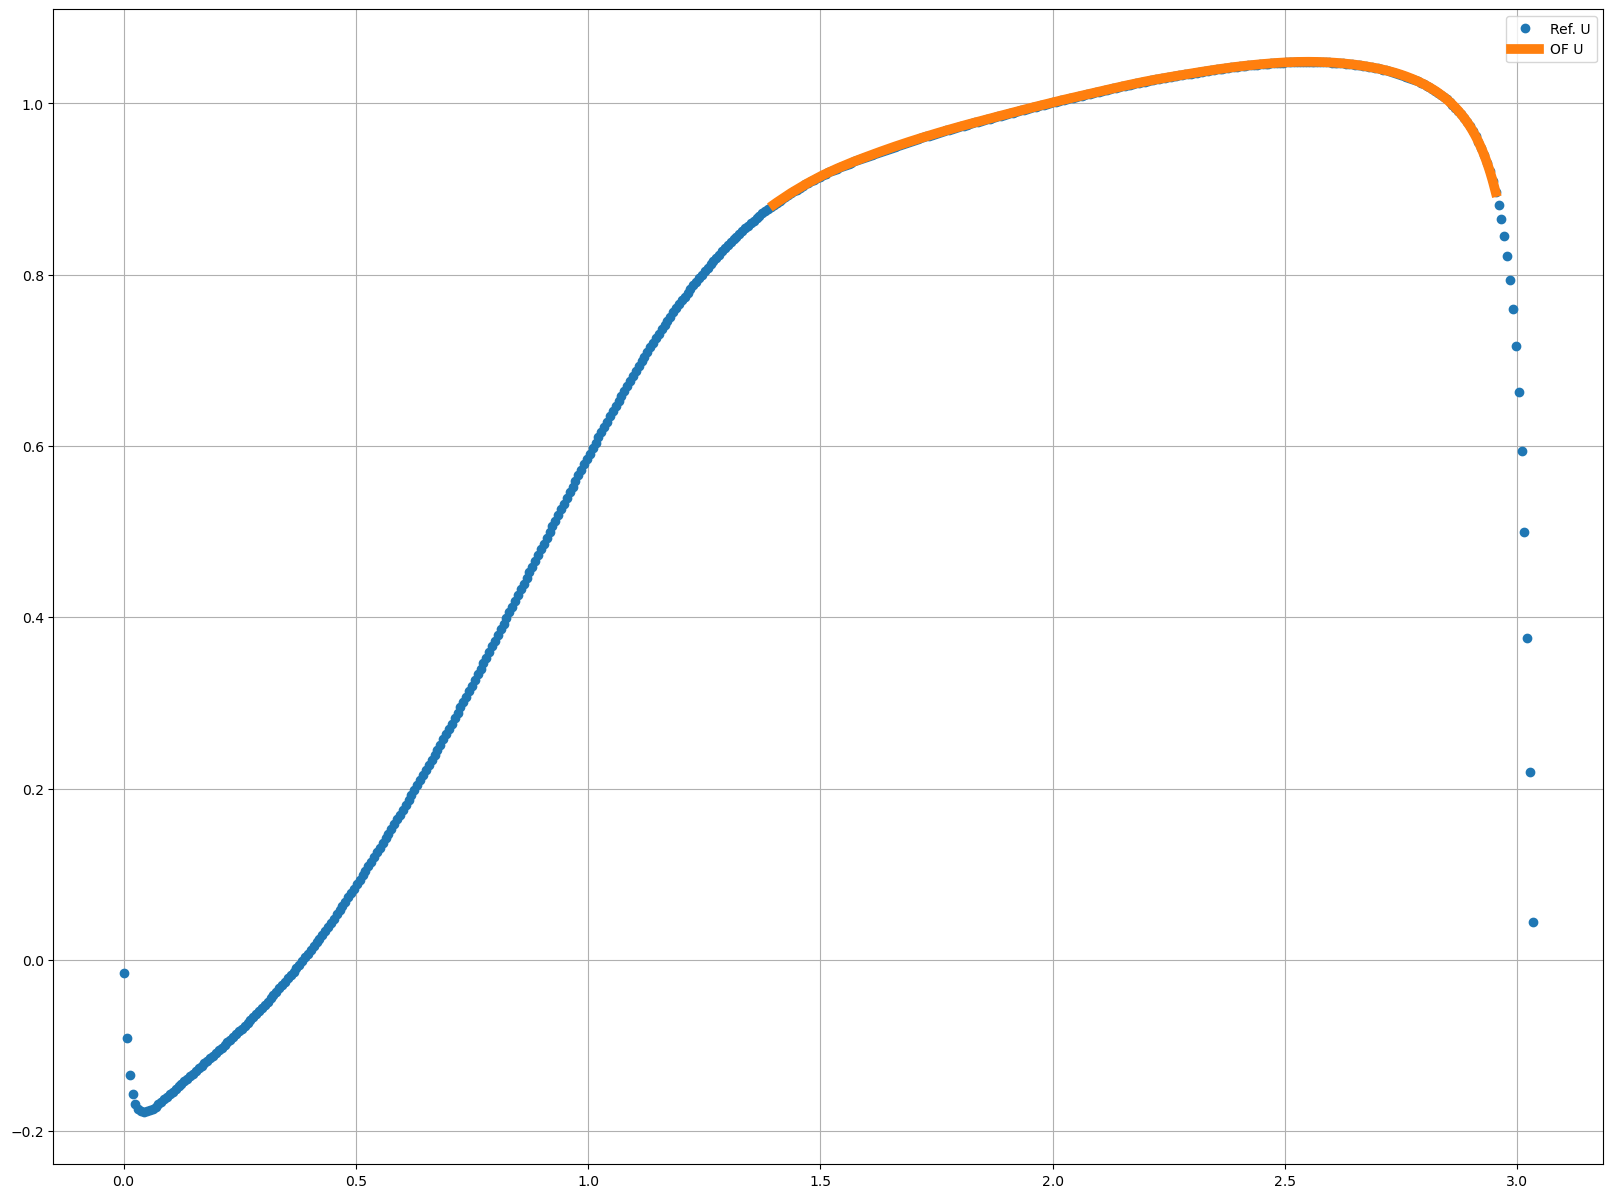

cluster2/cluster2_x3.0_U.xy
(0,)
empty profile
cluster3/cluster3_x3.0_U.xy
(226, 6)


/tmp/ipykernel_10031/2050972624.py:26: UserWarning: loadtxt: input contained no data: "cluster2/cluster2_x3.0_U.xy"
  OF = np.loadtxt(solOF)


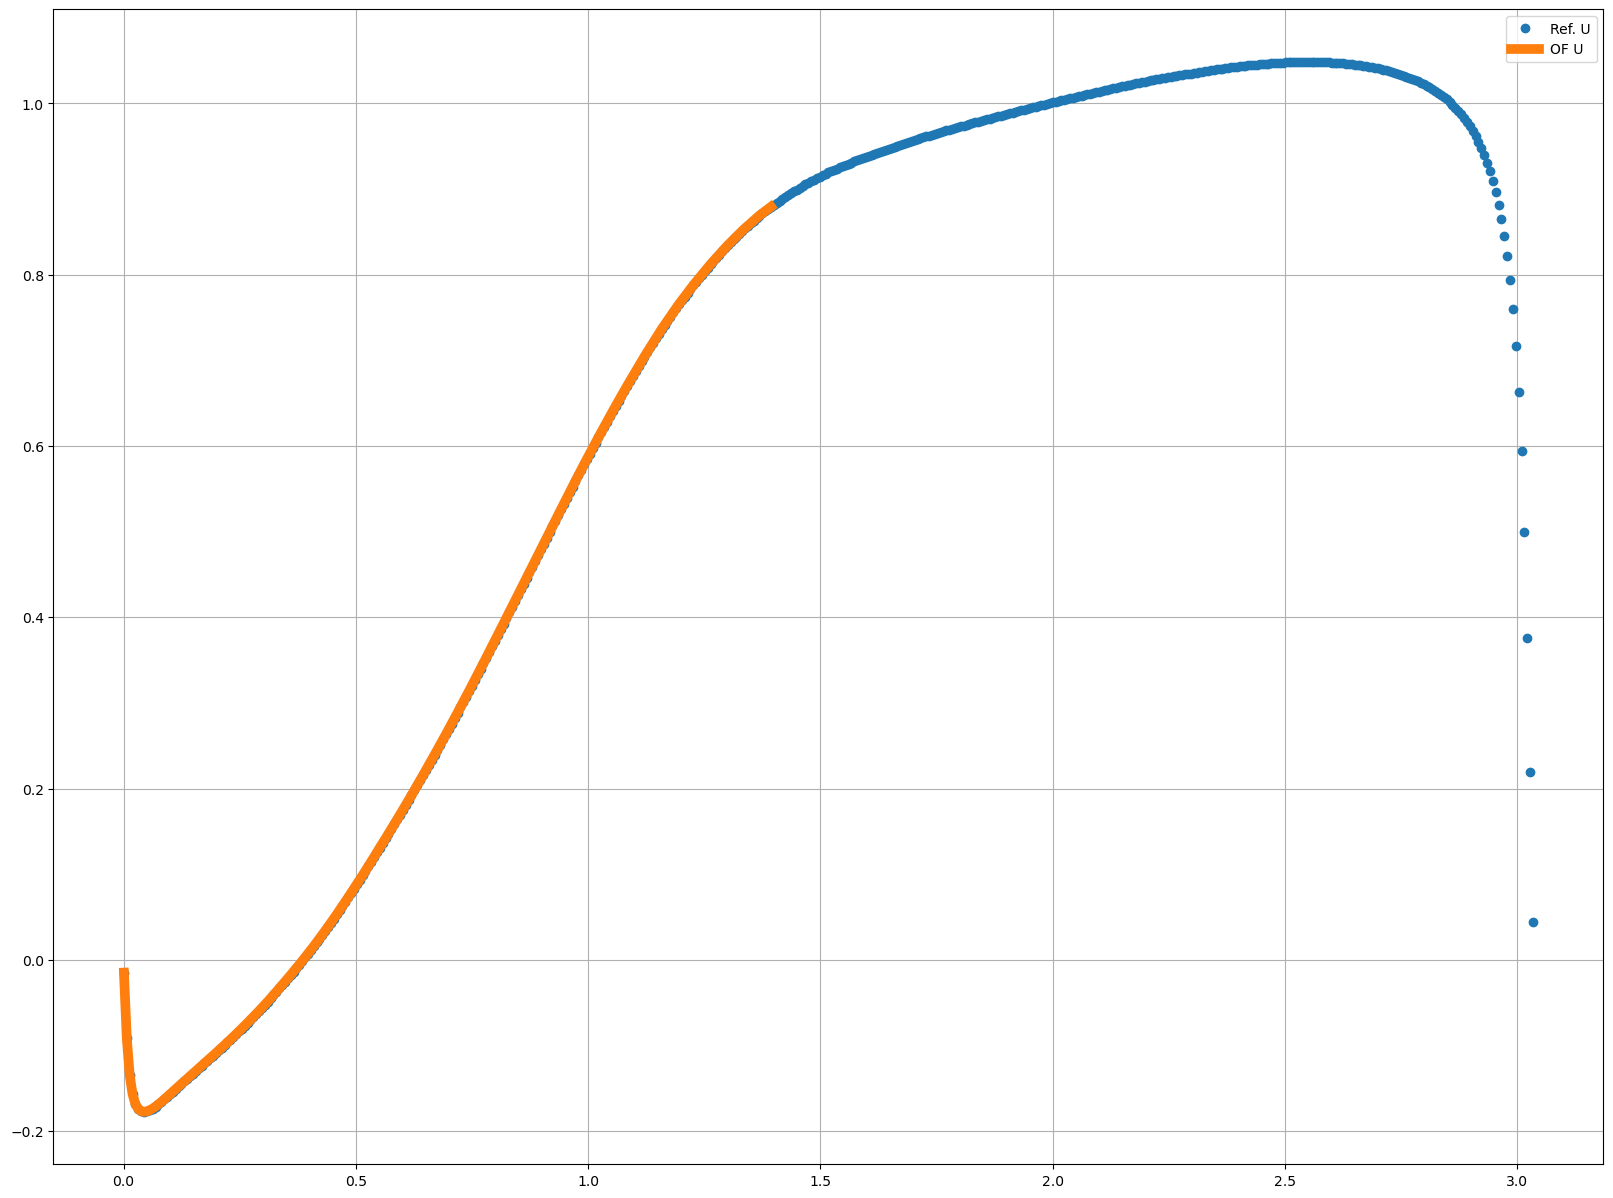

cluster4/cluster4_x3.0_U.xy
(13, 6)


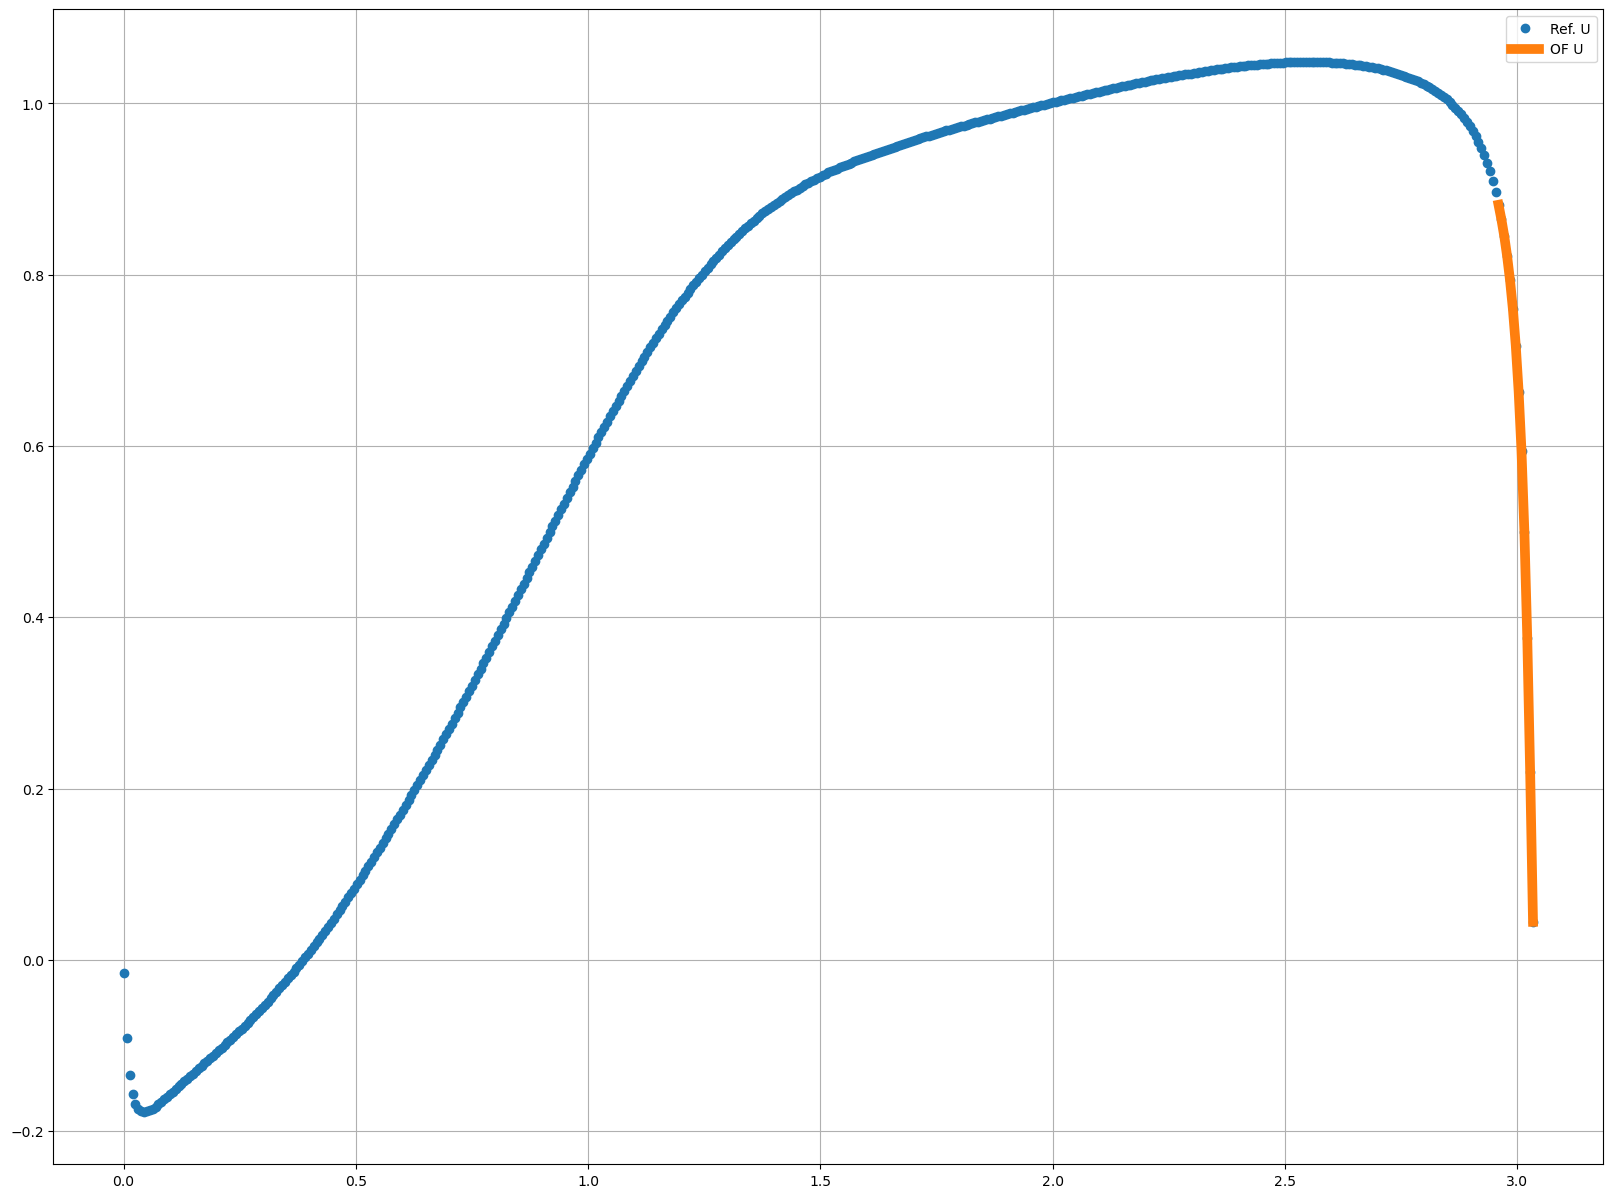

cluster0/cluster0_x4.0_U.xy
(0,)
empty profile
cluster1/cluster1_x4.0_U.xy
(243, 6)


/tmp/ipykernel_10031/2050972624.py:26: UserWarning: loadtxt: input contained no data: "cluster0/cluster0_x4.0_U.xy"
  OF = np.loadtxt(solOF)


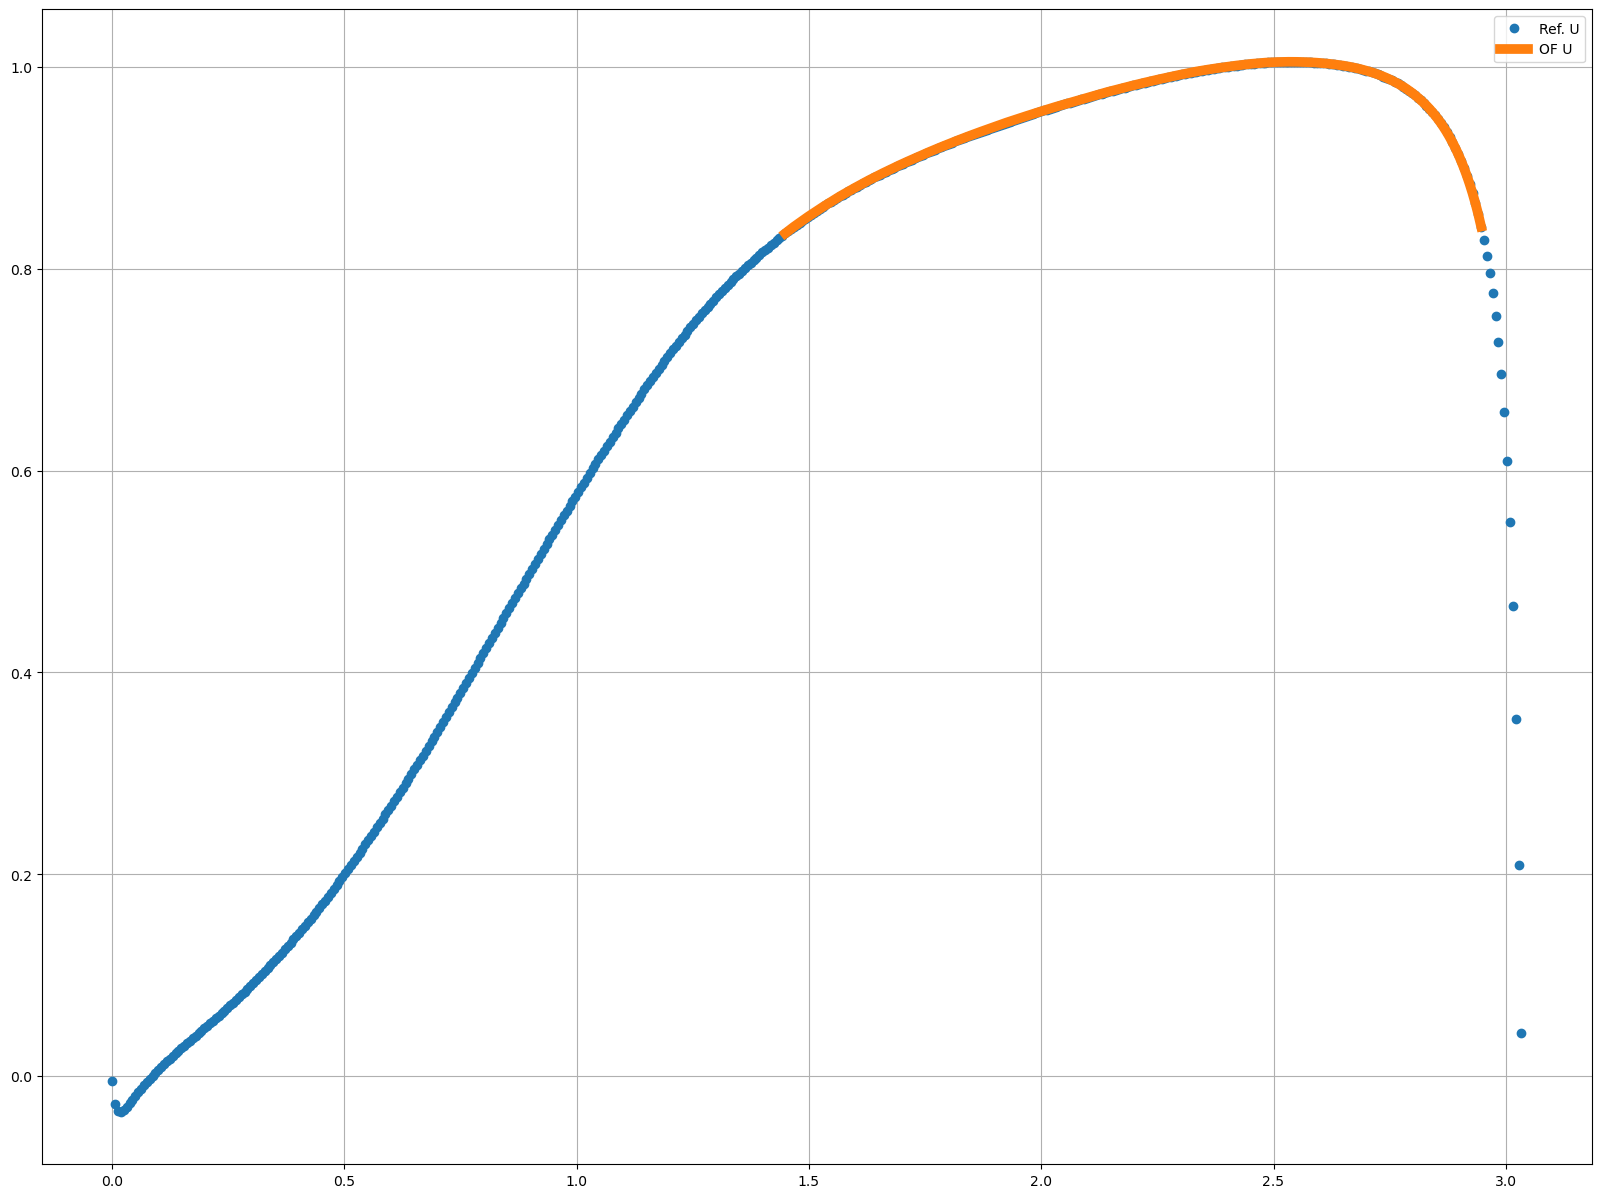

cluster2/cluster2_x4.0_U.xy
(92, 6)


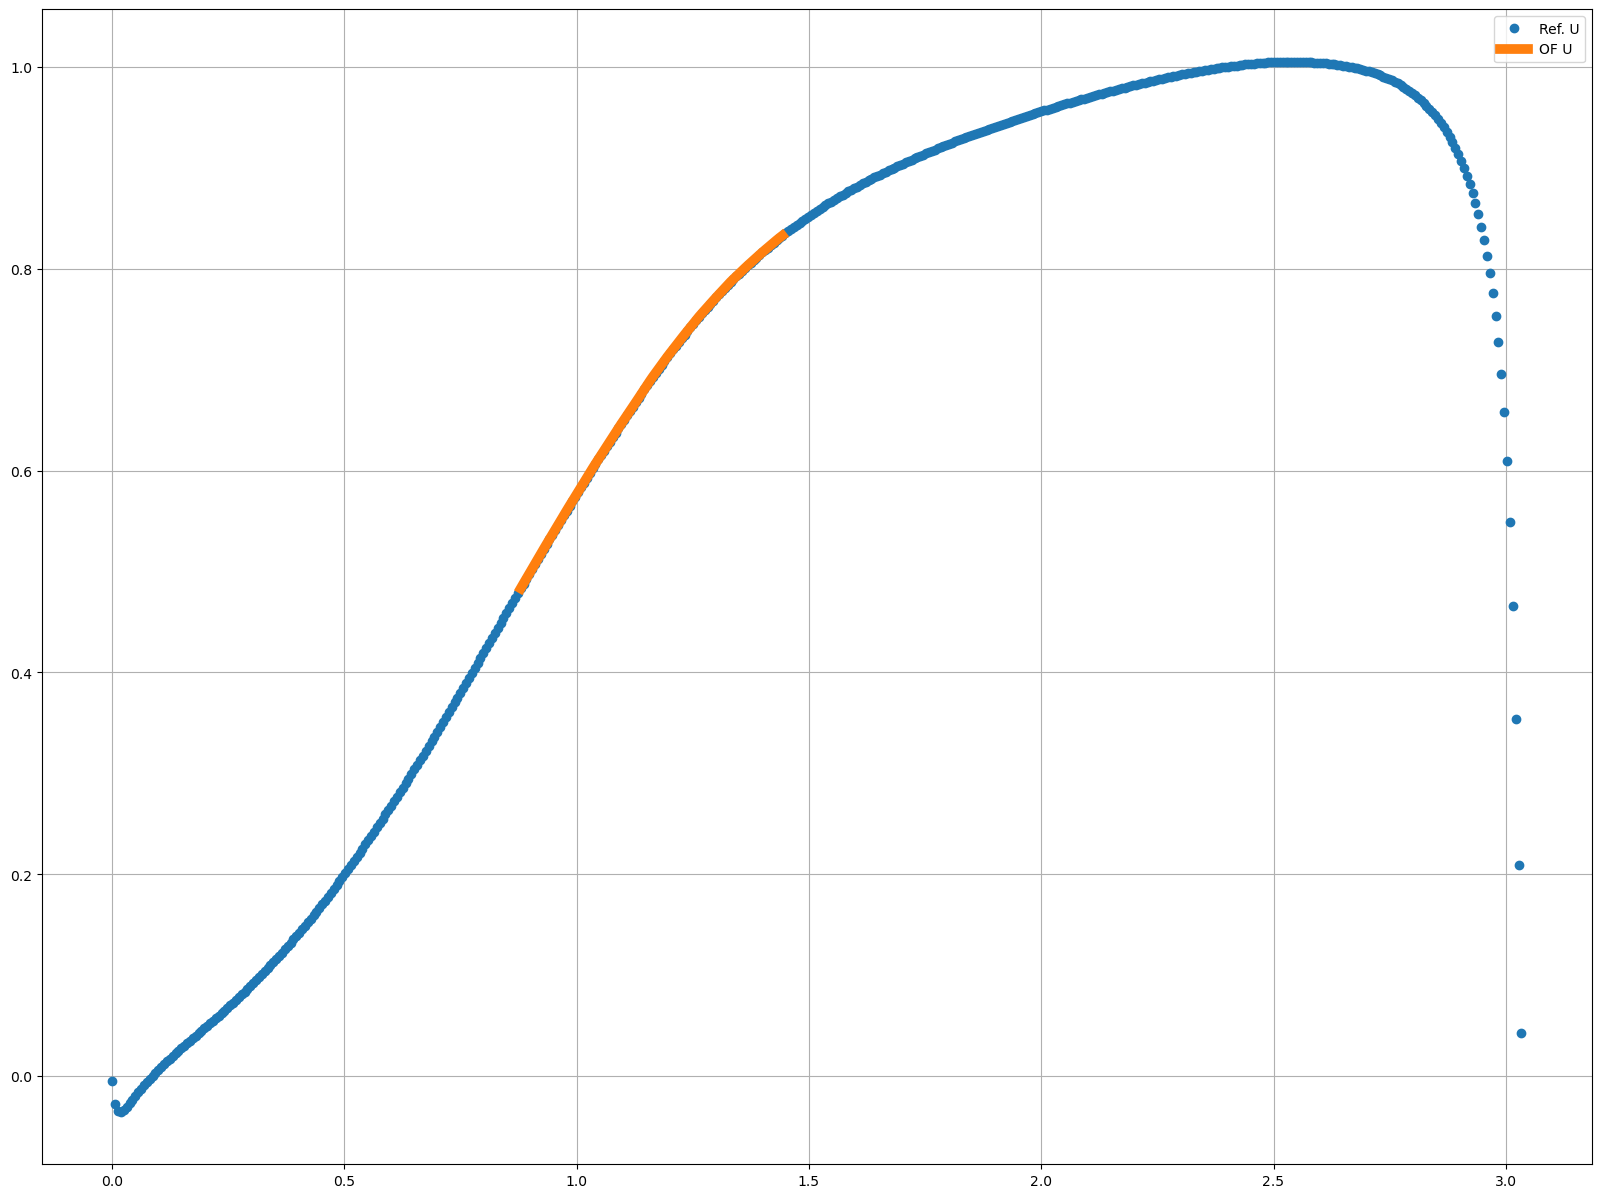

cluster3/cluster3_x4.0_U.xy
(142, 6)


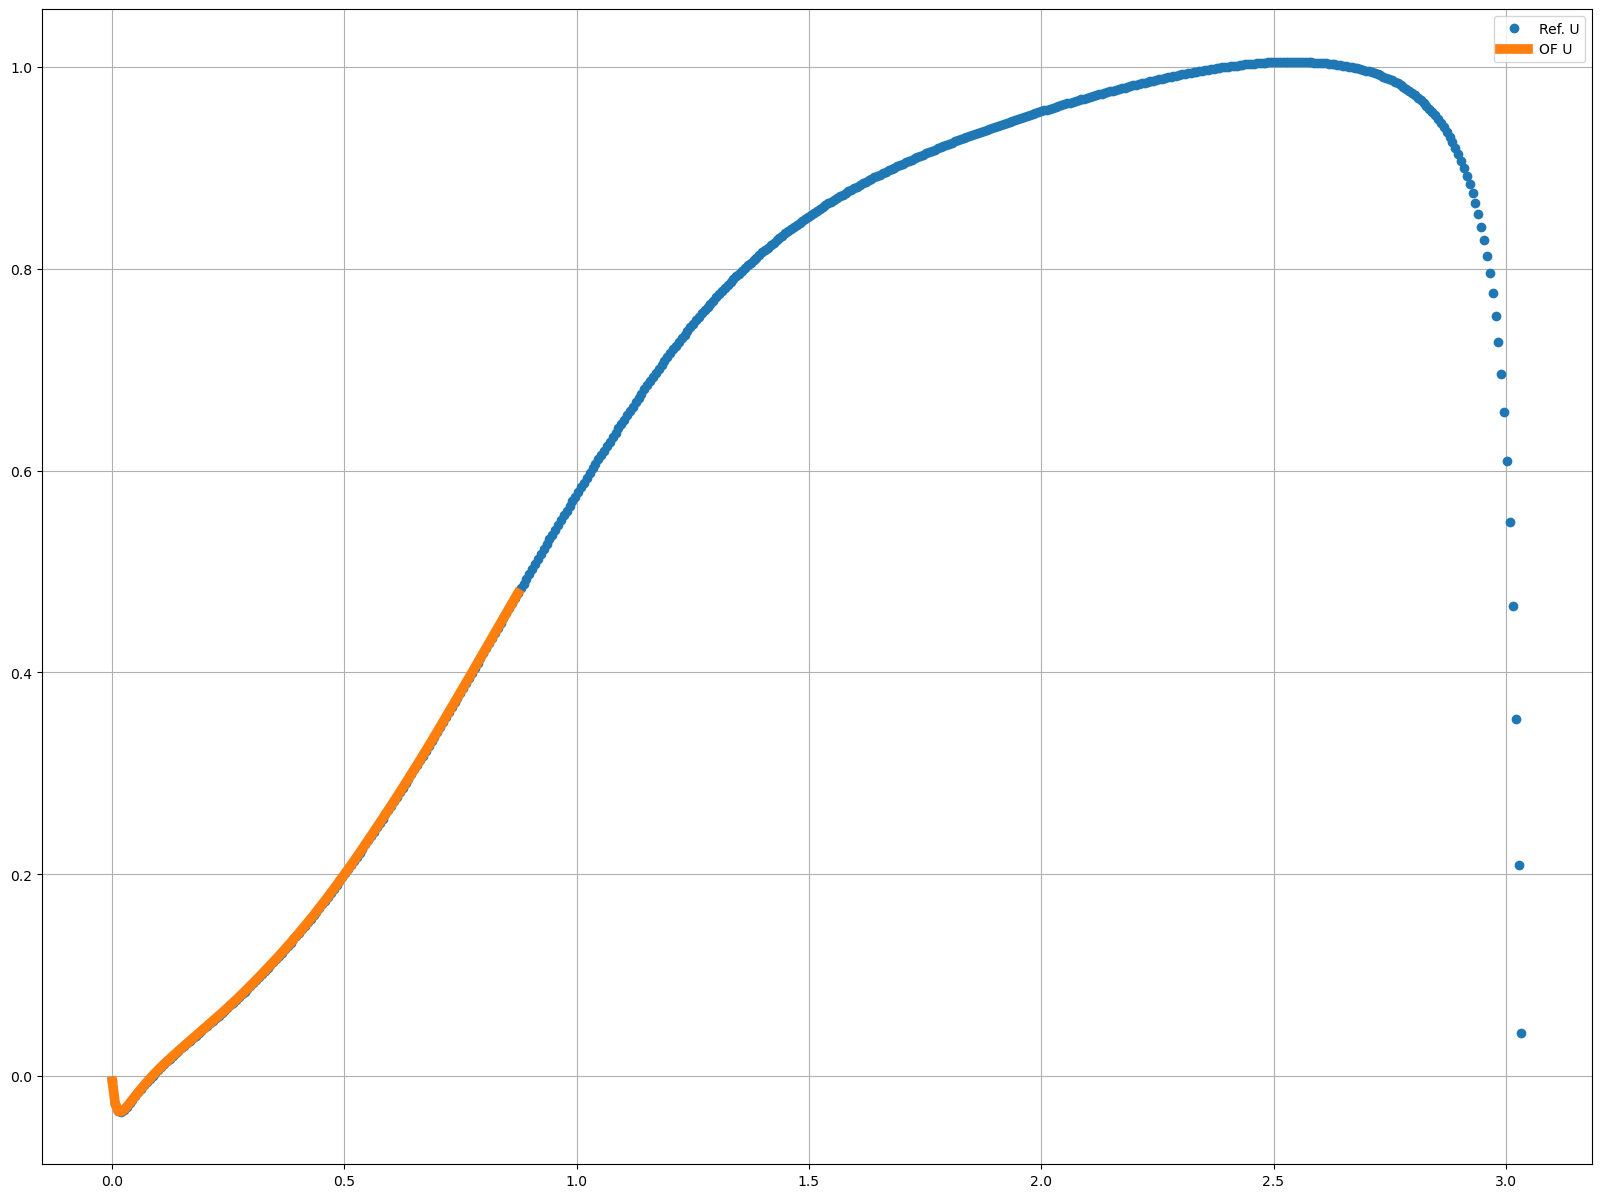

cluster4/cluster4_x4.0_U.xy
(14, 6)


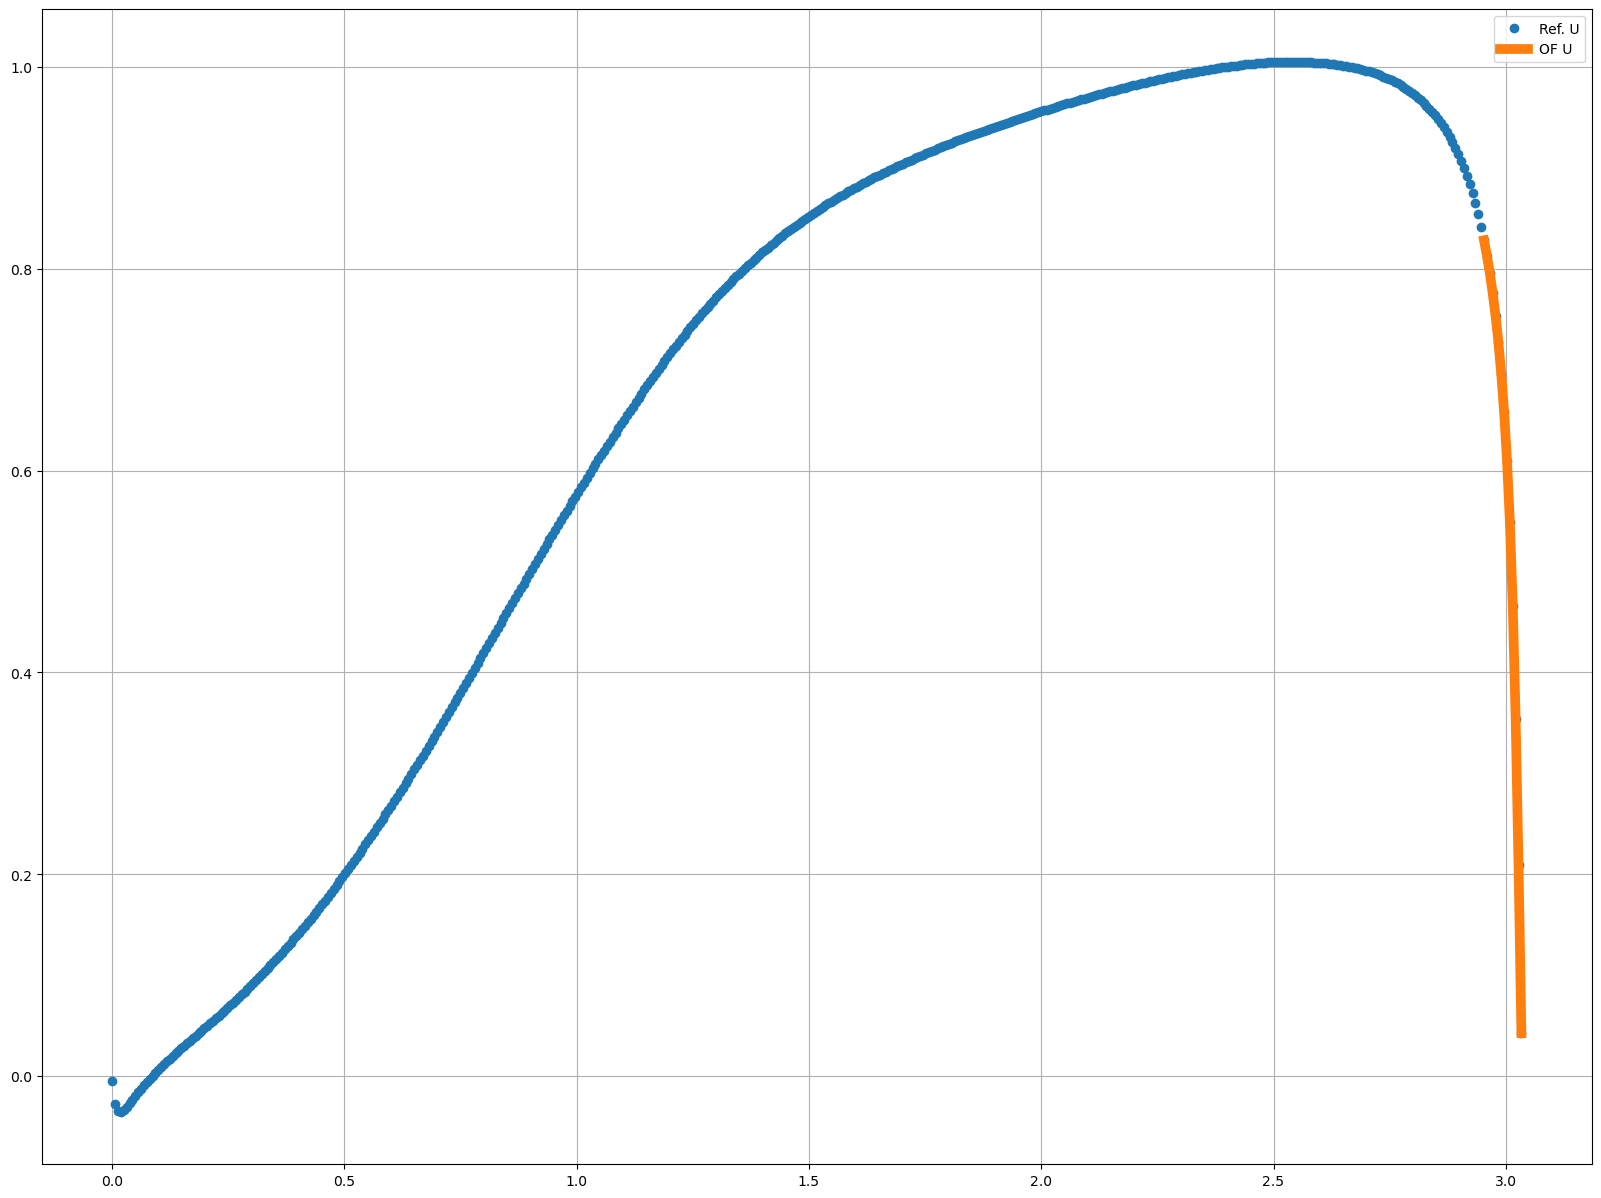

cluster0/cluster0_x5.0_U.xy
(0,)
empty profile
cluster1/cluster1_x5.0_U.xy
(221, 6)


/tmp/ipykernel_10031/2050972624.py:26: UserWarning: loadtxt: input contained no data: "cluster0/cluster0_x5.0_U.xy"
  OF = np.loadtxt(solOF)


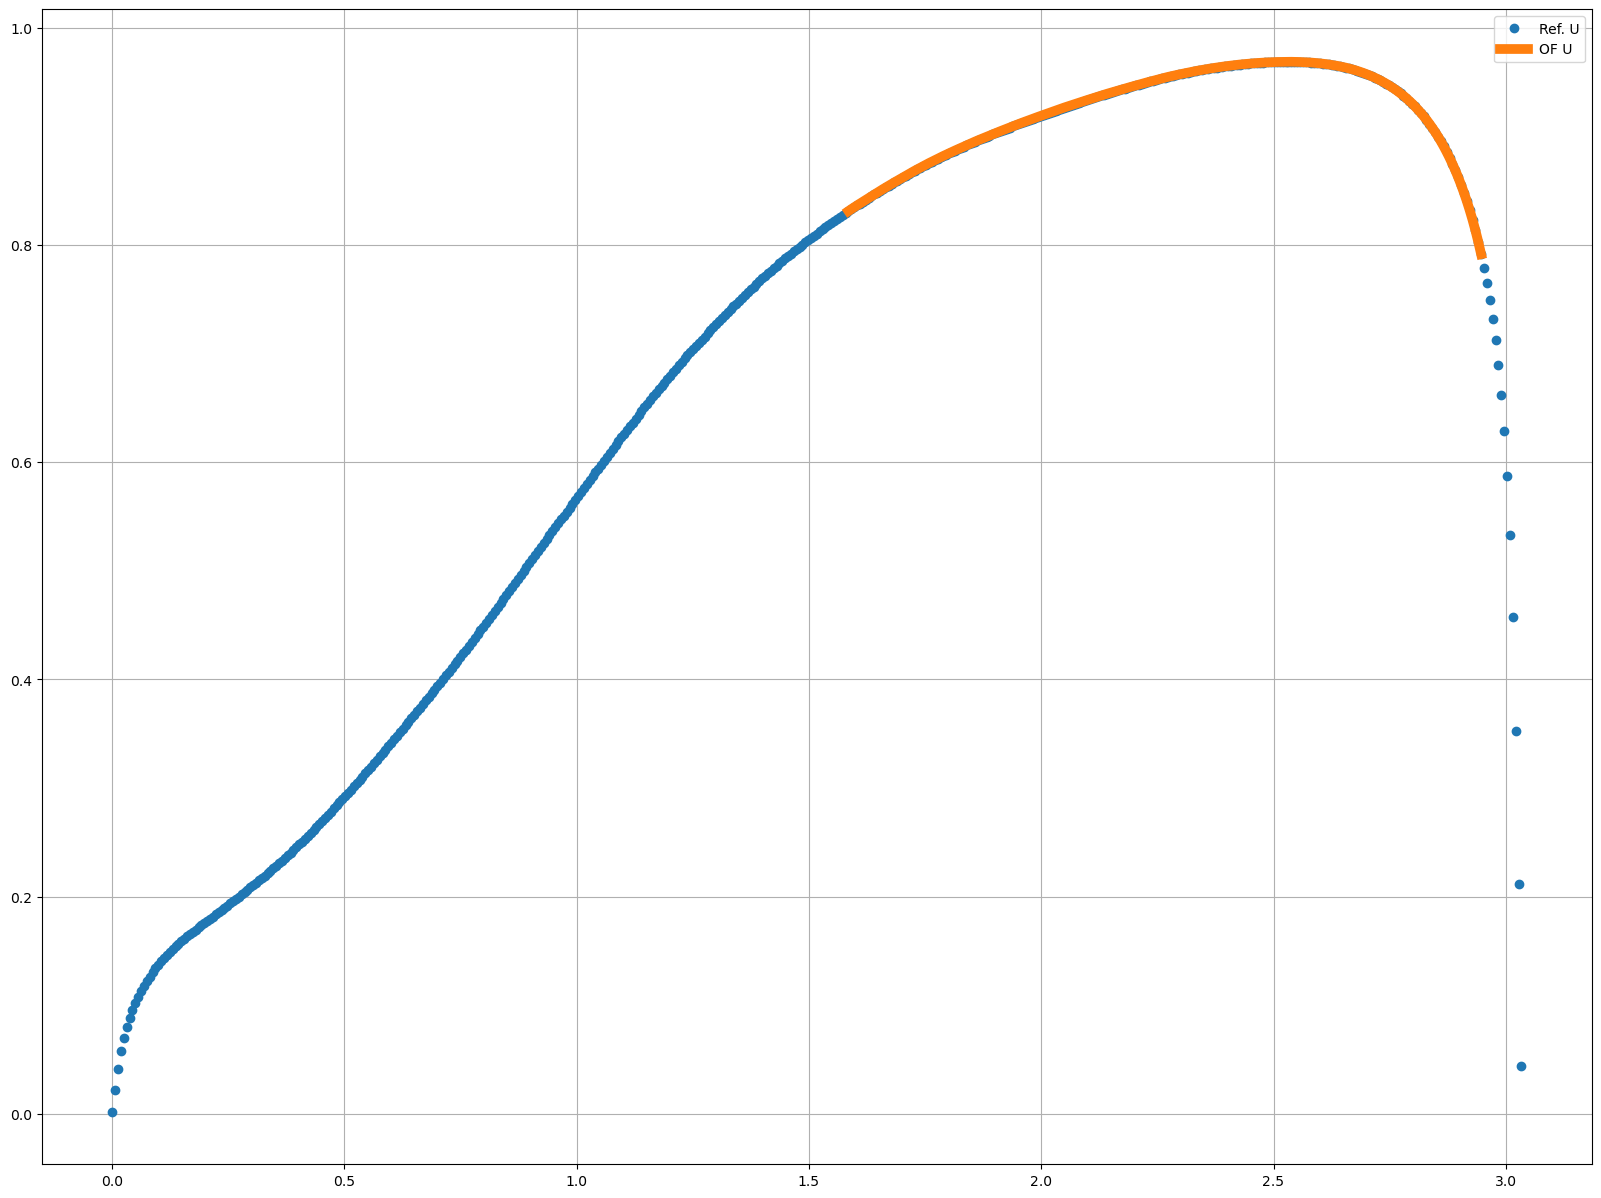

cluster2/cluster2_x5.0_U.xy
(157, 6)


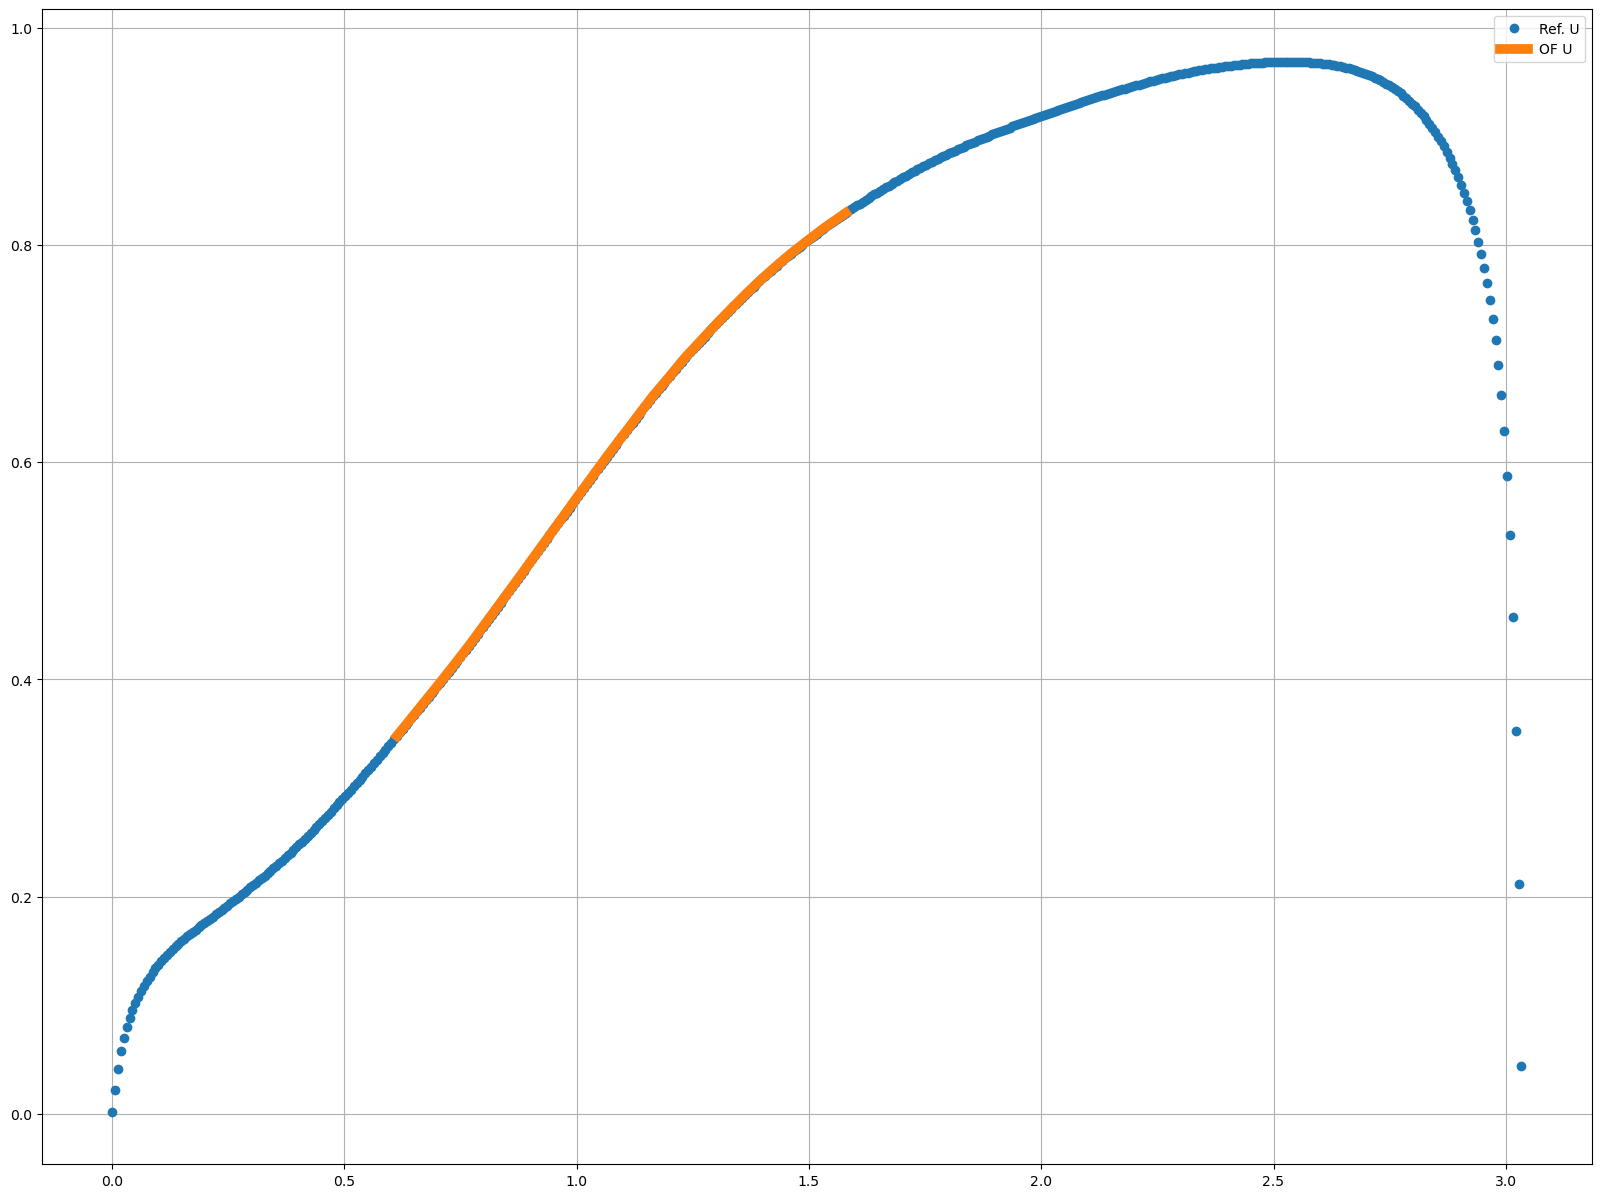

cluster3/cluster3_x5.0_U.xy
(99, 6)


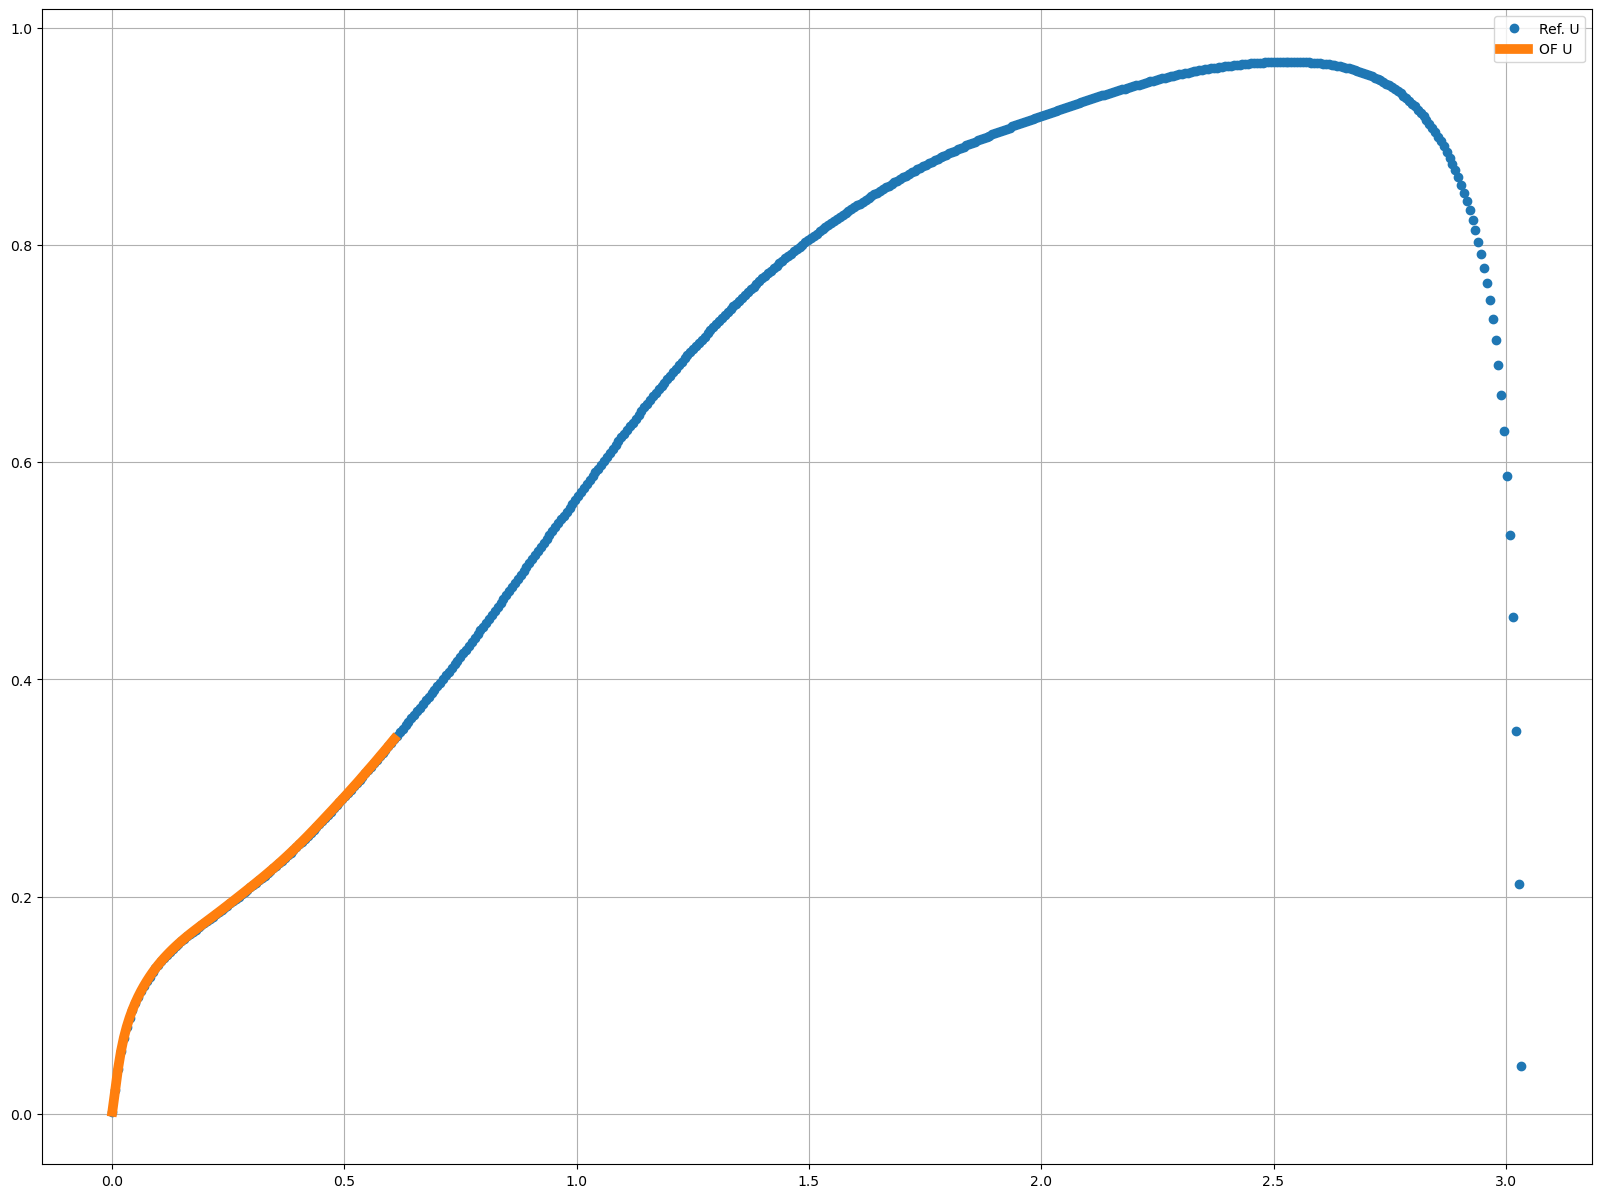

cluster4/cluster4_x5.0_U.xy
(14, 6)


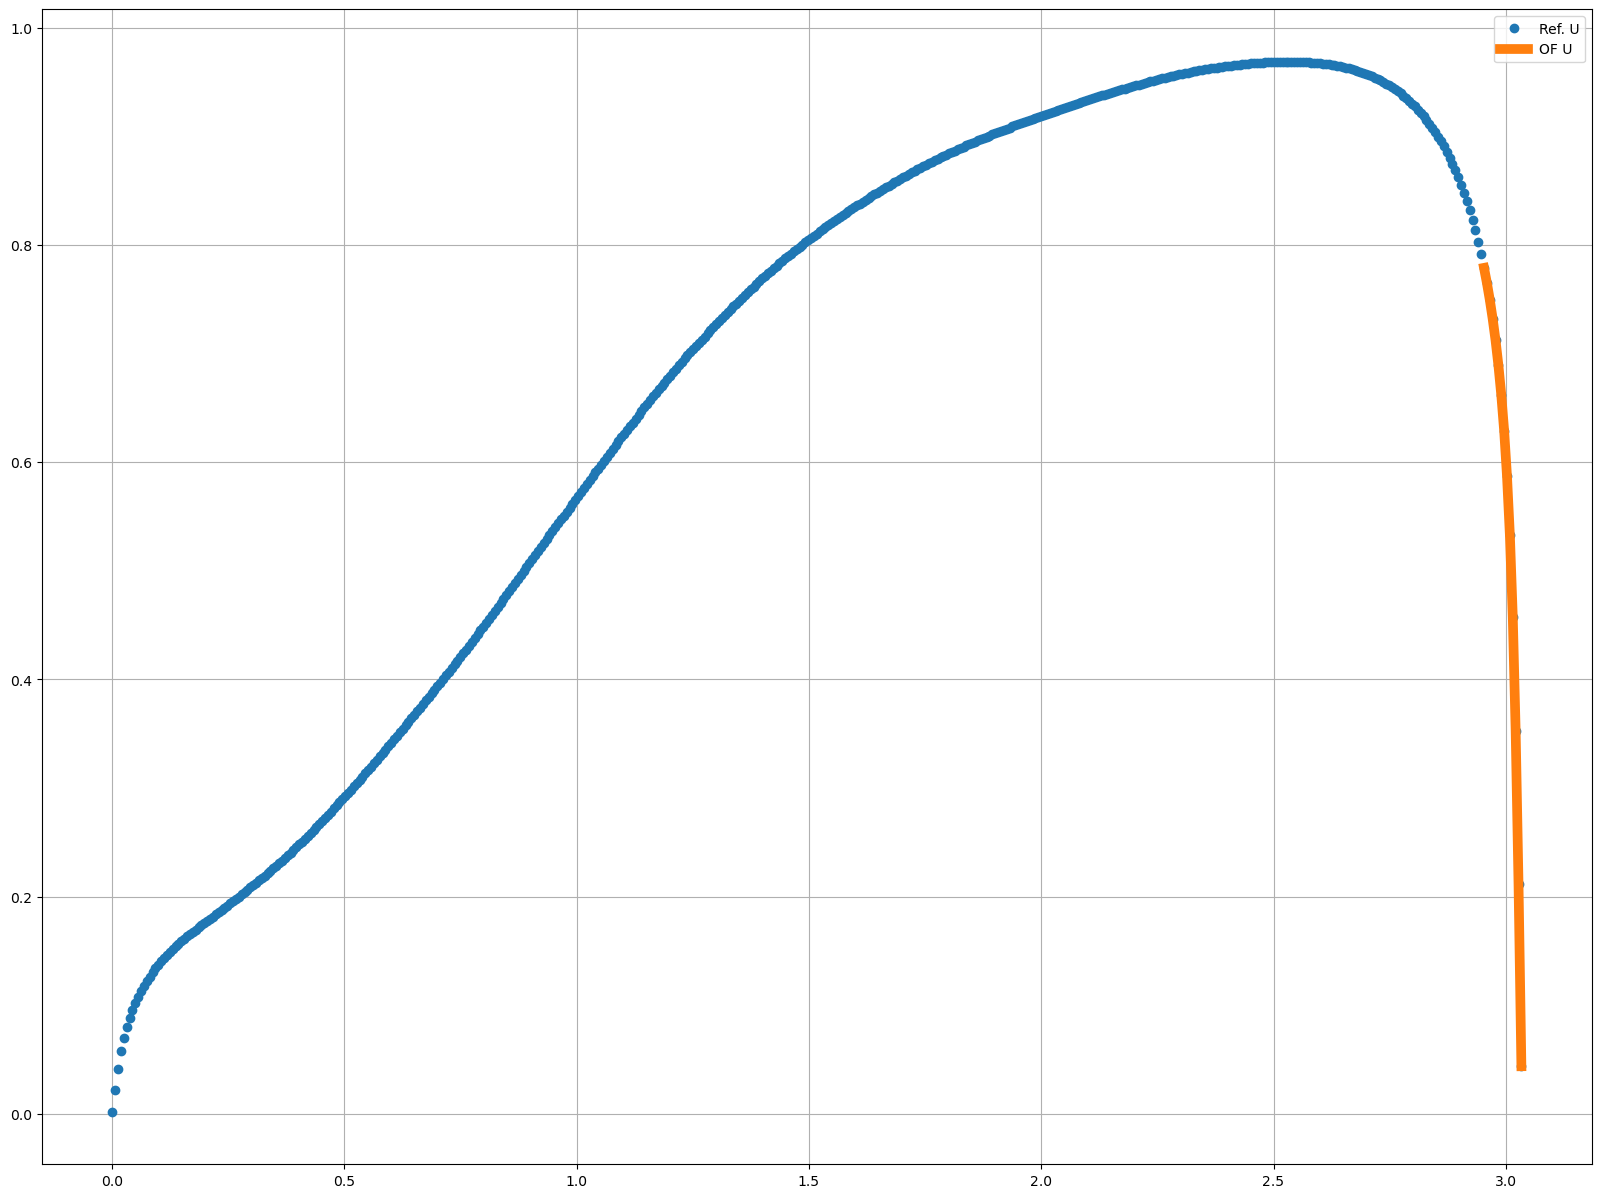

cluster0/cluster0_x6.0_U.xy
(0,)
empty profile
cluster1/cluster1_x6.0_U.xy
(200, 6)


/tmp/ipykernel_10031/2050972624.py:26: UserWarning: loadtxt: input contained no data: "cluster0/cluster0_x6.0_U.xy"
  OF = np.loadtxt(solOF)


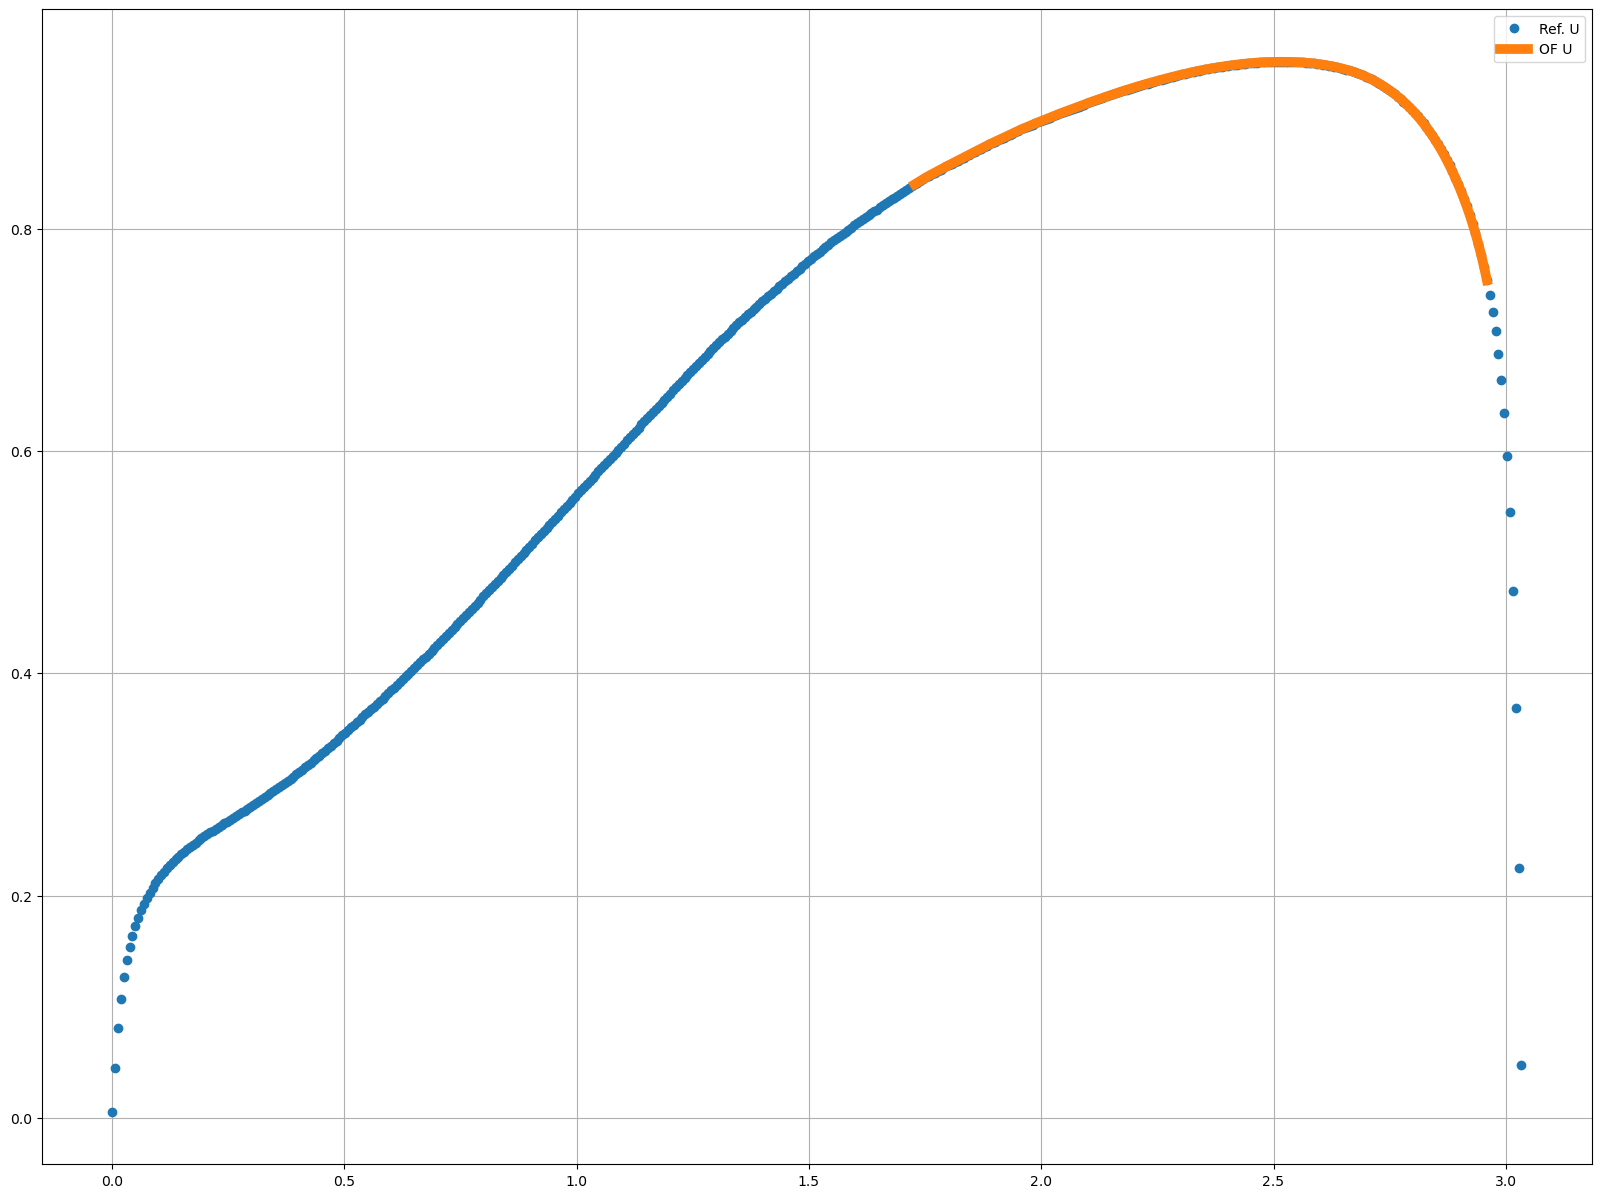

cluster2/cluster2_x6.0_U.xy
(256, 6)


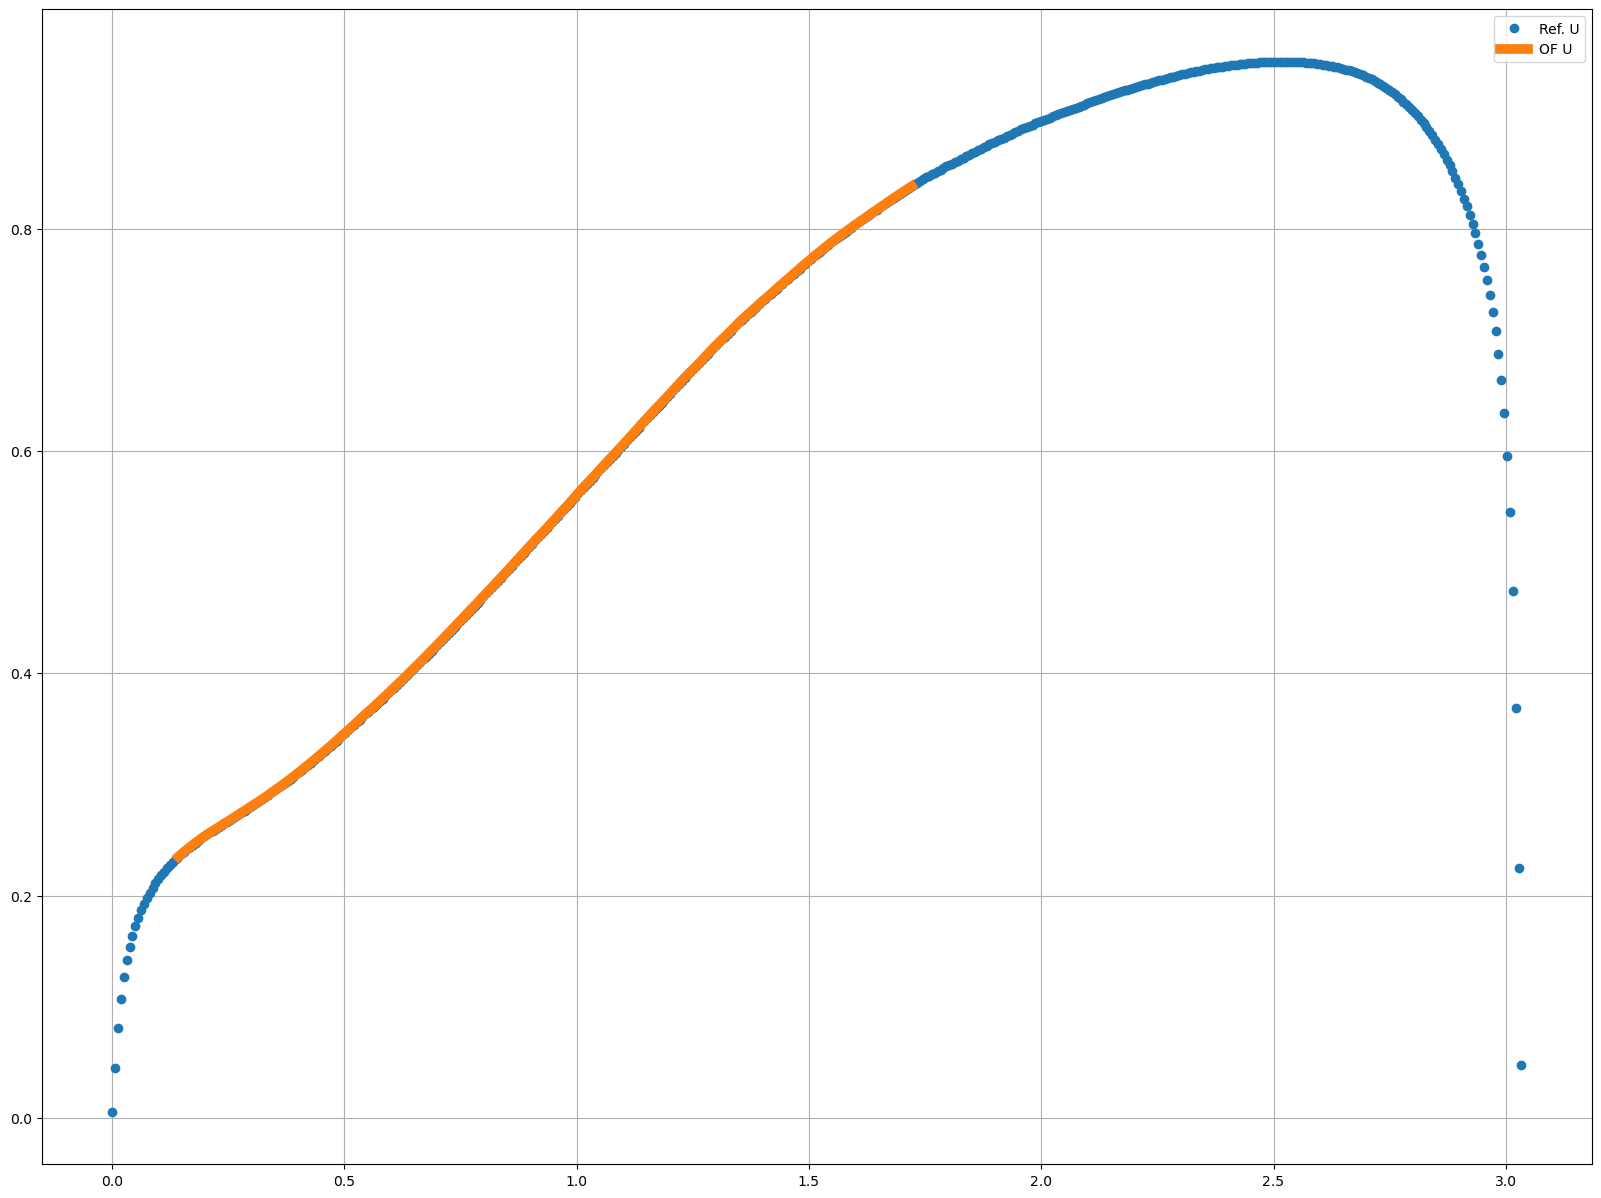

cluster3/cluster3_x6.0_U.xy
(23, 6)


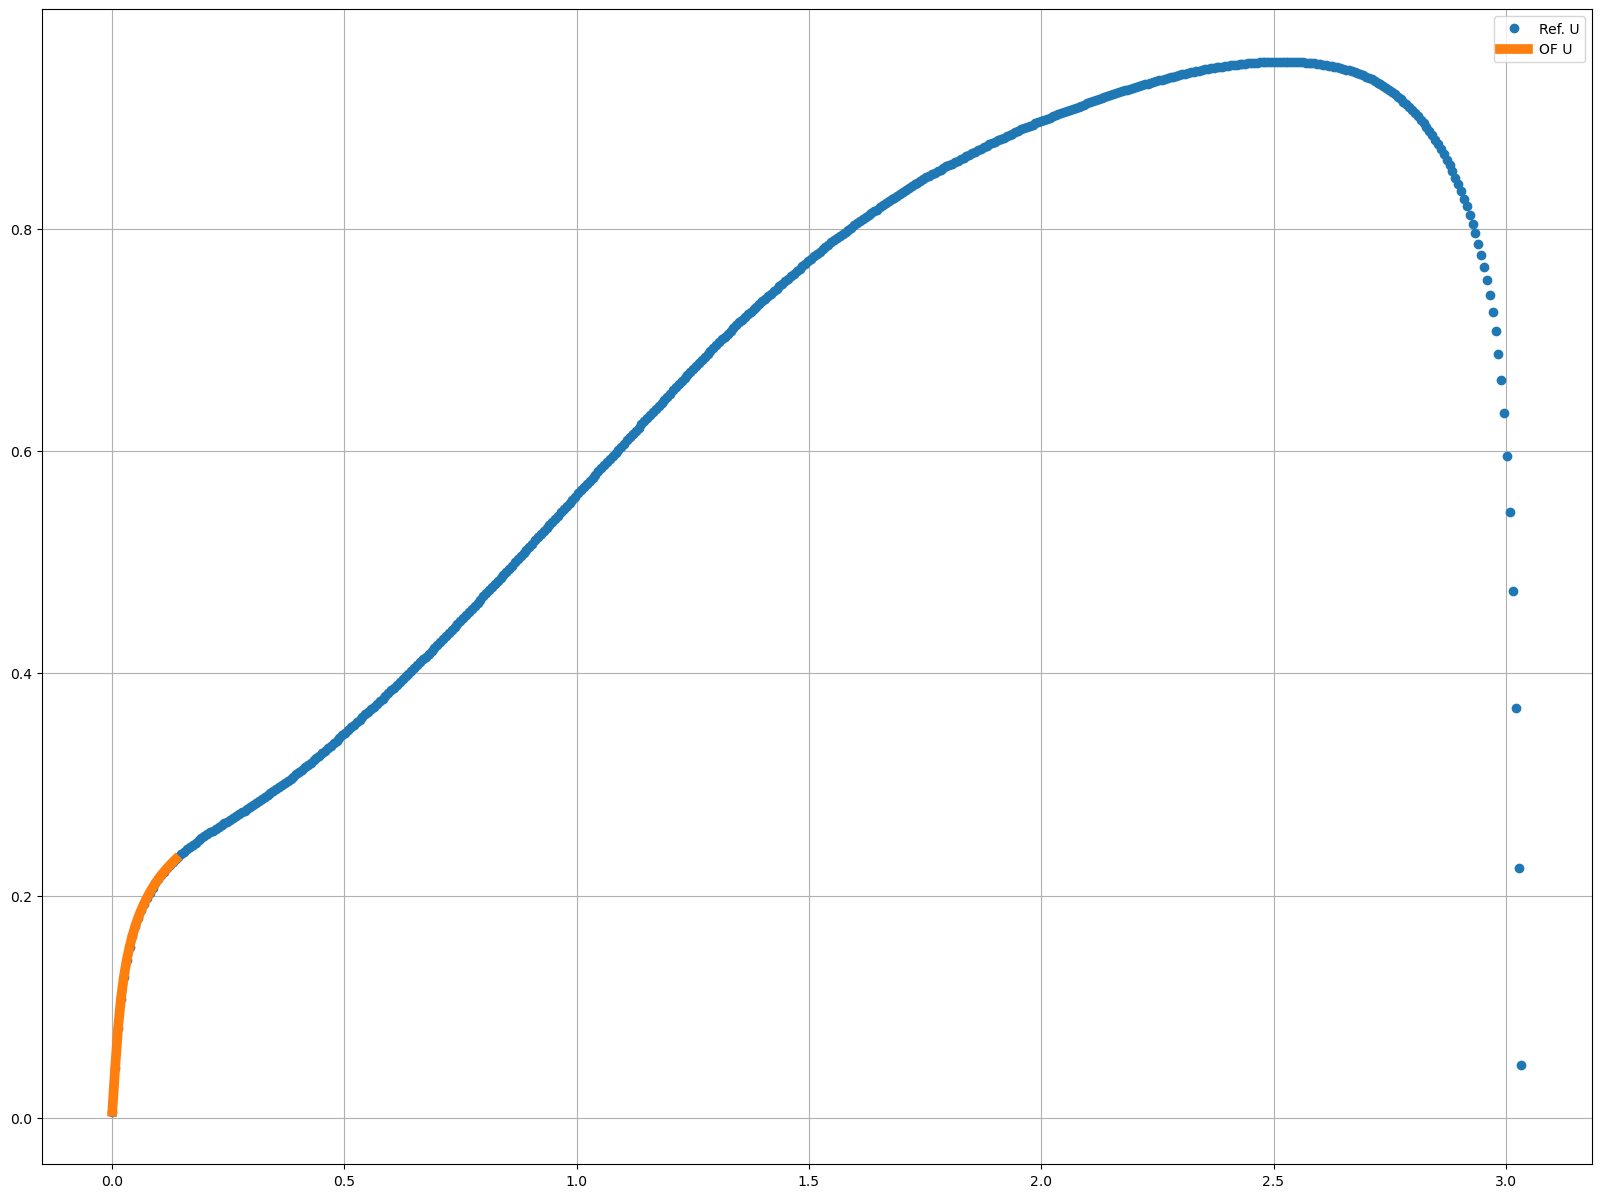

cluster4/cluster4_x6.0_U.xy
(12, 6)


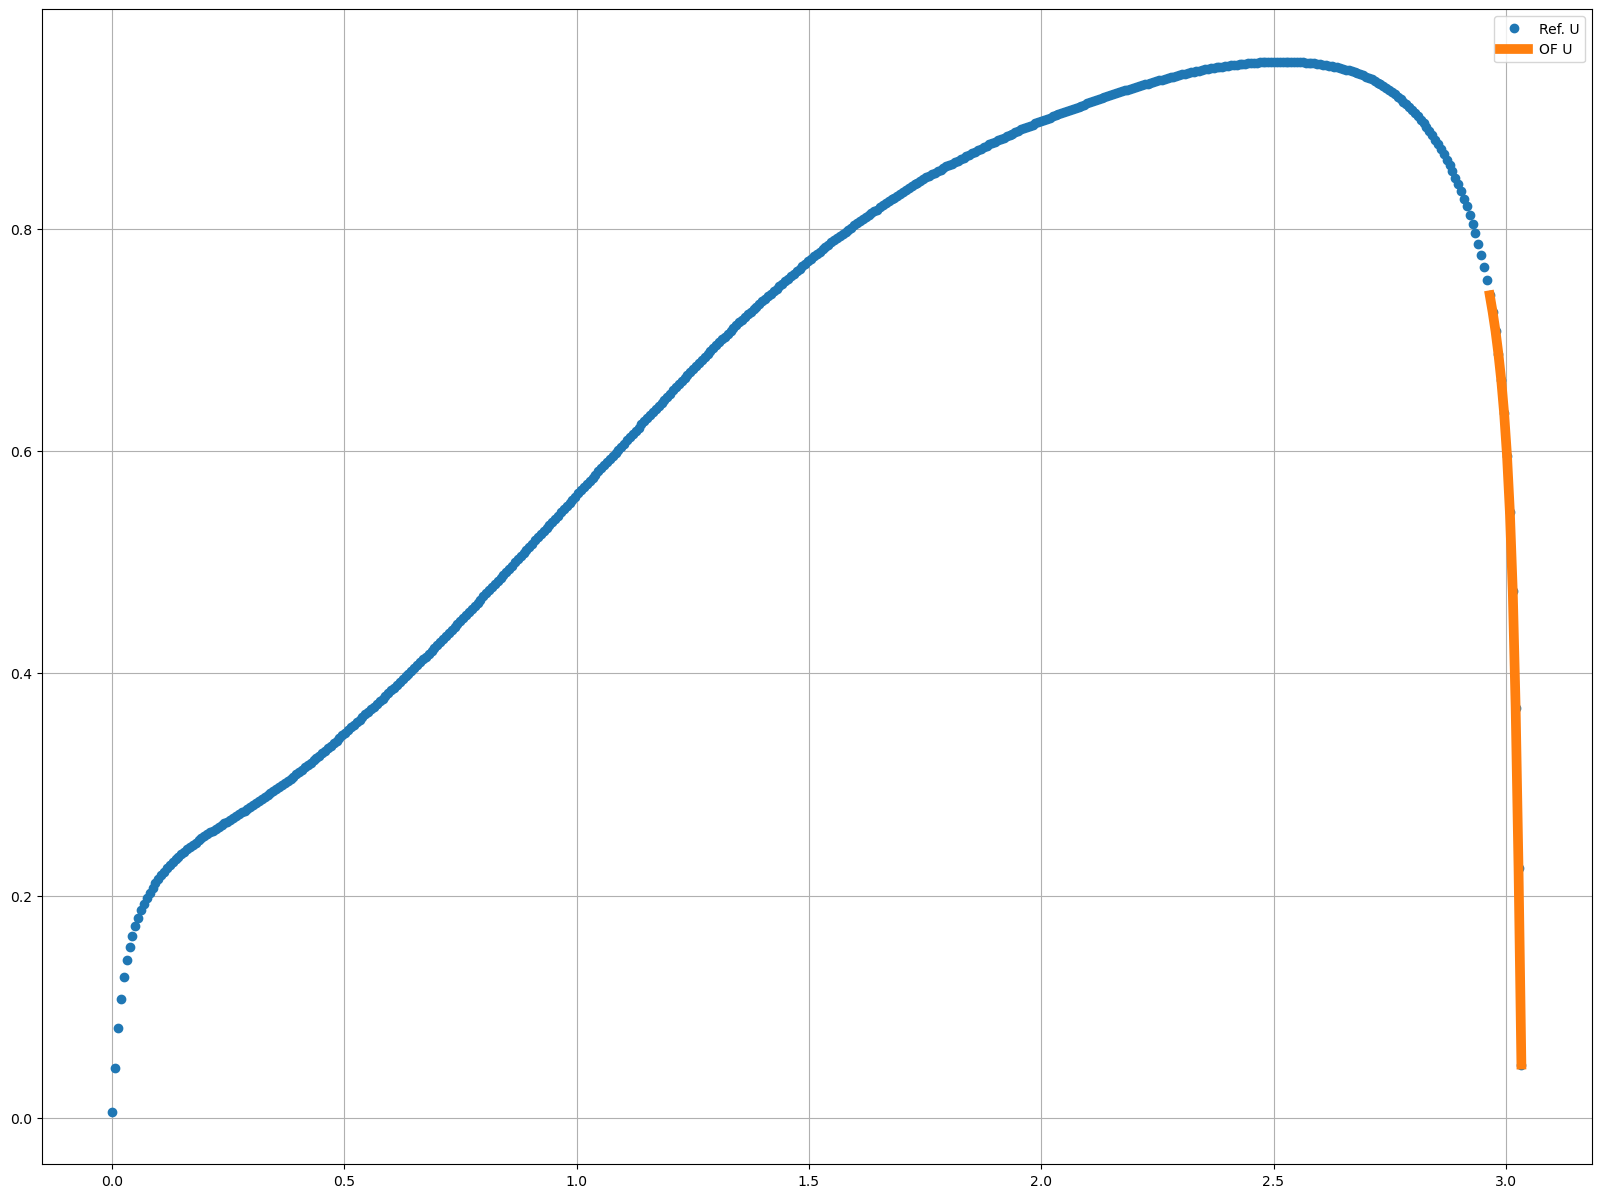

cluster0/cluster0_x7.0_U.xy
(0,)
empty profile
cluster1/cluster1_x7.0_U.xy
(171, 6)


/tmp/ipykernel_10031/2050972624.py:26: UserWarning: loadtxt: input contained no data: "cluster0/cluster0_x7.0_U.xy"
  OF = np.loadtxt(solOF)


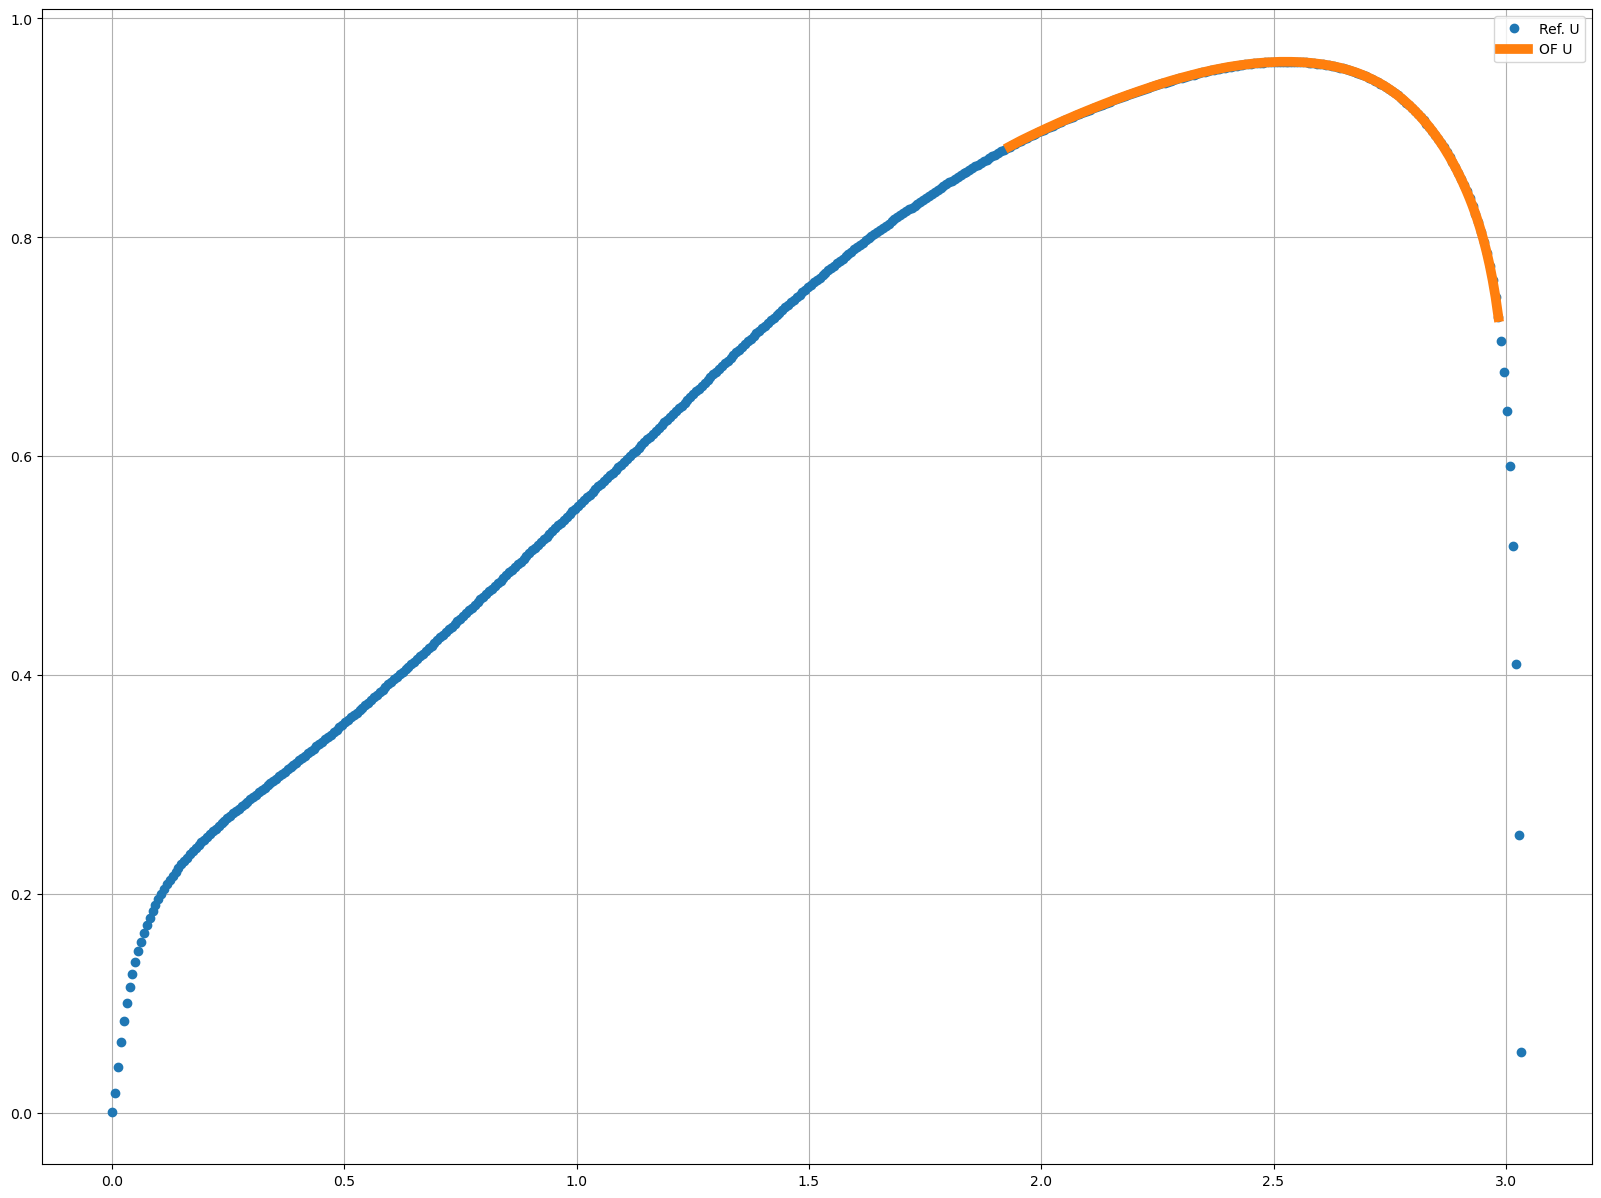

cluster2/cluster2_x7.0_U.xy
(291, 6)


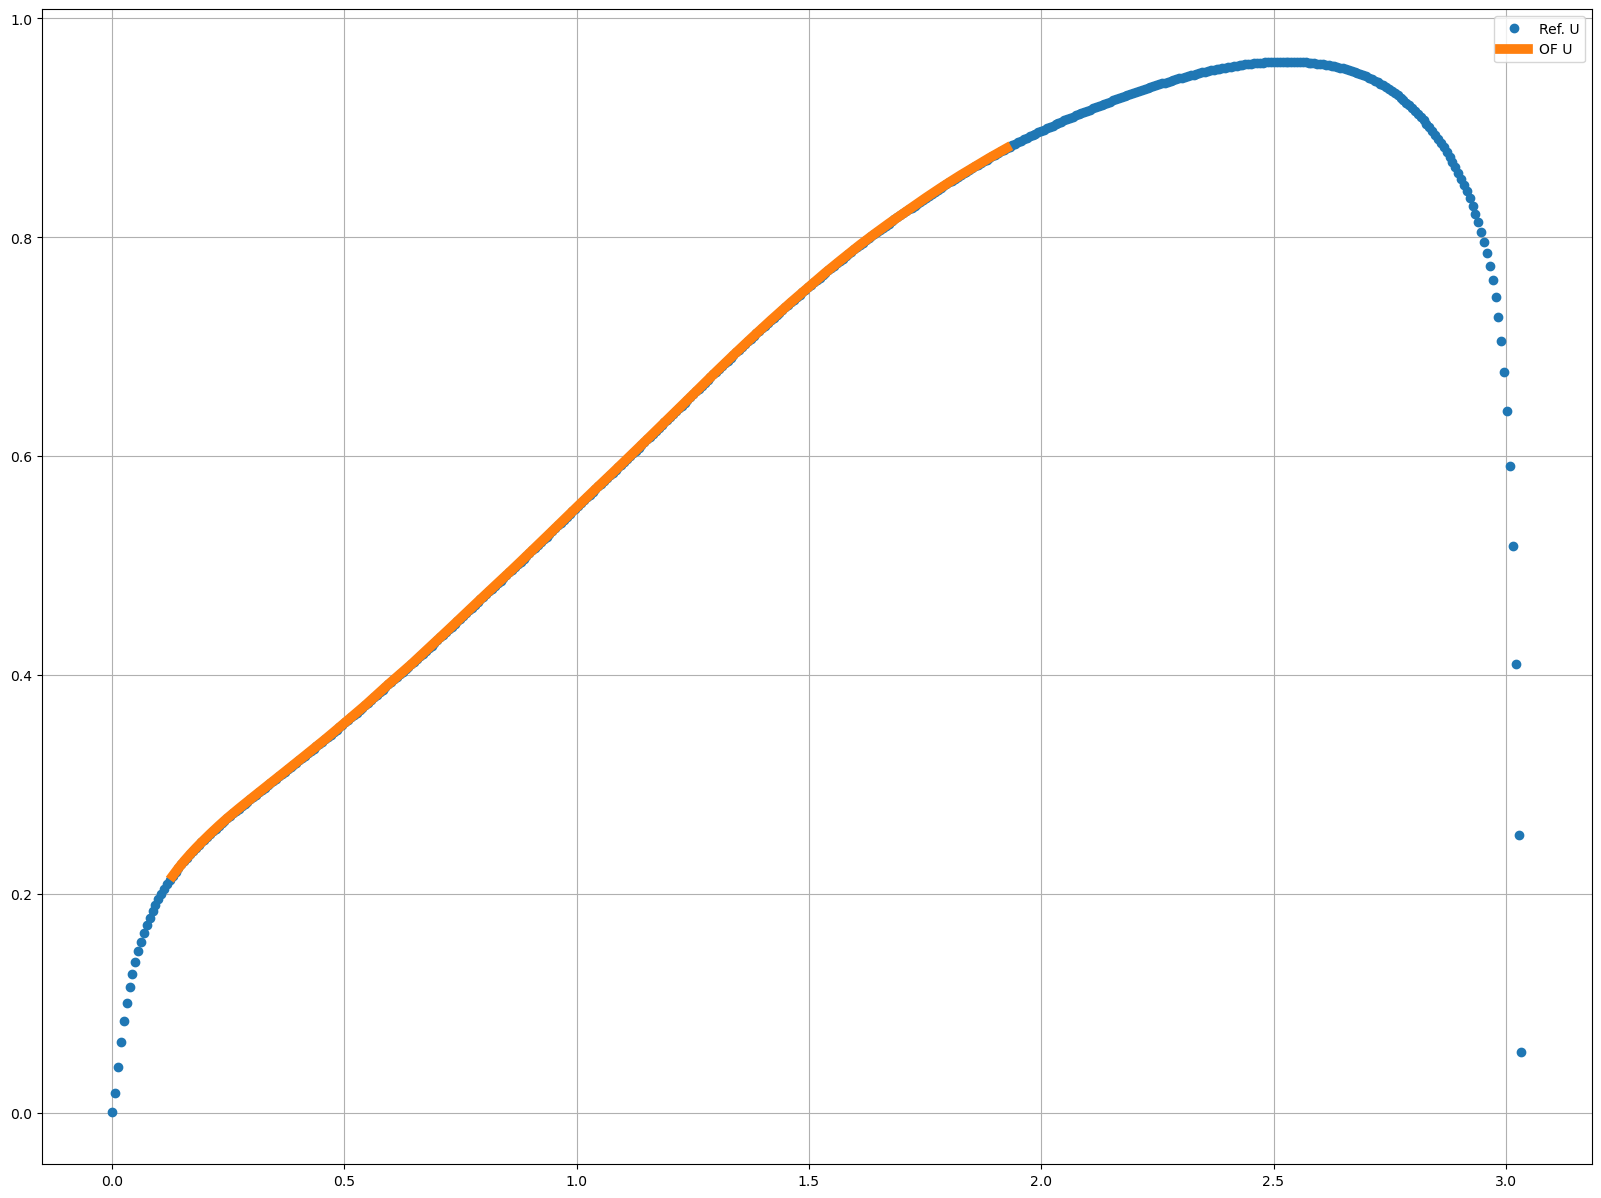

cluster3/cluster3_x7.0_U.xy
(21, 6)


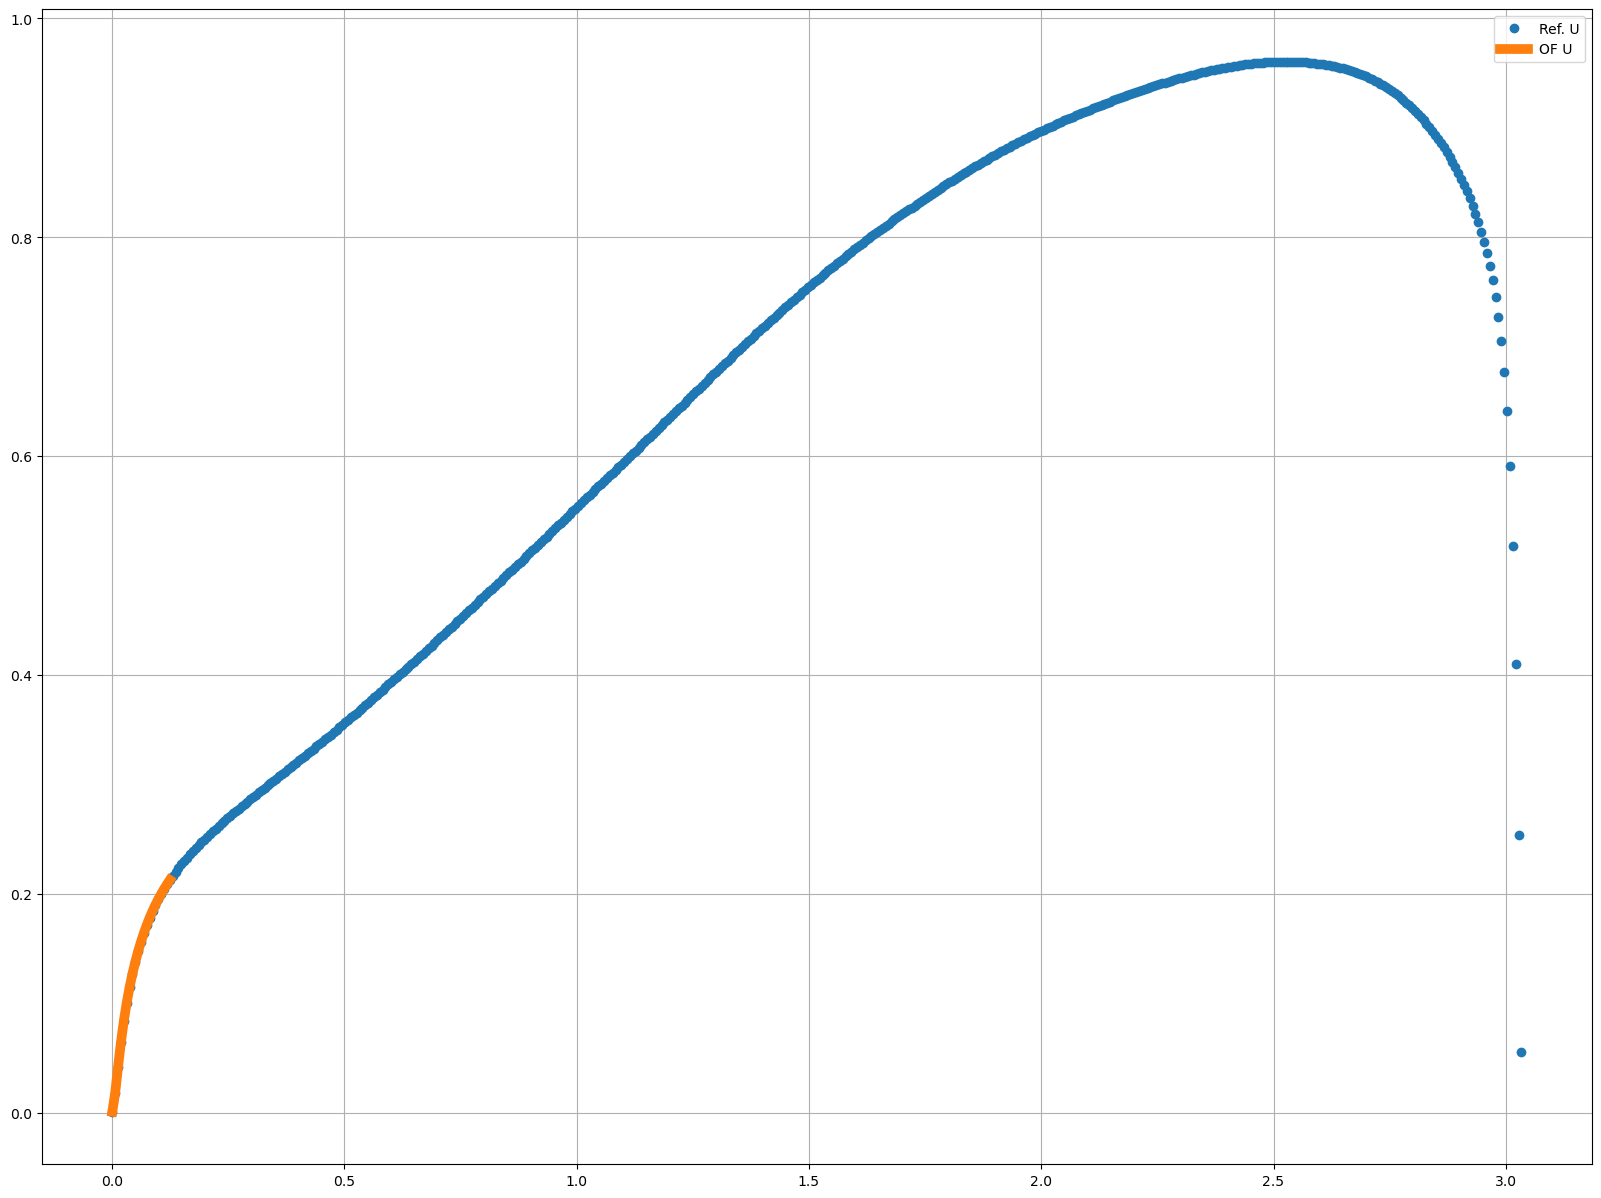

cluster4/cluster4_x7.0_U.xy
(8, 6)


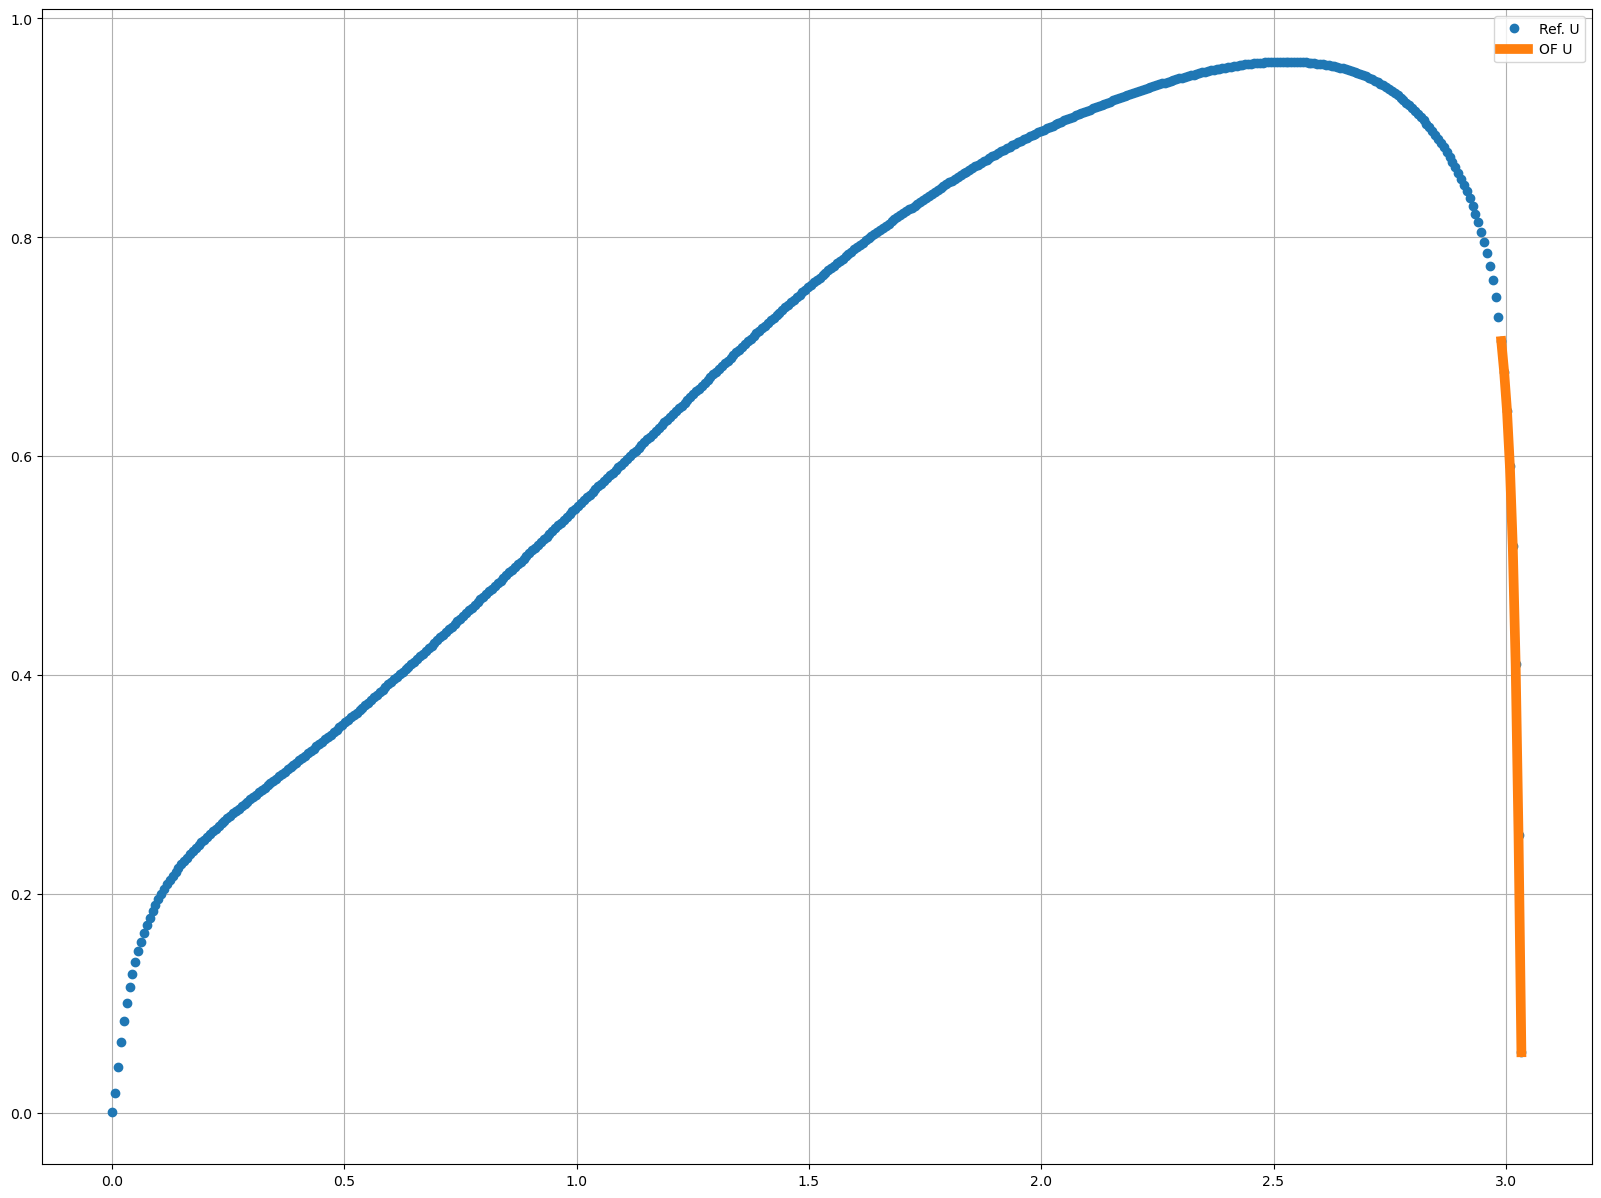

cluster0/cluster0_x8.0_U.xy
(0,)
empty profile
cluster1/cluster1_x8.0_U.xy
(131, 6)


/tmp/ipykernel_10031/2050972624.py:26: UserWarning: loadtxt: input contained no data: "cluster0/cluster0_x8.0_U.xy"
  OF = np.loadtxt(solOF)


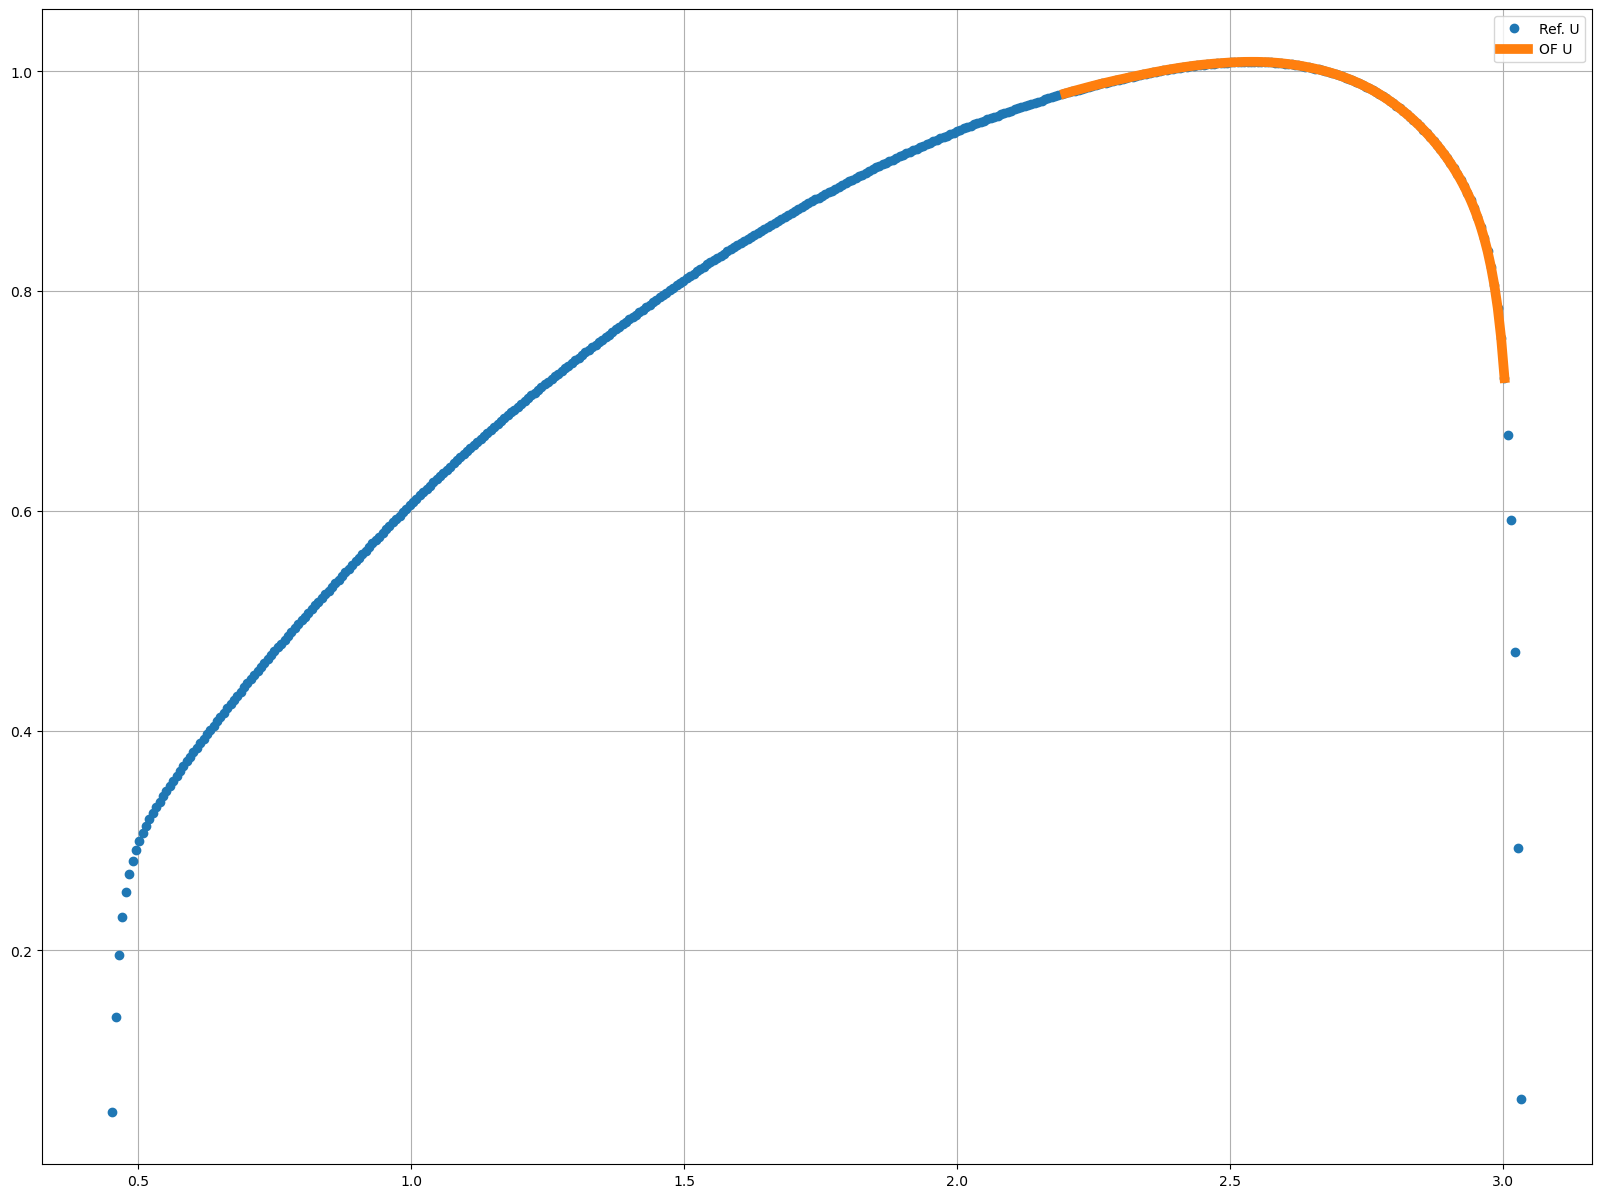

cluster2/cluster2_x8.0_U.xy
(85, 6)


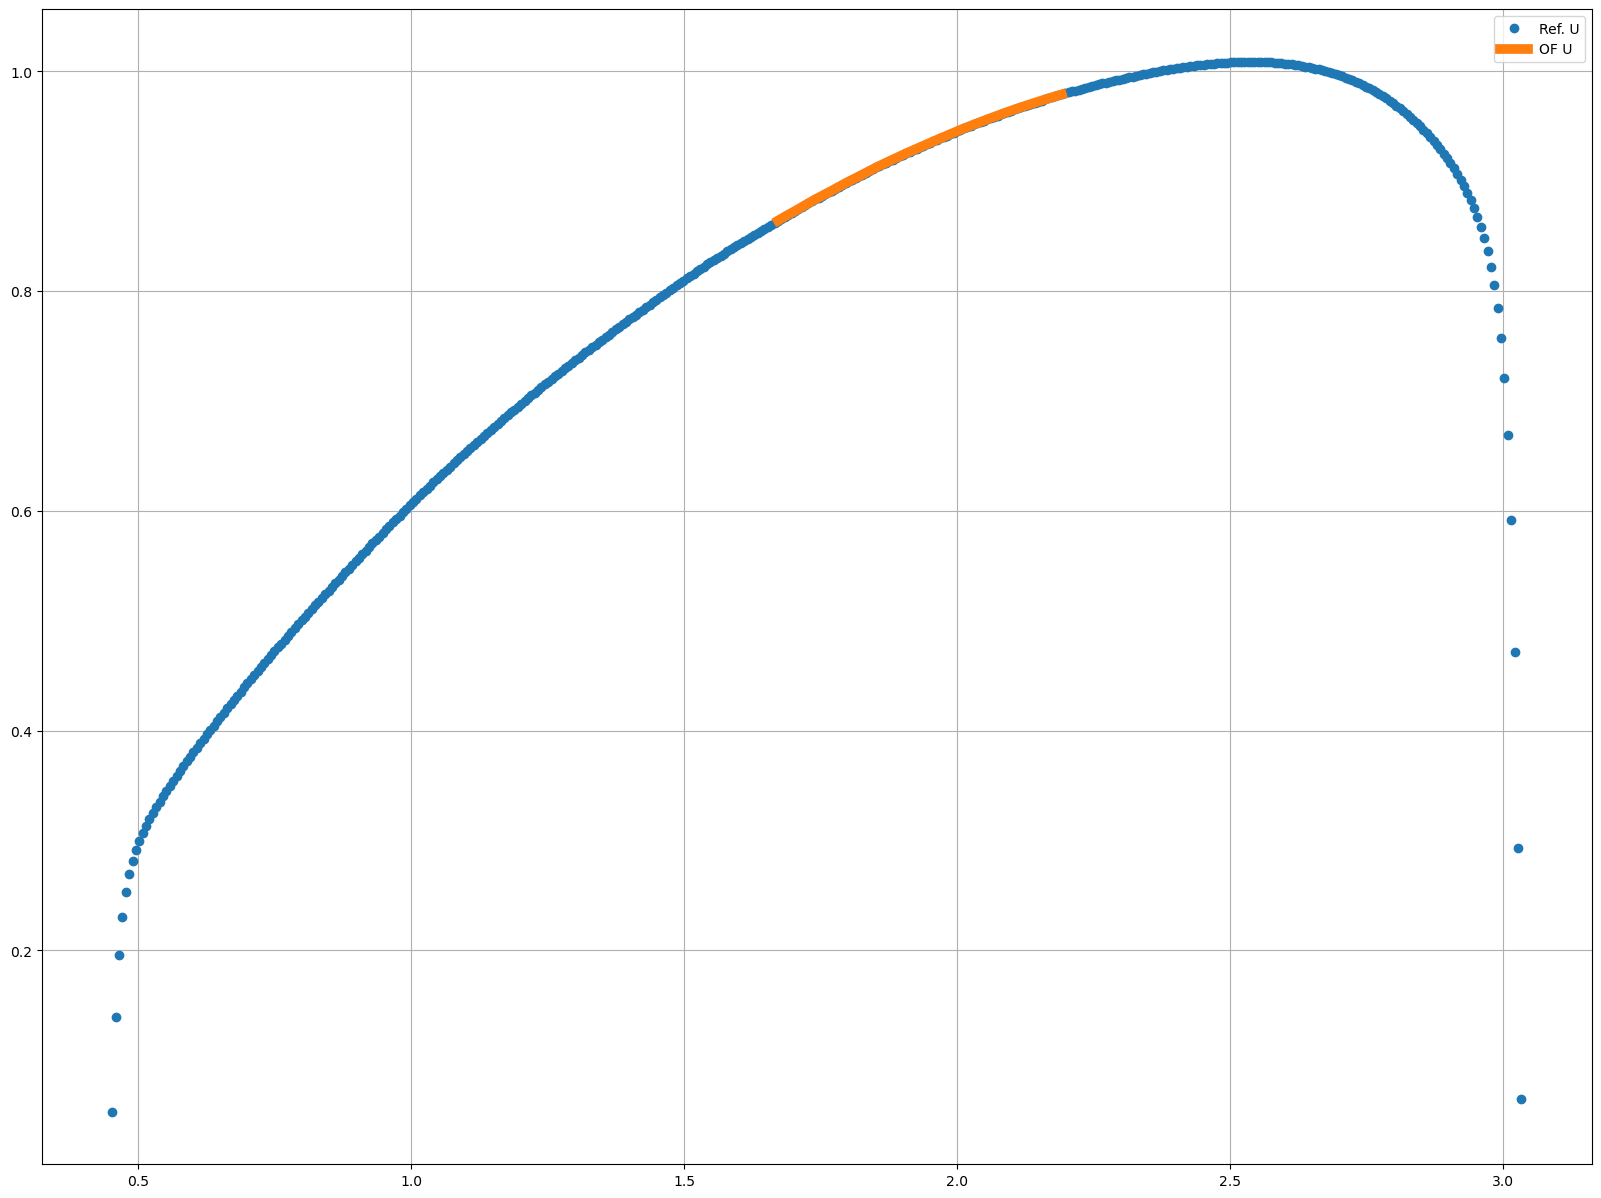

cluster3/cluster3_x8.0_U.xy
(3, 6)


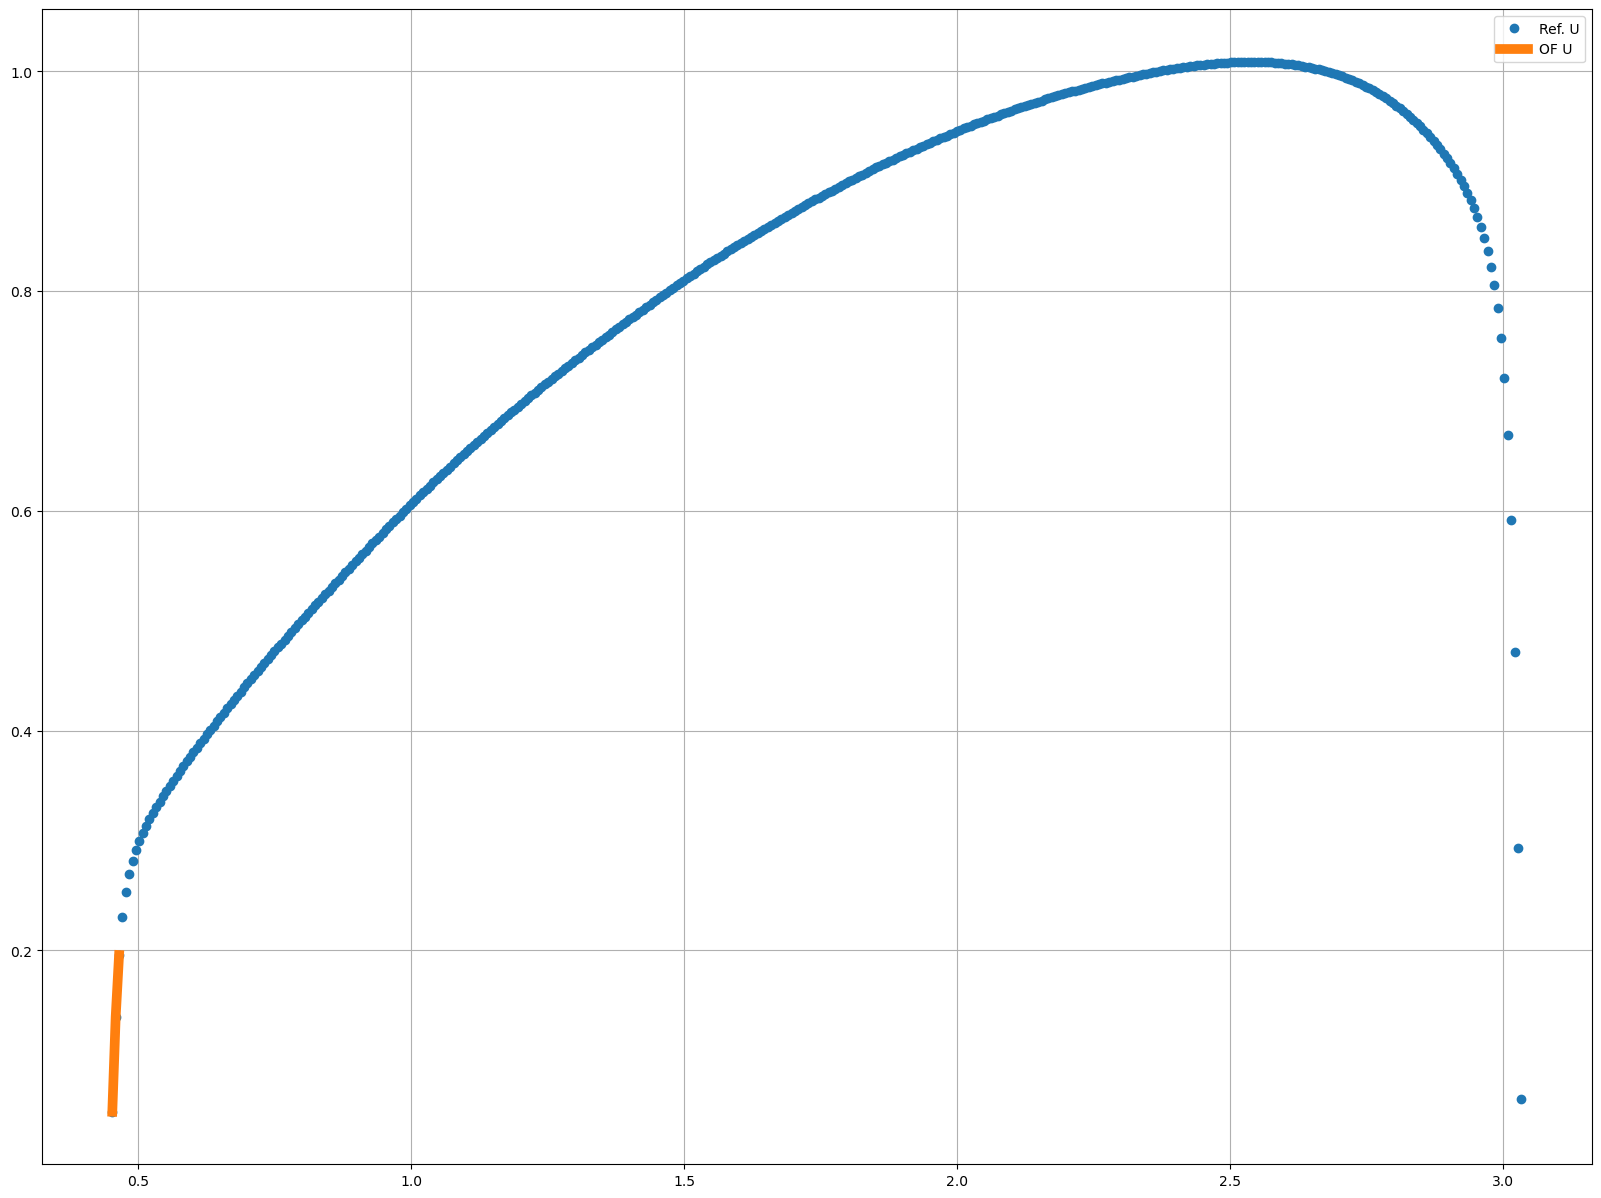

cluster4/cluster4_x8.0_U.xy
(199, 6)


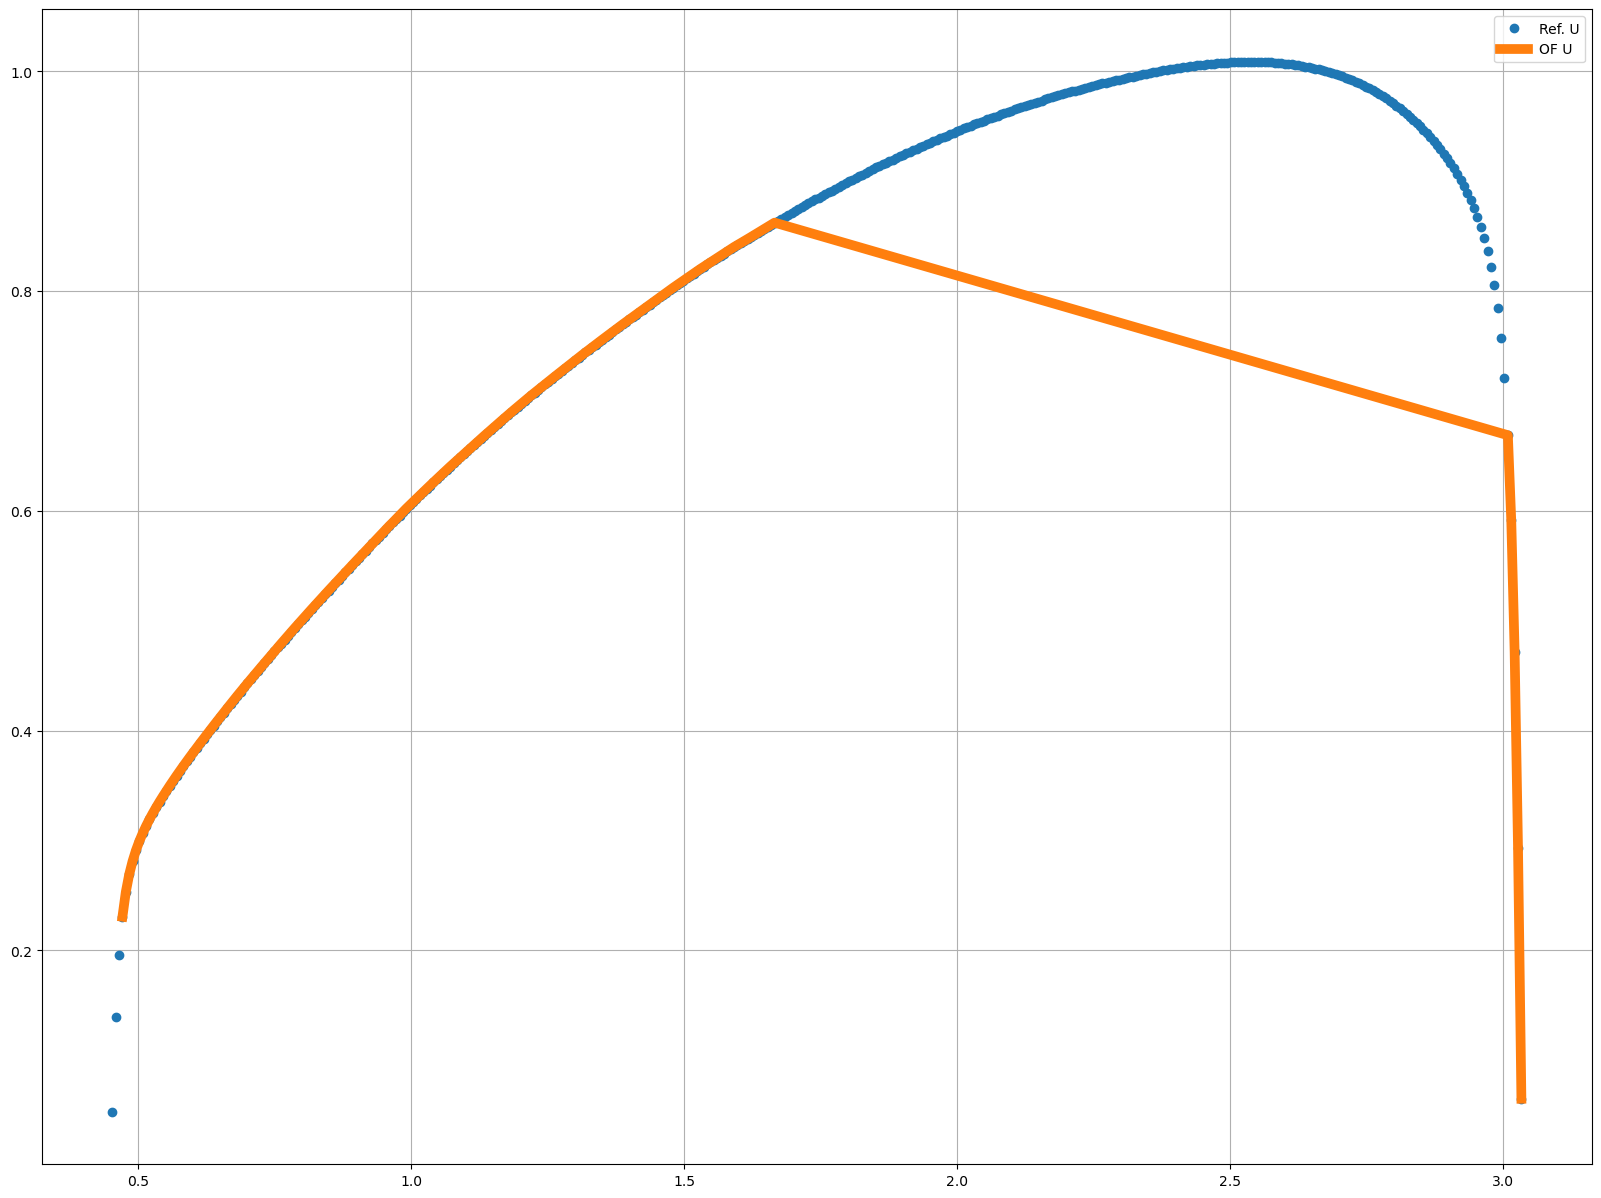

In [317]:
locs = [0.05, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
for i in range(10):
    loc = locs[i]
    #
    pRef    = lref[i]
    pRefx   = pRef['x/h']
    pRefy   = pRef['y/h']
    pRefU   = pRef['U/Ubulk']
    pRefV   = pRef['V/Ubulk']
    pRefRxy = pRef['uv/Ubulk^2']
    pRefk   = pRef['k/Ubulk^2']
    #
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html
    fU   = interpolate.interp1d(pRefy, pRefU,   kind='linear', fill_value="extrapolate", bounds_error=False)
    fV   = interpolate.interp1d(pRefy, pRefV,   kind='linear', fill_value="extrapolate", bounds_error=False)
    fk   = interpolate.interp1d(pRefy, pRefk,   kind='linear', fill_value="extrapolate", bounds_error=False)
    fRxy = interpolate.interp1d(pRefy, pRefRxy, kind='linear', fill_value="extrapolate", bounds_error=False)
    #flab = interpolate.interp1d(pRefy, pReflab, kind='nearest',fill_value="extrapolate", bounds_error=False)
    #
    for c in range(5):
        try:
            solOF = 'cluster'+str(c)+'/cluster'+str(c)+'_x'+str(loc)+'_U.xy'
            #'cluster'+str(c)+'_x'+str(loc)+'_k.xy'
            #'cluster'+str(c)+'_x'+str(loc)+'_Rxy.xy'
            print(solOF)
            OF = np.loadtxt(solOF)
            print(OF.shape)
            pOFy    = OF[:,1]
    
            pOFU   = fU(pOFy)
            pOFV   = fV(pOFy)
            pOFk   = fk(pOFy)
            pOFRxy = fRxy(pOFy)
    
            plt.figure(figsize=(20,15))
            plt.plot(pRefy, pRefU, 'o', label='Ref. U')
            plt.plot(pOFy, pOFU, '-', label='OF U', linewidth=7.0)
            plt.grid()
            plt.legend()
            plt.show()
            plt.close()
            
            data_out = np.vstack([pOFU]).T
            file_out = "U00"+"_c"+str(c)+'_x'+str(loc)+".edf"
            np.savetxt(file_out, data_out)
            
            data_out = np.vstack([pOFV]).T
            file_out = "V00"+"_c"+str(c)+'_x'+str(loc)+".edf"
            np.savetxt(file_out, data_out)
            
            data_out = np.vstack([pOFk]).T
            file_out = "K00"+"_c"+str(c)+'_x'+str(loc)+".edf"
            np.savetxt(file_out, data_out)
            
            data_out = np.vstack([pOFRxy]).T
            file_out = "Rxy00"+"_c"+str(c)+'_x'+str(loc)+".edf"
            np.savetxt(file_out, data_out)
    
        except:
            print('empty profile')
                

0
(467, 10)
(467,)
(161,)
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


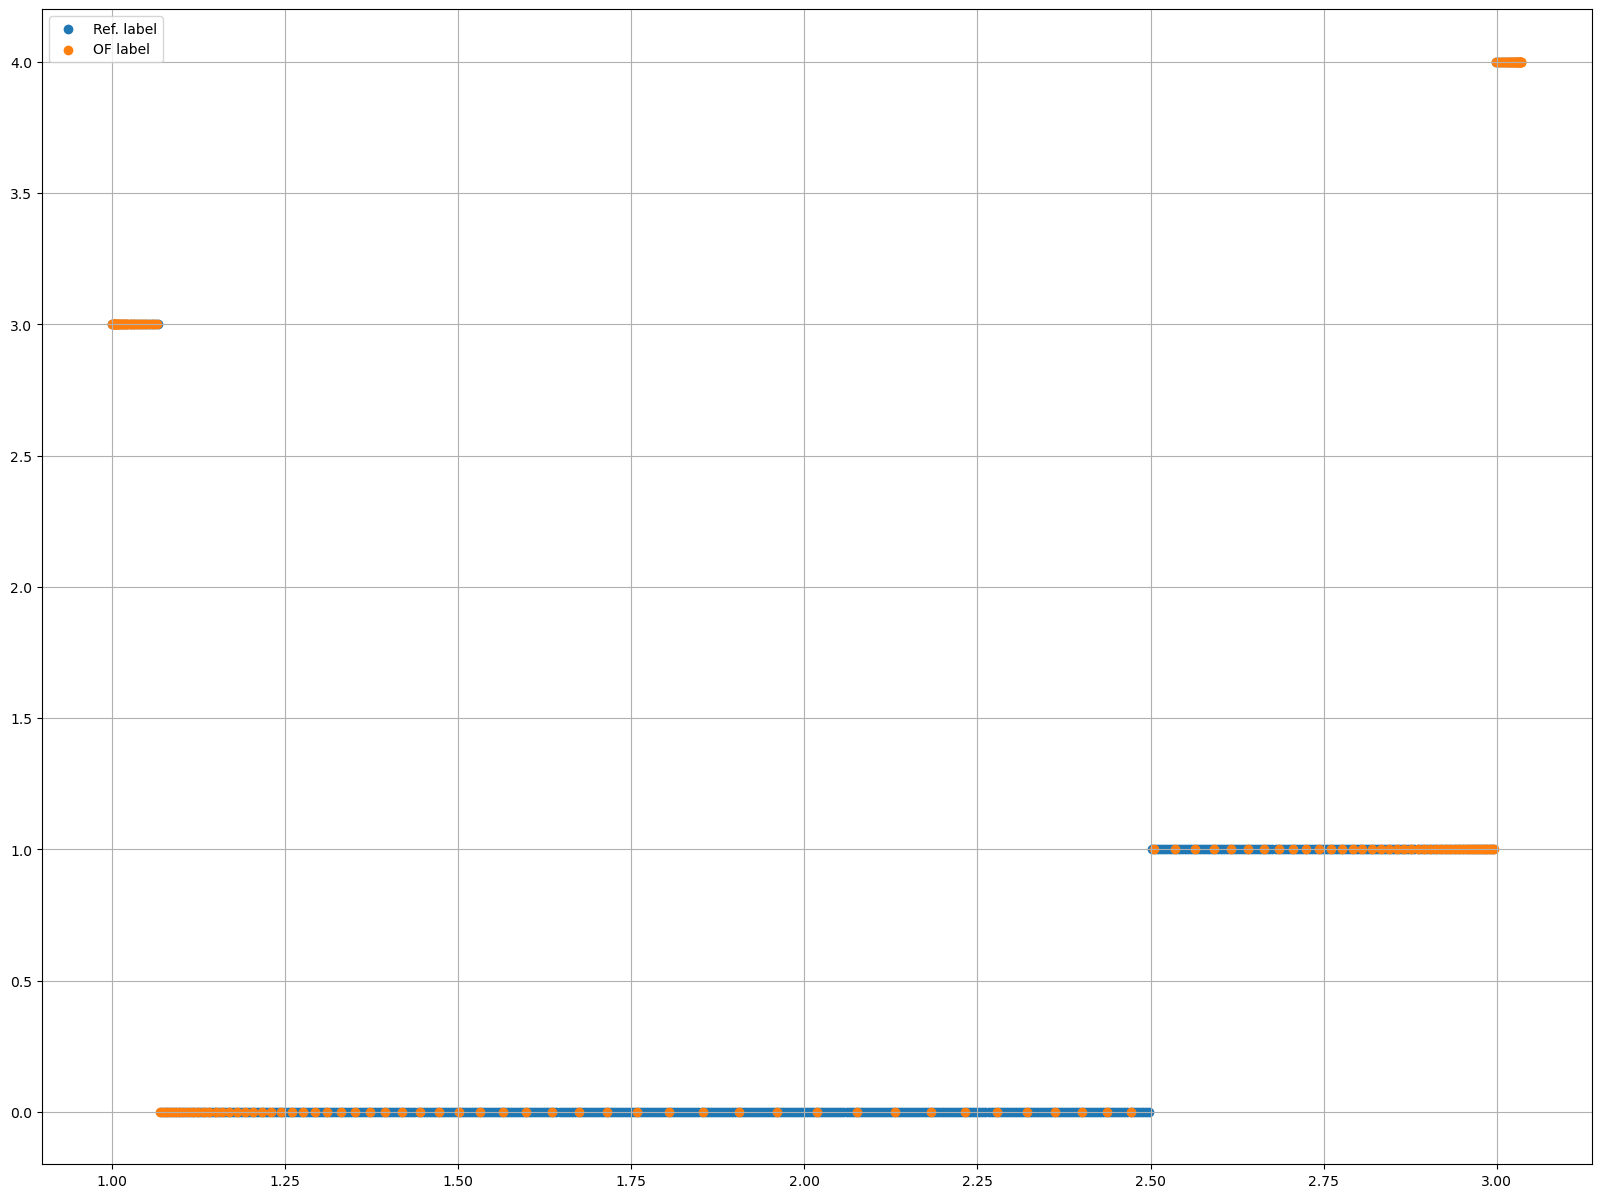

55 42 0 36 28
55 42 0 36 28
55 42 0 36 28
55 42 0 36 28
1
(457, 10)
(457,)
(161,)
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


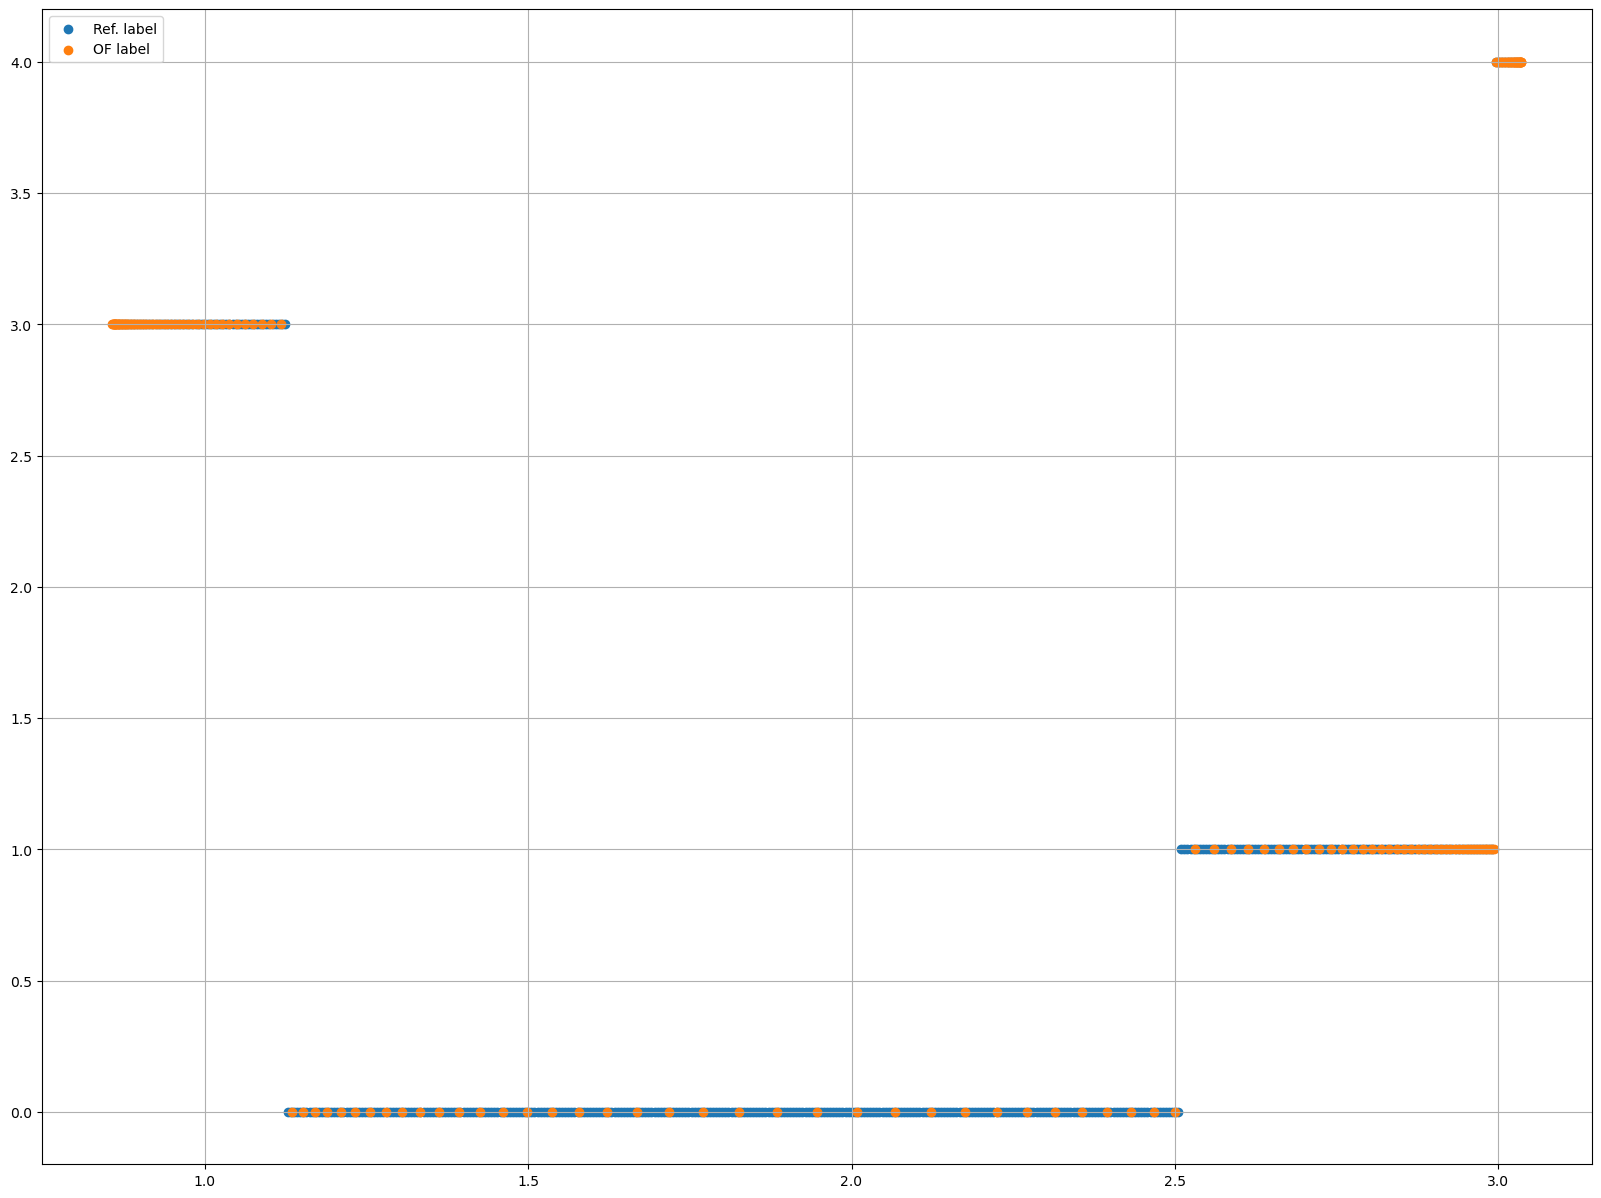

91 82 0 93 56
91 82 0 93 56
91 82 0 93 56
91 82 0 93 56
2
(482, 10)
(482,)
(163,)
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


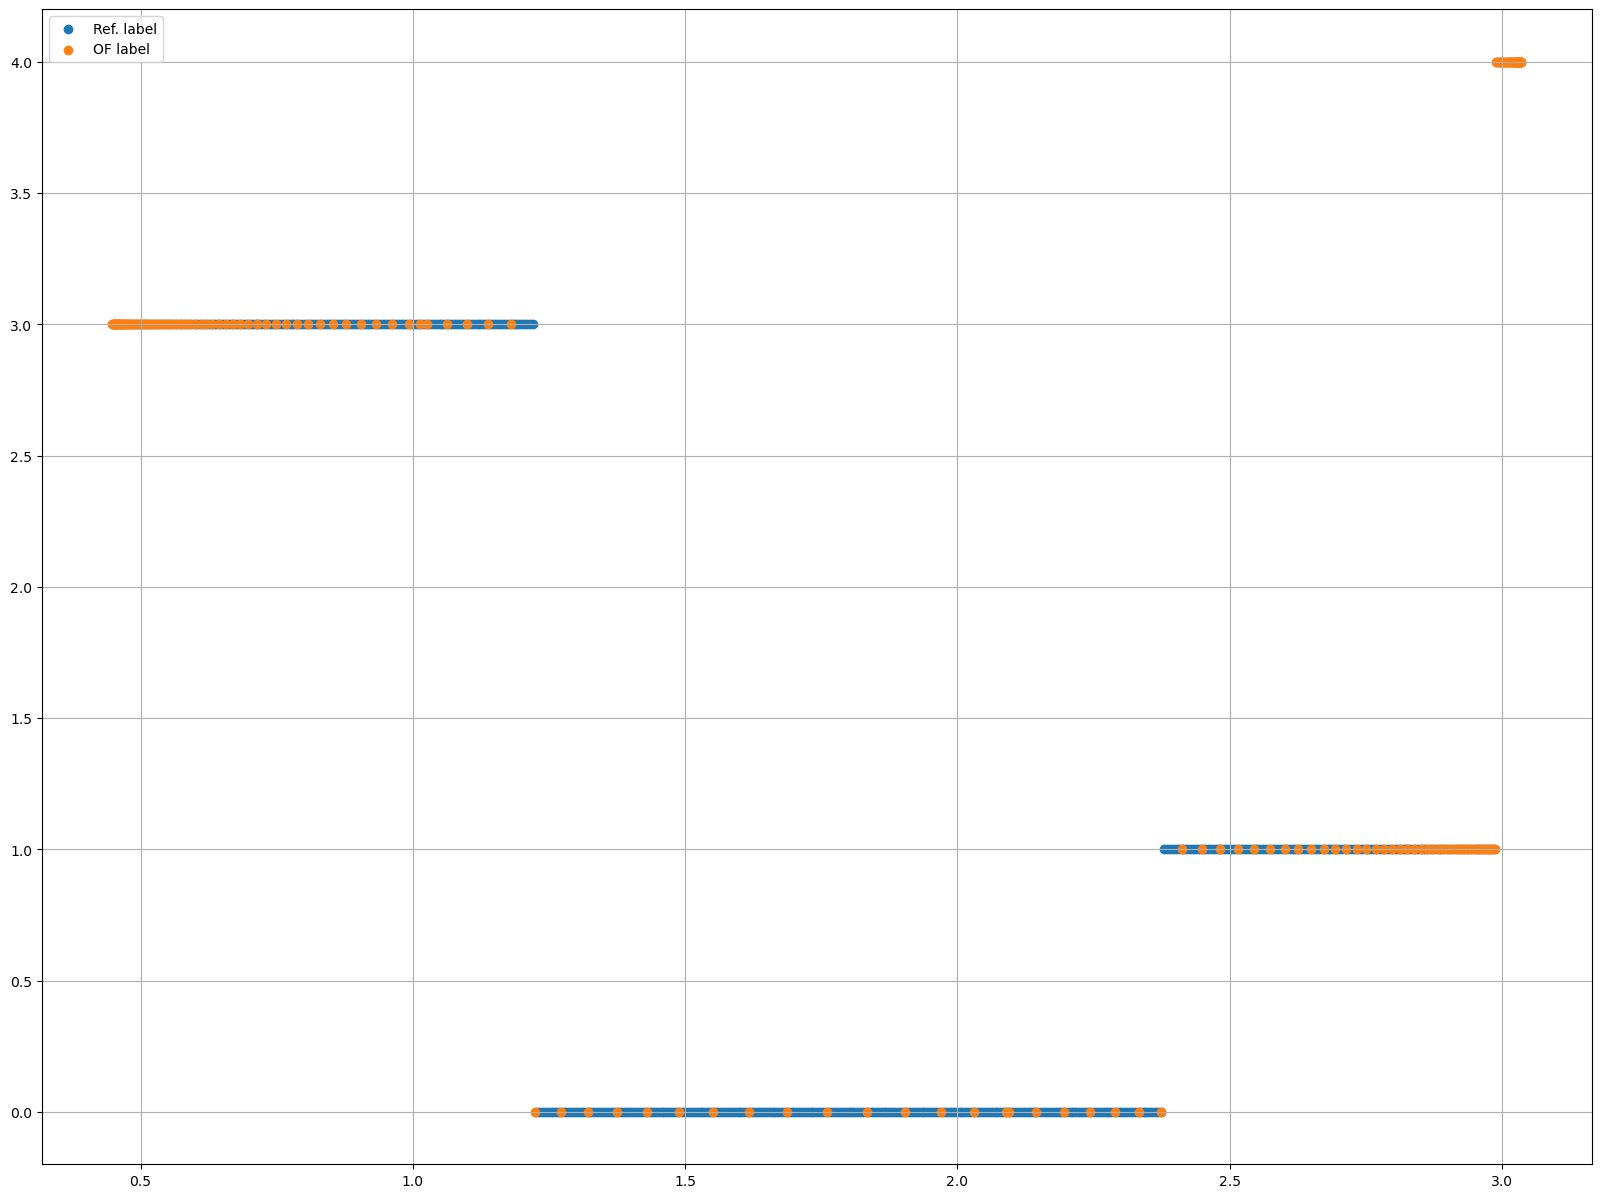

113 123 0 165 84
113 123 0 165 84
113 123 0 165 84
113 123 0 165 84
3
(491, 10)
(491,)
(164,)
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


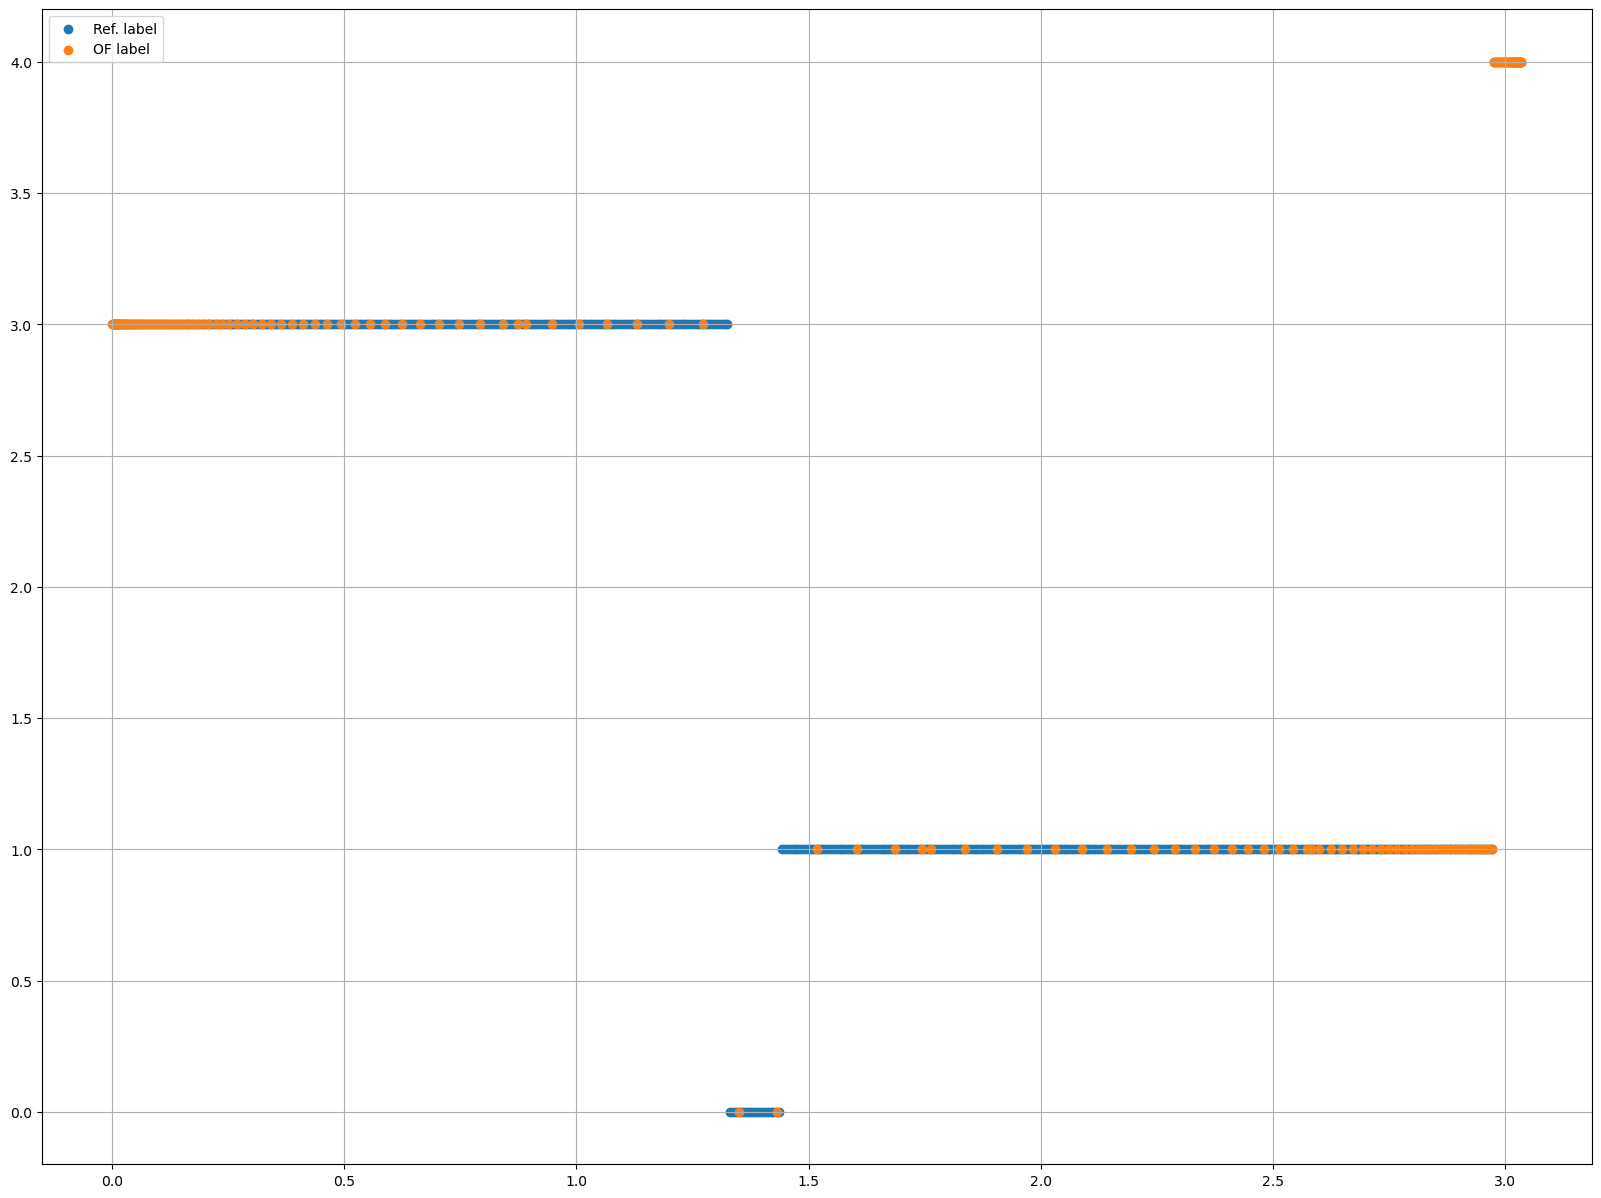

115 177 0 244 113
115 177 0 244 113
115 177 0 244 113
115 177 0 244 113
4
(491, 10)
(491,)
(163,)
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


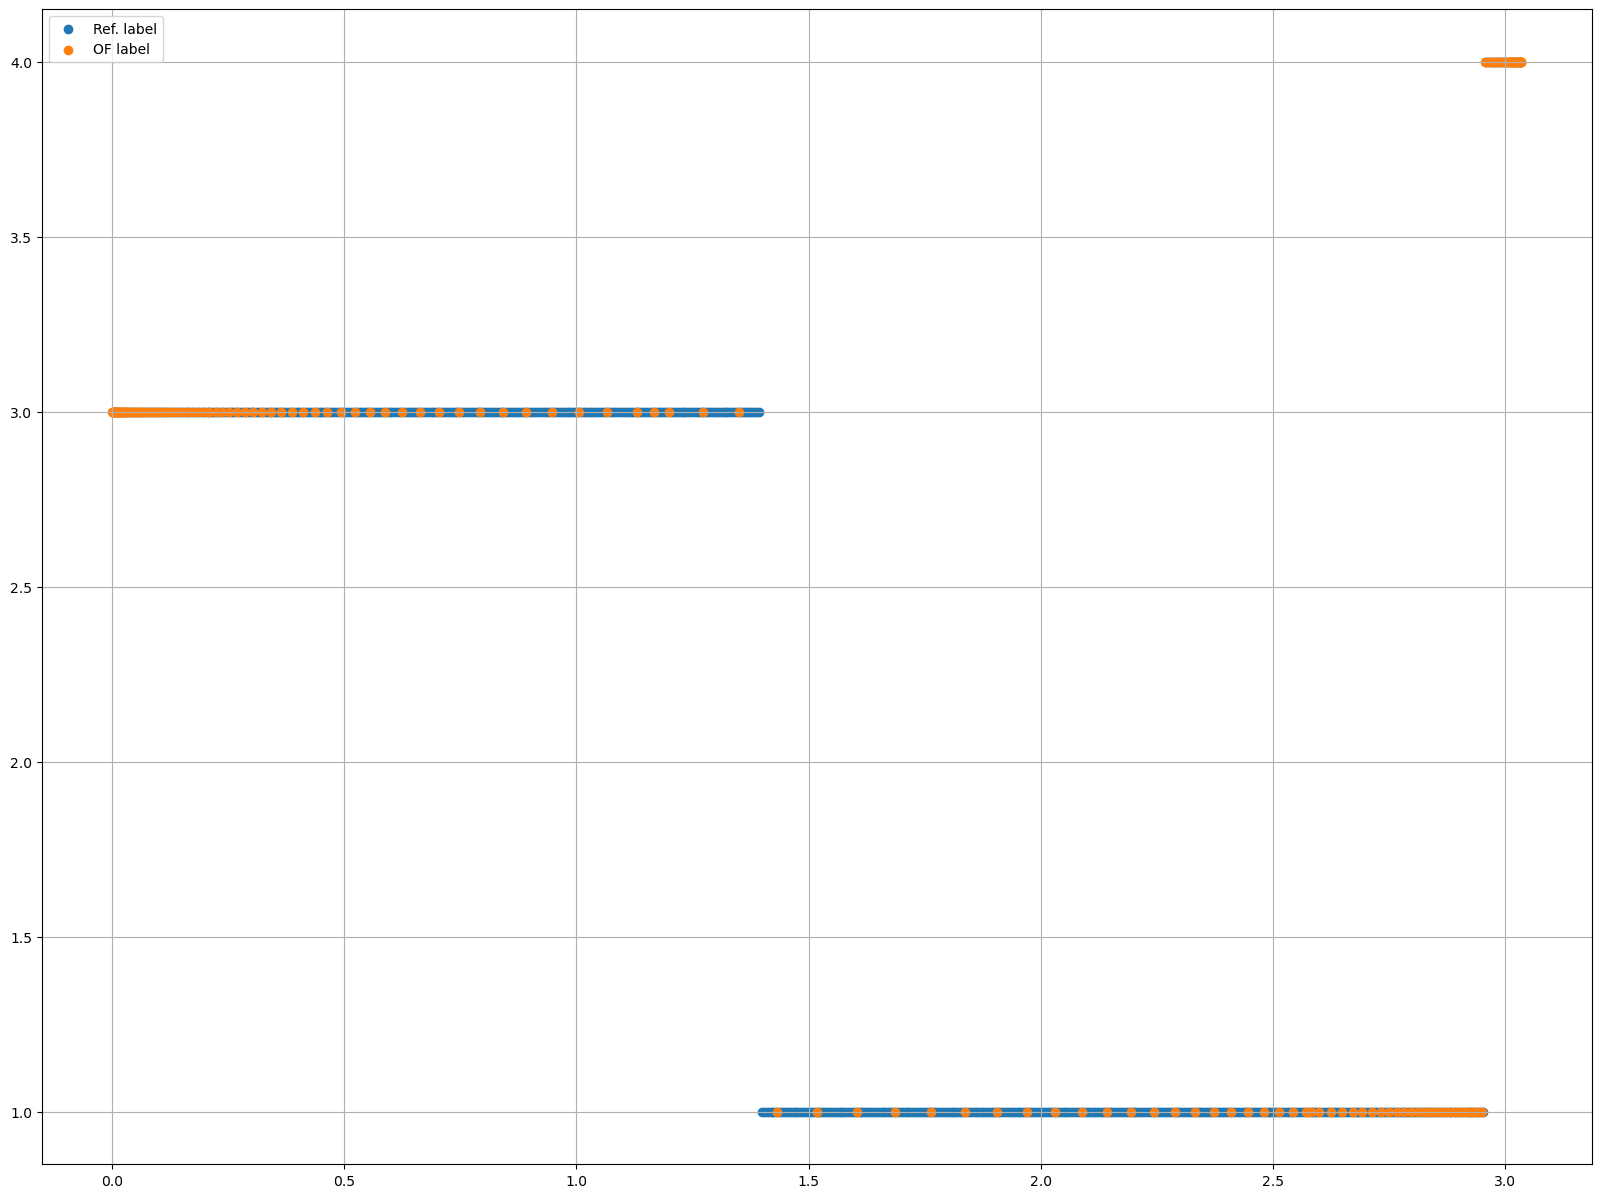

115 227 0 324 146
115 227 0 324 146
115 227 0 324 146
115 227 0 324 146
5
(491, 10)
(491,)
(162,)
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


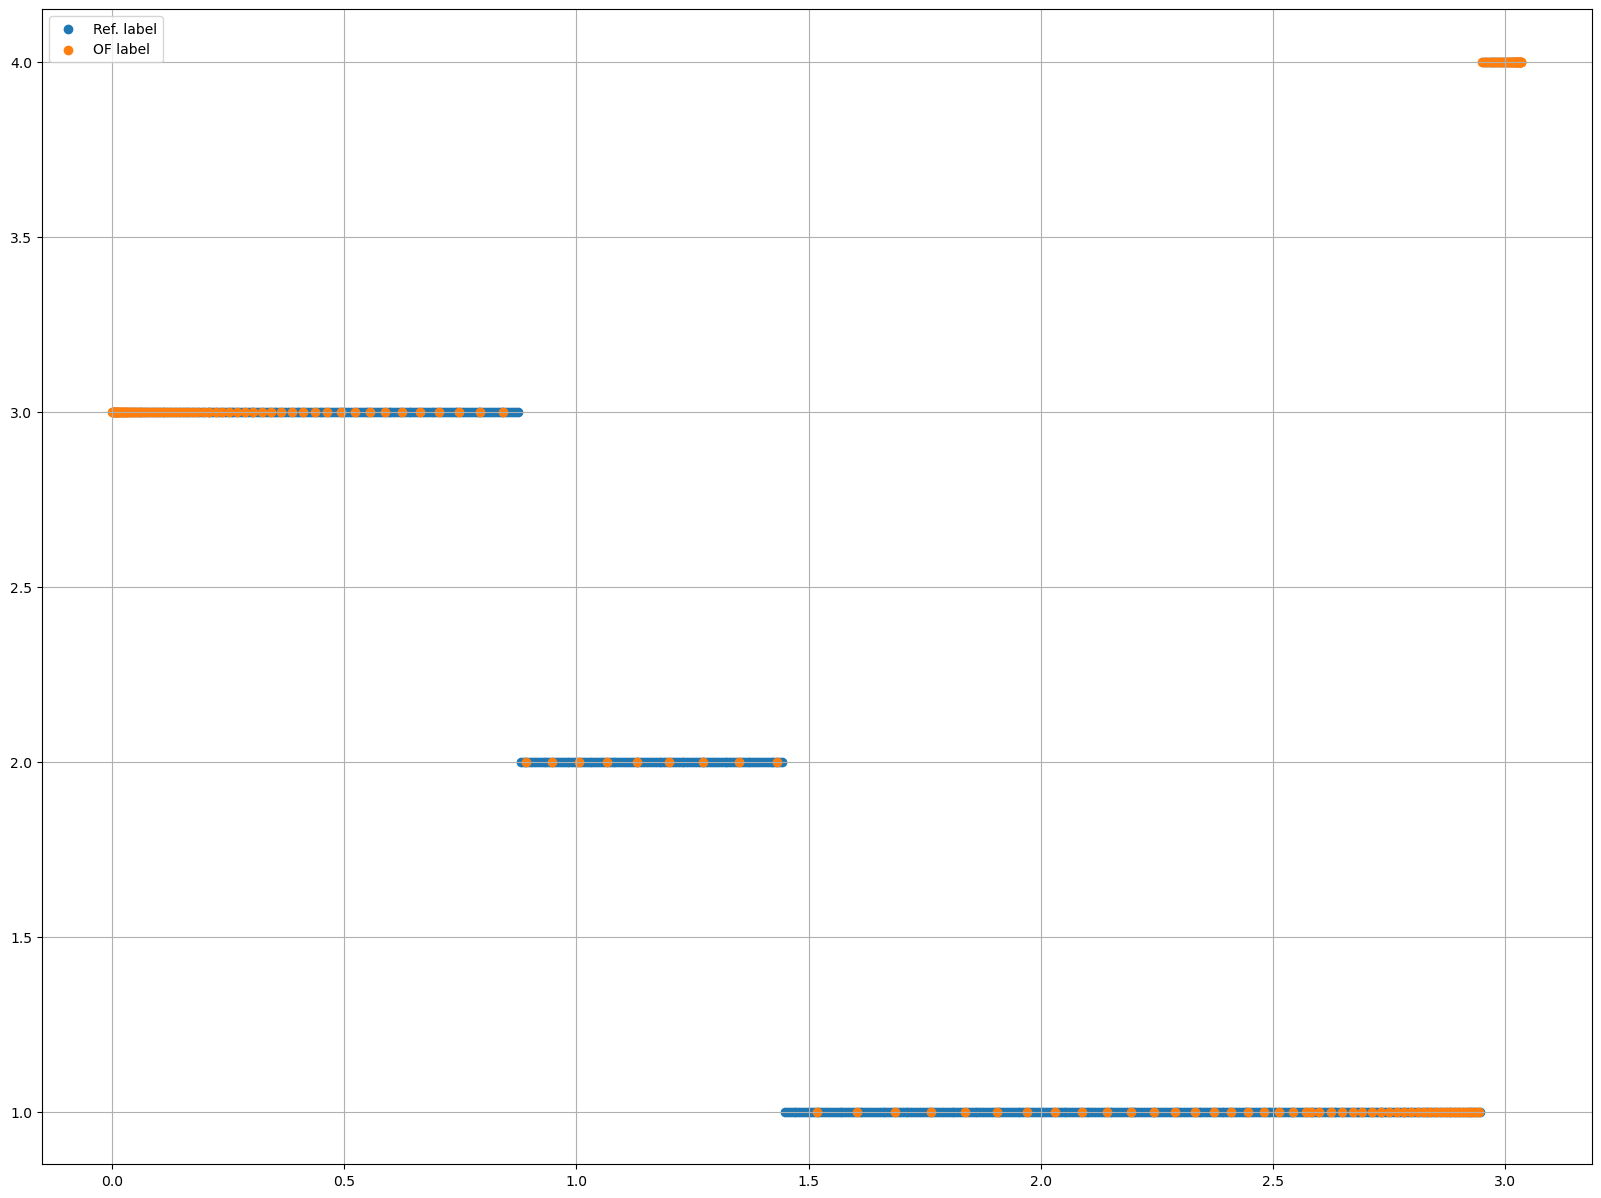

115 275 9 395 180
115 275 9 395 180
115 275 9 395 180
115 275 9 395 180
6
(491, 10)
(491,)
(162,)
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


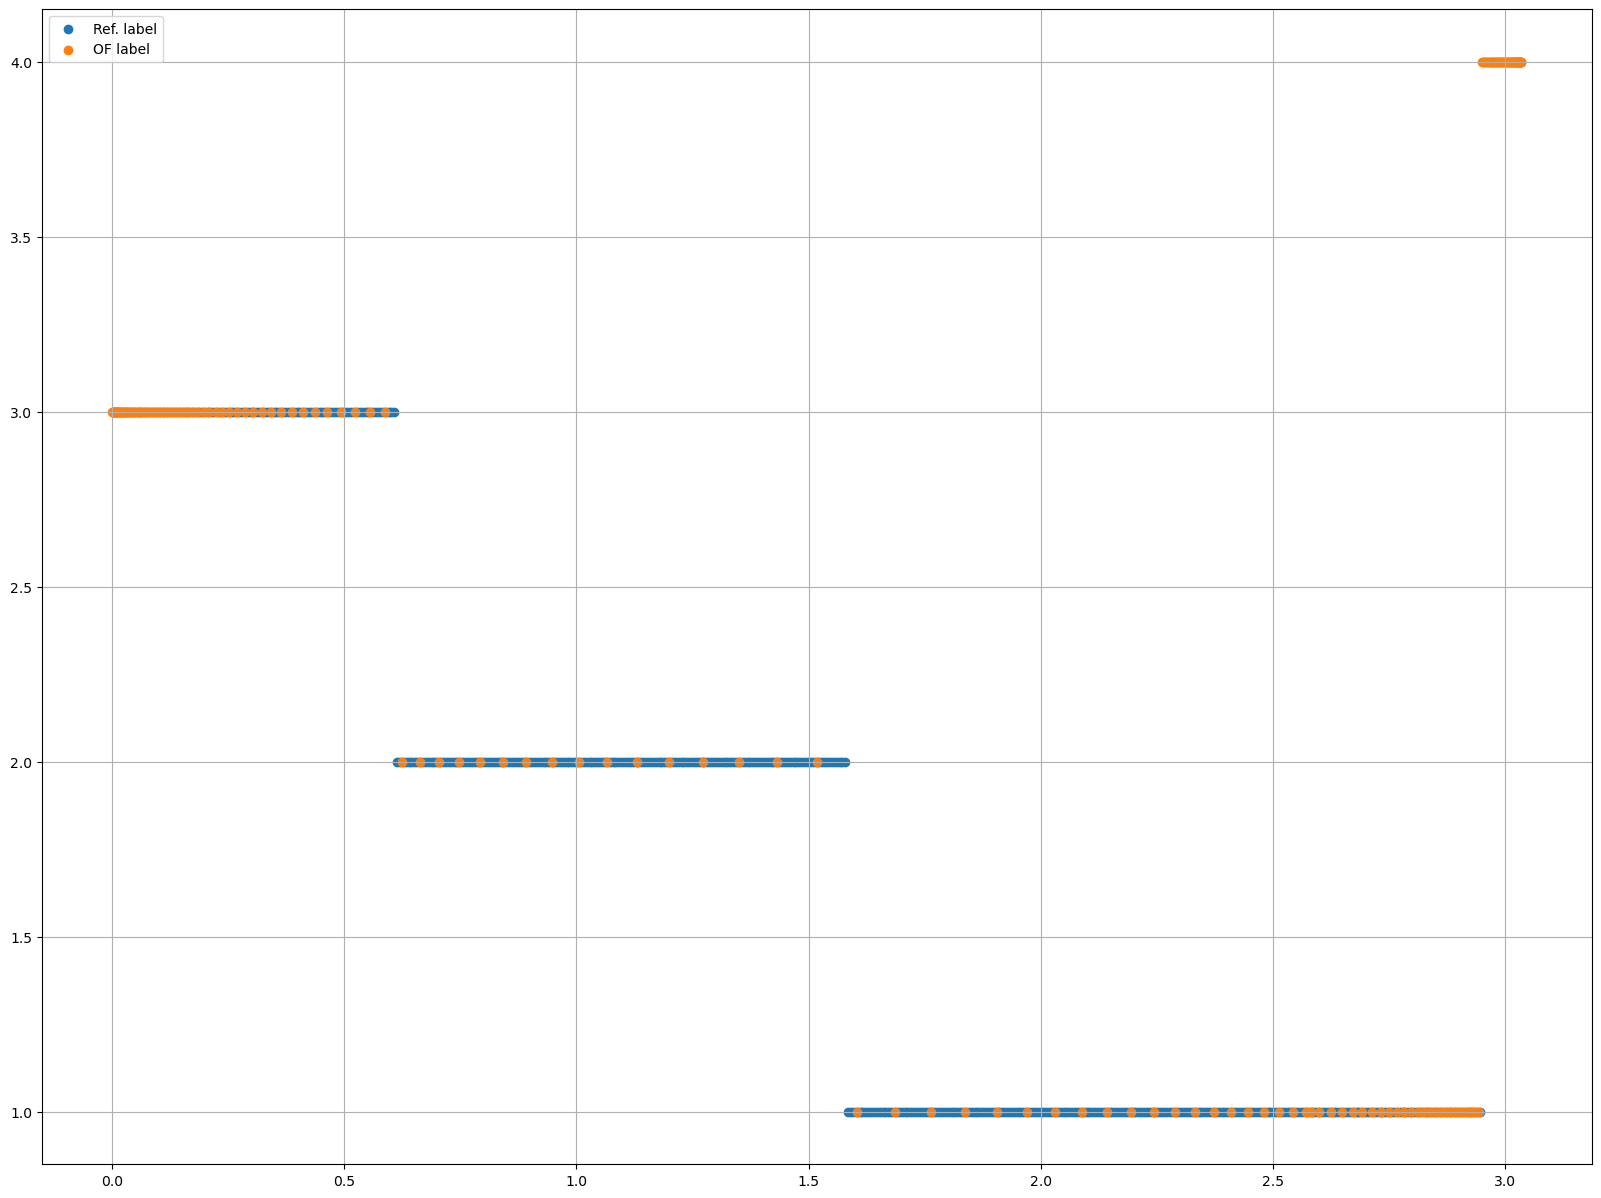

115 322 25 460 214
115 322 25 460 214
115 322 25 460 214
115 322 25 460 214
7
(491, 10)
(491,)
(163,)
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


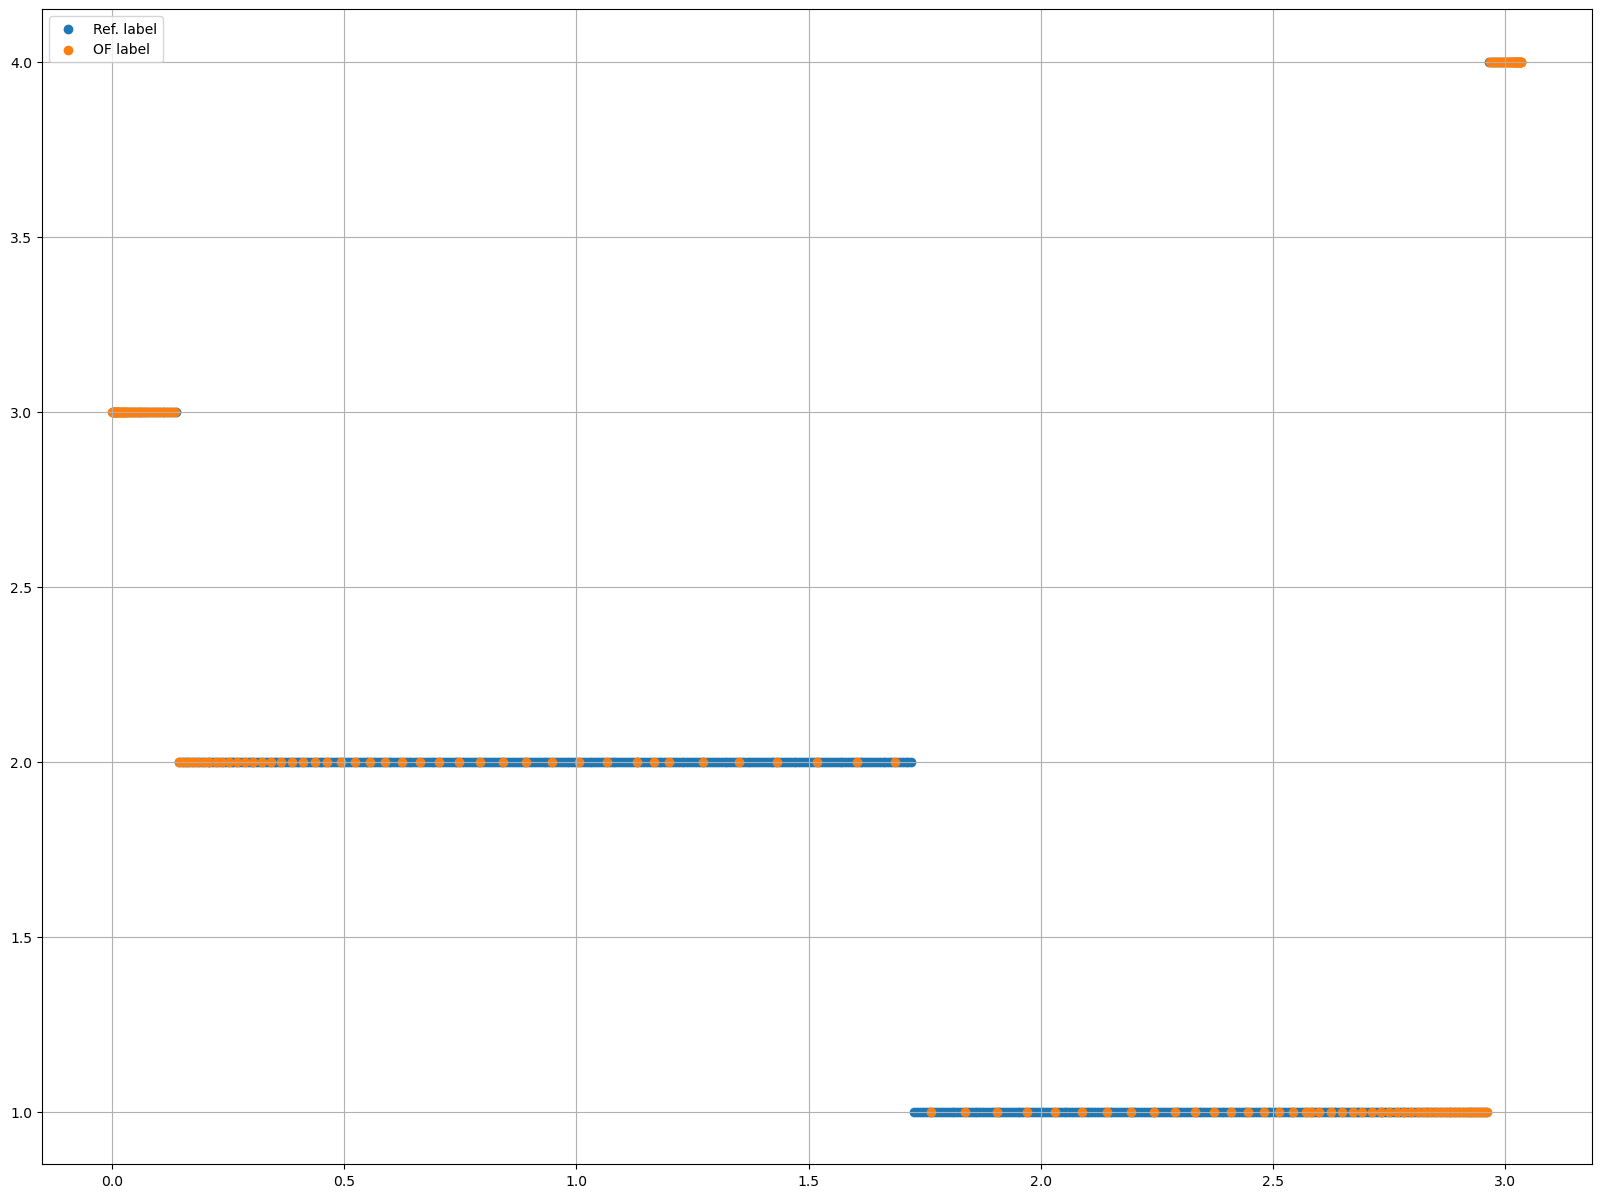

115 370 68 501 245
115 370 68 501 245
115 370 68 501 245
115 370 68 501 245
8
(491, 10)
(491,)
(164,)
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


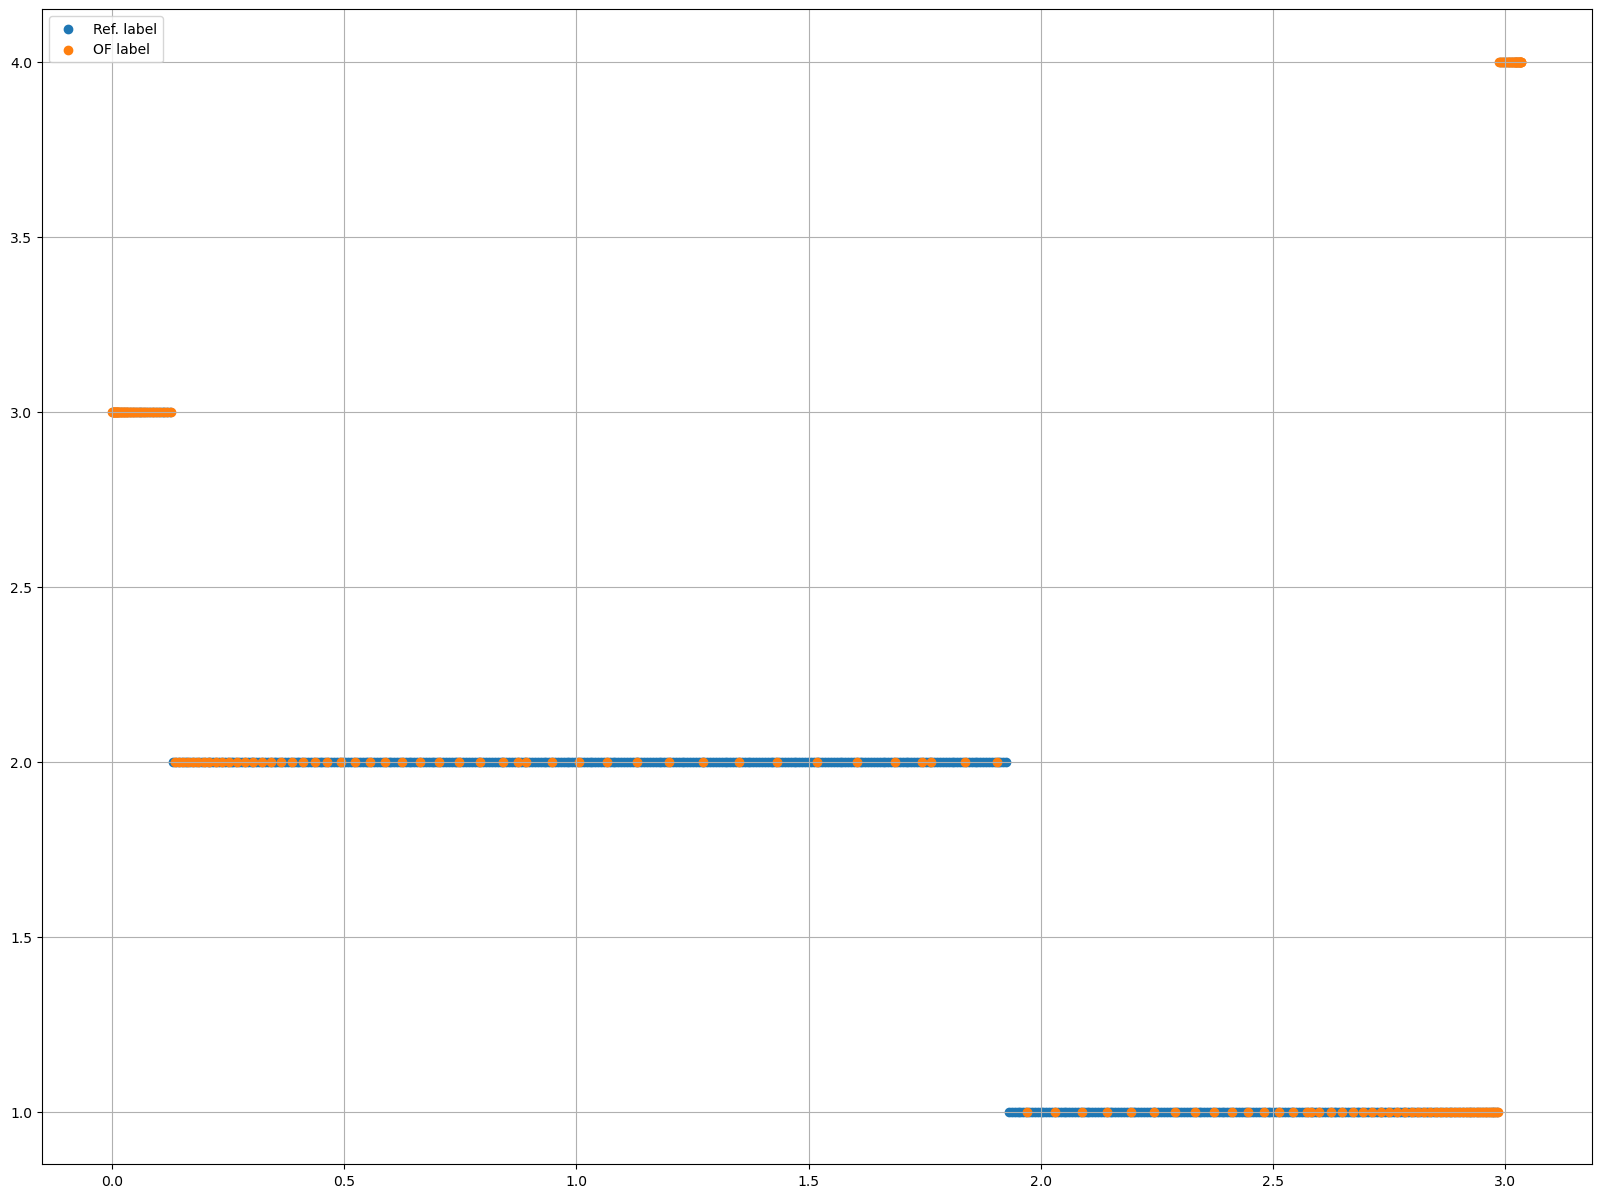

115 420 116 541 271
115 420 116 541 271
115 420 116 541 271
115 420 116 541 271
9
(418, 10)
(418,)
(163,)
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


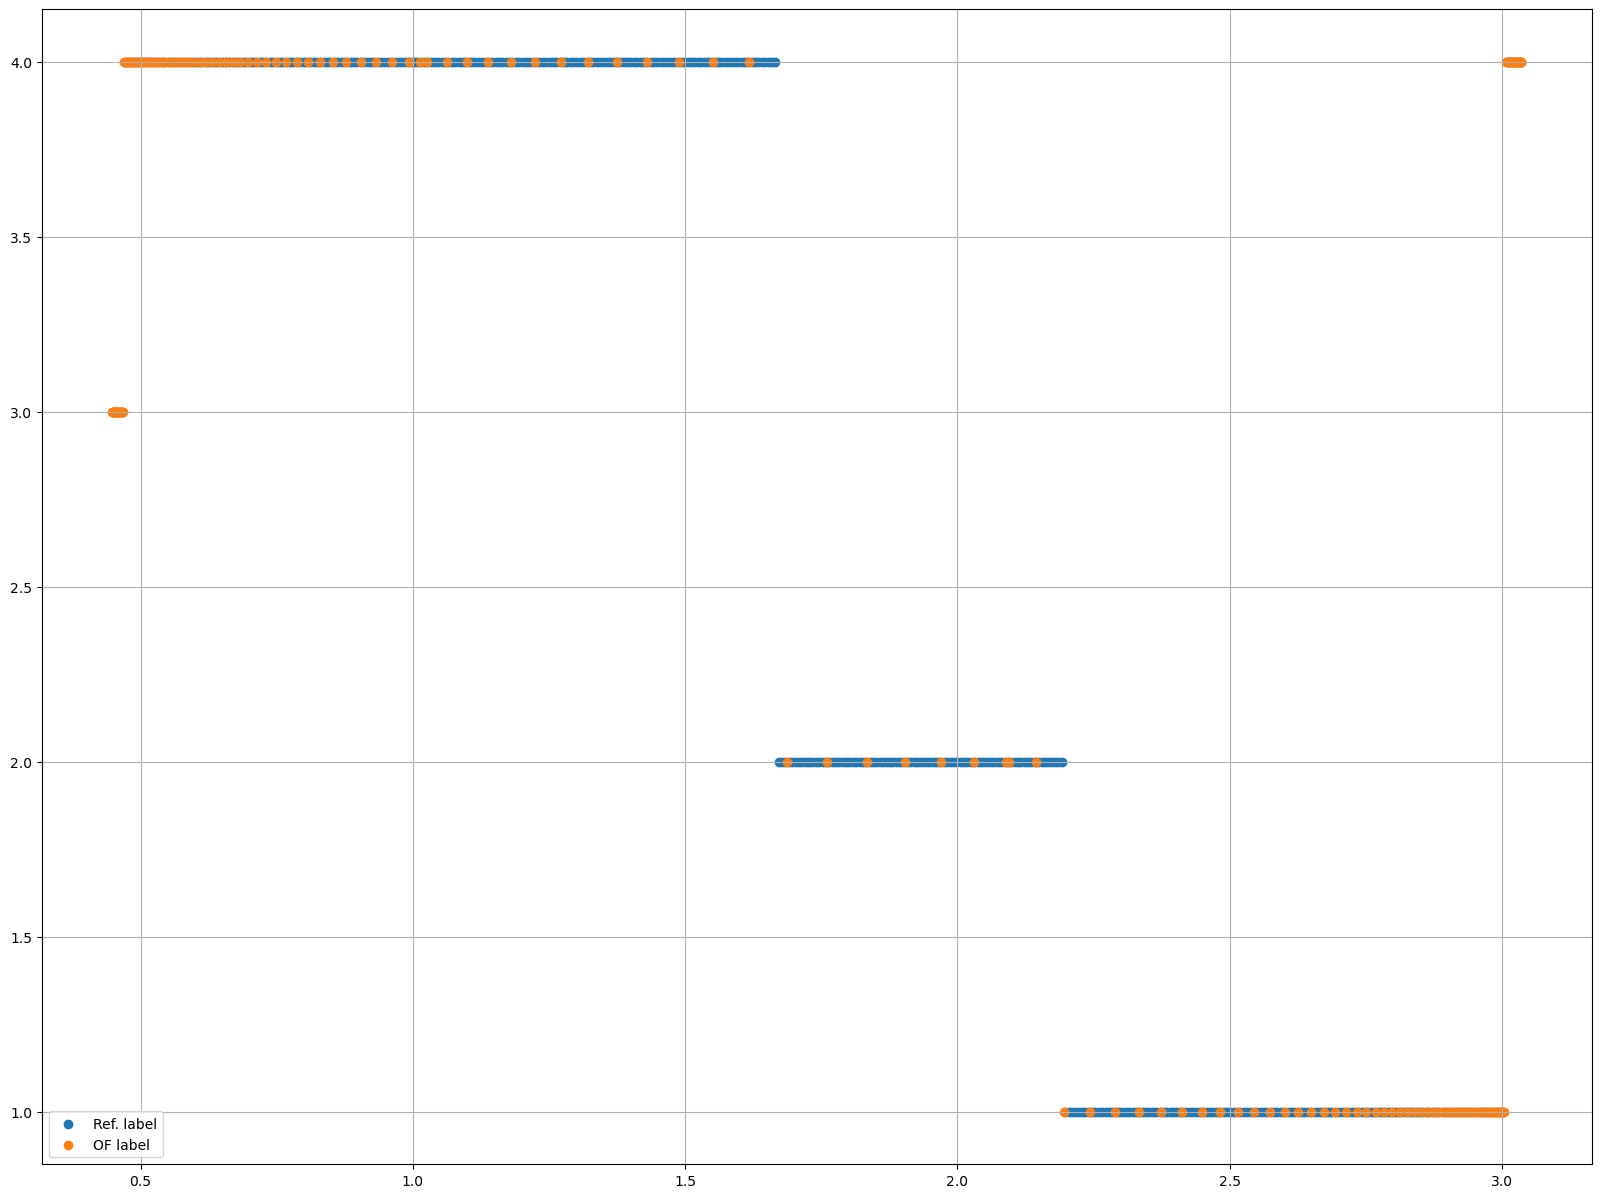

115 472 125 558 356
115 472 125 558 356
115 472 125 558 356
115 472 125 558 356


In [298]:
c0U = []
c1U = []
c2U = []
c3U = []
c4U = []

c0V = []
c1V = []
c2V = []
c3V = []
c4V = []

c0k = []
c1k = []
c2k = []
c3k = []
c4k = []

c0Rxy = []
c1Rxy = []
c2Rxy = []
c3Rxy = []
c4Rxy = []

c0y = []
c1y = []
c2y = []
c3y = []
c4y = []

for i in range(10):
    print(i)
    
    # retrieve reference data
    pRef    = lref[i]
    pRefx   = pRef['x/h']
    pRefy   = pRef['y/h']
    pRefU   = pRef['U/Ubulk']
    pRefV   = pRef['V/Ubulk']
    pRefRxy = pRef['uv/Ubulk^2']
    pRefk   = pRef['k/Ubulk^2']
    pReflab = pRef['labels']
    
    # retrieve openfoam solutions
    pOF     = OF[i]
    pOFy    = pOF['y']
    
    print(pRef.shape)
    print(pRefy.shape)
    print(pOFy.shape)
    
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html
    fU   = interpolate.interp1d(pRefy, pRefU,   kind='linear', fill_value="extrapolate", bounds_error=False)
    fV   = interpolate.interp1d(pRefy, pRefV,   kind='linear', fill_value="extrapolate", bounds_error=False)
    fk   = interpolate.interp1d(pRefy, pRefk,   kind='linear', fill_value="extrapolate", bounds_error=False)
    fRxy = interpolate.interp1d(pRefy, pRefRxy, kind='linear', fill_value="extrapolate", bounds_error=False)
    flab = interpolate.interp1d(pRefy, pReflab, kind='nearest',fill_value="extrapolate", bounds_error=False)
    
    pOFU   = fU(pOFy)
    pOFV   = fV(pOFy)
    pOFk   = fk(pOFy)
    pOFRxy = fRxy(pOFy)
    pOFlab = flab(pOFy)
    
    print(pOFlab)
    
    plt.figure(figsize=(20,15))
    plt.scatter(pRefy, pReflab, label='Ref. label')
    plt.scatter(pOFy,  pOFlab,  label='OF label')
    plt.grid()
    plt.legend()
    plt.show()
    plt.close()

    for j in range(len(pOFlab)):
        if(pOFlab[j]==0):
            c0y.append(pOFy[j])
        elif(pOFlab[j]==1):
            c1y.append(pOFy[j])
        elif(pOFlab[j]==2):
            c2y.append(pOFy[j])
        elif(pOFlab[j]==3):
            c3y.append(pOFy[j])
        elif(pOFlab[j]==4):
            c4y.append(pOFy[j])
            
    for j in range(len(pOFlab)):
        if(pOFlab[j]==0):
            c0U.append(pOFU[j])
        elif(pOFlab[j]==1):
            c1U.append(pOFU[j])
        elif(pOFlab[j]==2):
            c2U.append(pOFU[j])
        elif(pOFlab[j]==3):
            c3U.append(pOFU[j])
        elif(pOFlab[j]==4):
            c4U.append(pOFU[j])
    
    print(len(c0U),len(c1U),len(c2U),len(c3U),len(c4U))
    
    for j in range(len(pOFlab)):
        if(pOFlab[j]==0):
            c0V.append(pOFV[j])
        elif(pOFlab[j]==1):
            c1V.append(pOFV[j])
        elif(pOFlab[j]==2):
            c2V.append(pOFV[j])
        elif(pOFlab[j]==3):
            c3V.append(pOFV[j])
        elif(pOFlab[j]==4):
            c4V.append(pOFV[j])
            
    print(len(c0V),len(c1V),len(c2V),len(c3V),len(c4V))
    
    for j in range(len(pOFlab)):
        if(pOFlab[j]==0):
            c0Rxy.append(pOFRxy[j])
        elif(pOFlab[j]==1):
            c1Rxy.append(pOFRxy[j])
        elif(pOFlab[j]==2):
            c2Rxy.append(pOFRxy[j])
        elif(pOFlab[j]==3):
            c3Rxy.append(pOFRxy[j])
        elif(pOFlab[j]==4):
            c4Rxy.append(pOFRxy[j])
            
    print(len(c0Rxy),len(c1Rxy),len(c2Rxy),len(c3Rxy),len(c4Rxy))
    
    for j in range(len(pOFlab)):
        if(pOFlab[j]==0):
            c0k.append(pOFk[j])
        elif(pOFlab[j]==1):
            c1k.append(pOFk[j])
        elif(pOFlab[j]==2):
            c2k.append(pOFk[j])
        elif(pOFlab[j]==3):
            c3k.append(pOFk[j])
        elif(pOFlab[j]==4):
            c4k.append(pOFk[j])
            
    print(len(c0k),len(c1k),len(c2k),len(c3k),len(c4k))
    
    data_out = np.asarray(c0y)
    file_out = "C0y00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c1y)
    file_out = "C1y00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c2y)
    file_out = "C2y00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c3y)
    file_out = "C3y00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c4y)
    file_out = "C4y00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c0U)
    file_out = "C0U00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c1U)
    file_out = "C1U00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c2U)
    file_out = "C2U00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c3U)
    file_out = "C3U00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c4U)
    file_out = "C4U00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c0V)
    file_out = "C0V00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c1V)
    file_out = "C1V00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c2V)
    file_out = "C2V00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c3V)
    file_out = "C3V00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c4V)
    file_out = "C4V00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c0Rxy)
    file_out = "C0Rxy00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c1Rxy)
    file_out = "C1Rxy00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c2Rxy)
    file_out = "C2Rxy00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c3Rxy)
    file_out = "C3Rxy00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c4Rxy)
    file_out = "C4Rxy00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c0k)
    file_out = "C0k00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c1k)
    file_out = "C1k00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c2k)
    file_out = "C2k00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c3k)
    file_out = "C3k00.edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.asarray(c4k)
    file_out = "C4k00.edf"
    np.savetxt(file_out, data_out)

In [ ]:
for i in range(9):
    print(i)
    pRef    = Ref[i]
    pRefy   = pRef[:,0]
    pRefU   = pRef[:,1]
    pRefV   = pRef[:,2]
    pRefRxy = pRef[:,5]
    pRefk   = pRef[:,6]
    pOF     = OF[i]
    pOFy    = pOF['y']
    
    print(pRefy.shape)
    print(pOFy.shape)
    
    fU = interpolate.interp1d(pRefy, pRefU, kind='linear', fill_value="extrapolate", bounds_error=False)
    fV = interpolate.interp1d(pRefy, pRefV, kind='linear', fill_value="extrapolate", bounds_error=False)
    fk = interpolate.interp1d(pRefy, pRefk, kind='linear', fill_value="extrapolate", bounds_error=False)
    fRxy = interpolate.interp1d(pRefy, pRefRxy, kind='linear', fill_value="extrapolate", bounds_error=False)
    
    pOFU = fU(pOFy)
    pOFV = fV(pOFy)
    pOFk = fk(pOFy)
    pOFRxy = fRxy(pOFy)
    
    plt.figure(figsize=(20,15))
    plt.plot(pRefy, pRefU, 'o', label='Ref. U')
    plt.plot(pOFy, pOFU, '-', label='OF U')
    plt.grid()
    plt.legend()
    plt.show()
    plt.close()
    
    plt.figure(figsize=(20,15))
    plt.plot(pRefy, pRefV, 'o', label='Ref. V')
    plt.plot(pOFy, pOFV, '-', label='OF V')
    plt.grid()
    plt.legend()
    plt.show()
    plt.close()
    
    plt.figure(figsize=(20,15))
    plt.plot(pRefy, pRefk, 'o', label='Ref. k')
    plt.plot(pOFy, pOFk, '-', label='OF k')
    plt.grid()
    plt.legend()
    plt.show()
    plt.close()
    
    plt.figure(figsize=(20,15))
    plt.plot(pRefy, pRefRxy, 'o', label='Ref. Rxy')
    plt.plot(pOFy, pOFRxy, '-', label='OF Rxy')
    plt.grid()
    plt.legend()
    plt.show()
    plt.close()
    
    # This is a check for the points order
    #data_out = np.vstack([pOFy, pOFU]).T
    data_out = np.vstack([pOFU]).T
    file_out = "U00"+str(i)+".edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.vstack([pOFV]).T
    file_out = "V00"+str(i)+".edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.vstack([pOFk]).T
    file_out = "K00"+str(i)+".edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.vstack([pOFRxy]).T
    file_out = "Rxy00"+str(i)+".edf"
    np.savetxt(file_out, data_out)